<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; Olaran ,Sebastian; Ayala, Tomás</center>


#**Checkpoint 1**: Análisis exploratorio y Preprocesamiento de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comenzamos importando todas las librerías que vamos a utilizar en el proyecto

In [ ]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los archivos csv de datos en dos DataFrames de Pandas

In [ ]:
ds_hoteles_test = pd.read_csv('./hotels_test.csv')
ds_hoteles_train = pd.read_csv('./hotels_train.csv')



---


#Exploración inicial del dataset

Vamos a empezar viendo qué forma tiene el dataset, cuántas variables tiene y qué describe cada campo: de esta forma podemos saber de antemano con qué nos enfrentamos.

Vemos información sobre las 2 primeras filas del DataFrame

In [ ]:
ds_hoteles_train.head(2)

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   

   deposit_type agent company days_in_waiting_list customer_type    adr  \
0    No Deposit   9.0     NaN                    0     Transient  115.5   
1    No Deposit   NaN     NaN                    0     Transient   42.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   

                                     id is_canceled  
0  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  

[2 rows x 31 columns]

Vemos información de las últimas 2 filas del DataFrame

In [ ]:
ds_hoteles_train.tail(2)

hotel  lead_time  arrival_date_year arrival_date_month  \
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       deposit_type agent company days_in_waiting_list customer_type     adr  \
61911    Non Refund  96.0     NaN                    0     Transient   36.05   
61912    No Deposit   9.0     NaN                    0     Transient  143.29   

       required_car_parking_spaces  total_of_special_requests  \
61911                            0                          0   
61912                            0                          0   

                                         id is_canceled  
61911  01906859-1094-4e37-b13e-b015b594d159           1  
61912  7137e599-4442-41fb-b147-4aba9f344e38           1  

[2 rows x 31 columns]

Vemos cuántas filas y cuántas columnas tiene el DataFrame

In [ ]:
ds_hoteles_train.shape

(61913, 31)

Se tienen 61913 filas y 30 columnas. En otras palabras, contamos con datos correspondientes a 61913 reservas, en las cuales tenemos 31 variables sobre las mismas.

Listamos todos los nombres de las columnas del DataFrame

In [ ]:
ds_hoteles_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

A partir de lo anteriormente visto, ahora nos interesa saber qué tipos de datos contienen las columnas del DataFrame

In [ ]:
ds_hoteles_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Durante el análisis del dataset nos apoyaremos en el paper que describe al mismo, de ahí encontraremos la información que nos da cada variable sobre las reservas.



---

# Limpieza del dataset

Antes de empezar a analizar el dataset en profundidad, haremos una limpieza de datos. Para ello buscaremos los valores que son nulos en el dataset y que no tienen sentido en el contexto(por ejemplo, algunas variables numéricas negativas o ciertas variables que toman valores que no tienen sentido).

Empezamos por ver si hay datos faltantes

In [ ]:
print(ds_hoteles_train.isna().sum())

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Observamos que hay solamente 4 variables con datos faltantes, que son: 'country', 'children', 'agent' y 'company'. Cuando hagamos el análisis en profundidad para cada variable veremos qué hacer con ellos.

Siguiendo la idea anterior, ahora veamos cuántos datos NO nulos tenemos por columna

In [ ]:
print(ds_hoteles_train.count())

hotel                             61913
lead_time                         61913
arrival_date_year                 61913
arrival_date_month                61913
arrival_date_week_number          61913
arrival_date_day_of_month         61913
stays_in_weekend_nights           61913
stays_in_week_nights              61913
adults                            61913
children                          61909
babies                            61913
meal                              61913
country                           61692
market_segment                    61913
distribution_channel              61913
is_repeated_guest                 61913
previous_cancellations            61913
previous_bookings_not_canceled    61913
reserved_room_type                61913
assigned_room_type                61913
booking_changes                   61913
deposit_type                      61913
agent                             54023
company                            3152
days_in_waiting_list              61913


Observamos que la gran mayoría de campos no tienen datos faltantes.



---


##Búsqueda de valores mal cargados y/o faltantes




### Variable ID


Esta variable representa el numero de identificacion de una reserva.

Los valores de ID son únicos y exclusivamente se emplean como identificadores individuales para las reservas. No contienen información relevante para el proceso de predicción de cancelaciones o cualquier otro análisis futuro. Por lo tanto, podemos eliminar esta columna de nuestro conjunto de datos utilizado en el análisis. Al hacerlo, simplificamos el conjunto de datos y reducimos su complejidad, lo que puede mejorar la eficiencia de nuestro modelo sin afectar su capacidad para realizar predicciones precisas.

In [ ]:
ds_hoteles_train.drop('id', axis=1, inplace=True)


### Variable ADR


Esta variable indica la tarifa promedio por día de cada reserva. Nos da una idea del precio por día de alojamiento. Es una variable del tipo cuantitativa, por lo que procederemos en la siguiente sección a analizar sus medidas de resumen(media, mediana, moda, etc).



Ahora nos centraremos en encontrar posibles datos mal cargados o faltantes.

In [ ]:
columna_adr = ds_hoteles_train['adr']
columna_adr.isna().sum()

0

Esta variable no tiene datos faltantes.

Este dato se calcula mediante la division de la suma de los días de todas las transacciones cuartos y el total de noches de estadia. Como es una sumatoria de precios, esta variable no debería admitir valores menores o iguales a 0. Así que, veamos si esta variable toma valores negativos o iguales a 0.

In [ ]:
(columna_adr > 0).value_counts()

True     61028
False      885
Name: adr, dtype: int64

Como podemos ver que alrededor de 885 valores, tiene valores menores o iguales a 0, lo cual implicaria que un cuarto de hotel básicamente es gratis. Esto carece de sentido para nuestro análisis, por lo que estos registros los tomaremos como mal cargados.


Esta variable la consideramos esencial a la hora de crear nuestros modelos predictivos, ya que, al tener una idea del precio promedio por día de cada reserva, es un buen parámetro para decidir si una reserva fue cancelada o no. Por lo que vamos a quedarnos con la variable ADR para predecir en nuestro modelo final.



---


### Variable Adults

Es una variable del tipo cuantitativa, toma como valores números enteros que representan la cantidad de adultos están registrados en la reserva. En una reserva, no deberíamos tener adultos negativos o iguales a 0, de ser así, tomaremos esos registros como mal cargados.

Veamos si la variable adults toma algún valor que consideramos como mal cargado

In [ ]:
columna_adults = ds_hoteles_train['adults']
(columna_adults > 0).value_counts()

True     61716
False      197
Name: adults, dtype: int64

Como podemos ver, hay al menos 197 filas cargadas en el dataset que no tienen ningún adulto registrado en la reserva. Esto, para nuestro análisis carece de sentido, ya que estas reservas no tienen por lo menos UN adulto asignado. Estos registros los tomaremos como mal cargados, y terminarán siendo candidatas a ser eliminadas del dataset.


Veamos si además, tiene datos faltantes

In [ ]:
columna_adults.isna().sum()

0

Esta variable carece de datos faltantes, pero tenemos el problema mencionado anteriormente.

Al igual que con ADR, esta variable es sumamente importante: saber que siempre vamos a tener adultos en nuestras reservas nos da a entender que va a ser una variable esencial a la hora de crear nuestros modelos predictivos.



---



### Variable Agent

Es una variable de tipo cualitativa, que expresa el ID de la agencia de viajes que realizó la reserva.

Veamos los valores que toma esta variable:

In [ ]:
columna_agent= ds_hoteles_train['agent']

columna_agent.value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

Veamos si tiene valores faltantes

In [ ]:
columna_agent.isna().sum()

7890

Existen 7890 registros con valores faltantes en el dataset, luego tomaremos la decisión sobre ellos.

Saber el agente que se encargó de llevar a cabo la reserva puede sernos muy útil a la hora de predecir, ya que, seguramente hayan agentes que van a tener más o menos reservas canceladas, por lo que creemos que nos va a dar buena información, a pesar de no estar completamente cargada. Vamos a quedarnos con agent, y aquellos valores faltantes serán completados manualmente por el grupo.




---


###Variable Arrival Date Day of Month

Esta es una variable cuantitativa, y como su nombre indica, hace referencia al día del mes de la fecha de llegada.

Vemos todos los valores posibles que puede llegar a tomar la columna y si tiene valores invalidos cargados

In [ ]:
columna_arrival_date = ds_hoteles_train['arrival_date_day_of_month']
columna_arrival_date.value_counts()

17    2305
5     2274
15    2196
16    2182
9     2168
26    2151
12    2123
25    2110
28    2082
2     2078
20    2078
19    2075
24    2070
8     2057
3     2036
30    2033
18    2025
27    2015
14    2008
6     1965
7     1951
4     1939
1     1907
13    1902
21    1898
22    1883
29    1848
23    1842
10    1812
11    1773
31    1127
Name: arrival_date_day_of_month, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles. Veamos si contiene valores faltantes

In [ ]:
columna_arrival_date.isna().sum()

0

Esta variable no tiene ningun valor faltante. Ahora revisamos que los valores que toma estén dentro de un rango valido, desde el dia 1 del mes, principio de mes, hasta el dia 31, de fin de mes

In [ ]:
columna_arrival_date.between(1,31).value_counts()

True    61913
Name: arrival_date_day_of_month, dtype: int64

Vemos que todos los valores están dentro de un rango válido de días, por lo que esta variable no tiene datos faltantes ni mal cargados.




---

###Variable Arrival date month

Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia al mes de la fecha de llegada.


Veamos los valores que toma, para buscar posibles valores mal cargados o faltantes.

In [ ]:
columna_arrival_date_month = ds_hoteles_train['arrival_date_month']
columna_arrival_date_month.value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

Observamos que esta variable toma como valor los 12 meses del año, por lo que tenemos que todos los datos están bien cargados.

Veamos si contiene valores faltantes

In [ ]:
columna_arrival_date_month.isna().sum()

0

No hay valores nulos para esta variable.



---


### Variable Arrival Date Week Number


Es una variable cuanitativa, representa el número de semana de la fecha de llegada. Dentro de nuestro contexto, un año tiene 52 semanas, por lo que tomaremos como datos mal cargados a aquellas reservas que no tomen valores de 1 a 53(esto es, porque la primera semana del año tiene valor 1, entonces si contamos las semanas, la última del año sería la 53).




Comenzamos por ver los valores posibles que puede tomar la variable, por si hay algún valor nulo cargado y si los valores estan dentro del rango esperado de semanas dentro de un año

In [ ]:
columna_arrival_date_week = ds_hoteles_train['arrival_date_week_number']
columna_arrival_date_week.value_counts()

33    1876
18    1611
30    1609
32    1600
17    1547
34    1533
28    1490
21    1467
20    1464
38    1456
42    1449
41    1449
29    1424
25    1412
31    1397
15    1385
22    1370
39    1368
23    1362
27    1359
24    1354
35    1305
40    1271
13    1257
16    1250
26    1232
43    1224
19    1196
14    1189
44    1170
8     1170
37    1166
36    1166
10    1085
9     1082
7     1073
45    1037
11    1028
12     995
53     969
49     915
46     837
47     788
50     781
6      735
4      733
48     721
3      668
5      655
2      642
52     575
1      552
51     464
Name: arrival_date_week_number, dtype: int64

Podemos notar que esta variable esta relacionada con el mes del año correspondinte al numero de la semana,por lo cual el analisis de esta variable tendra resultados similares a los de la variable ArrivalMonth

Veamos si tiene algun valor faltante

In [ ]:
columna_arrival_date_week.isna().sum()

0

No tiene ningun valor nulo, ahora revisemos si tiene valores dentro de un rango valido. Los valores dentro del rango son de 1 a 53, la cantidad de semanas dentro de un año

In [ ]:
columna_arrival_date_week.between(1,53).value_counts()

True    61913
Name: arrival_date_week_number, dtype: int64

En este caso podemos observar, que hay 969 valores dentro de la columna que no corresponden a ninguna semana dentro de la cantidad de semanas que tiene un año, habra que ver si se desea computar estos valores de otra forma o eliminar las filas o si es un valor necesario para el analisis



---



###Variable Arrival date year

Es una variable cuantitativa, que refiere al año de la llegada en la reserva.

Comenzamos viendo los valores posibles que puede tomar y si hay valores nulos

In [ ]:
columna_arrival_date_year = ds_hoteles_train['arrival_date_year']
columna_arrival_date_year.value_counts()

2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64

Vemos que, para el contexto de nuestro análisis, esta variable toma valores que son posibles.

Notamos que solo existen 3 posibles años de análisis, por lo cual antes de seguir con el mismo,veamos si tiene algun valor faltante

In [ ]:
columna_arrival_date_year.isna().sum()

0

Esta variable carece de valores faltantes y mal cargados.

###Conclusión sobre las variables arrival

Tener información sobre la fecha de arrivo de las reservas es sumamente importante, porque posiblemente hayan reservas que tienden a ser más canceladas en ciertas fechas(por ejemplo, podría pasar que en épocas de verano se tiendan a cancelar más reservas), por lo que vamos a considerar a estas cuatro variables como esenciales para crear nuestros modelos predictivos.



---

###Variable Assigned room type

Esta variable, del tipo cualitativa, nos dice el tipo de habitación que se le asignó a la reserva.

Comenzamos viendo todos los valores posibles que puede tomar esta variable y si hay valores sin cargar

In [ ]:
columna_room_type = ds_hoteles_train['assigned_room_type']

columna_room_type.value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

Al parecer, esta variable toma valores de caracteres.

Veamos si tiene datos faltantes

In [ ]:
columna_room_type.isna().sum()

0

No tenemos datos faltantes para esta variable, ni valores mal cargados.

Tener idea del tipo de habitación asignado es esencial para nuestros modelos, ya que, podría pasar que ciertas reservas tiendan a cancelarse por un posible cambio de tipo de habitación, y si a estas reservas con cambio de habitación le agregamos por ejemplo que la empresa da devoluciones de dinero, quizás las reservas tiendan a cancelarse.



---

###Variable Babies

Esta variable del tipo cuantitativa indica la cantidad de bebes registrados en la reserva. Al igual que para la variable adults, no deberíamos tener bebés negativos pero, podríamos tener 0 bebés en reservas(es un valor que dentro del contexto del análisis es posible).

Veamos los valores que toma esta variable:

In [ ]:
columna_babies = ds_hoteles_train['babies']
columna_babies.value_counts()

0    61485
1      420
2        7
9        1
Name: babies, dtype: int64

Vemos que no hay valores mal cargados dentro de nuestro contexto.

In [ ]:
columna_babies.loc[columna_babies > 0].value_counts().sum()

428

Hay solamente 428 reservas con bebés en ellas.

In [ ]:
columna_babies.isna().sum()

0

Esta variable no tiene datos faltantes, por que no tendremos problemas con ella a la hora de hacer nuestro análisis.

La conclusión sobre esta variable es prácticamente idéntica a la que tuvimos con la variable adults: tener información sobre la cantidad de bebés que hay por reserva es importante para nuestros modelos predictivos, porque puede pasar que, cuando tenemos bebés en nuestra reserva, las reservas tiendan a cancelarse por ejemplo.



---

###Variable Booking changes

Es una variable que describe el número de cambios/enmiendas realizadas a la reserva desde el momento en que la reserva se introdujo en el PMS hasta el momento del check-in o cancelación.

Comenzamos viendo los valores que toma esta variable y ver si toma valores nulos y si estan dentro de un rango valido

In [ ]:
columna_booking_changes = ds_hoteles_train['booking_changes']
columna_booking_changes.value_counts()

0     53596
1      5821
2      1795
3       407
4       164
5        58
6        32
7        16
8        10
13        3
10        3
9         2
14        2
12        1
15        1
17        1
11        1
Name: booking_changes, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles, pero no tenemos valores mal cargados(por ejemplo, valores negativos).


Veamos si para esta variable hay datos faltantes en un principio.

In [ ]:
columna_booking_changes.isna().sum()

0

In [ ]:
(columna_booking_changes >= 0).value_counts()

True    61913
Name: booking_changes, dtype: int64

Esta variable no tiene datos faltantes, esto nos beneficia a la hora de hacer nuestro análisis.

Esta variable también es importante, porque puede pasar que a medida que tenemos cambios en el booking por reserva, los clientes se cansan de esta situación y deciden cancelar la reserva. La consideramos importante para el análisis.




---


###Variable Children
Es una variable cuantitativa que representa la cantidad de niños que están registrados en una reserva. Al igual que para la variable adults, no deberíamos tener niños negativos pero, podríamos tener 0 niños en reservas(es un valor que dentro del contexto del análisis es posible).

Veamos los valores que toma esta variable:

In [ ]:
columna_children = ds_hoteles_train['children']
columna_children.value_counts()

0.0     57457
1.0      2457
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

Encontramos que esta variable no tiene datos mal cargados, y que esos valores que toma entran bien en el contexto en el que estamos.

Veamos si esta variable tiene datos mal cargados

In [ ]:
(columna_children >= 0).value_counts()

True     61909
False        4
Name: children, dtype: int64

In [ ]:
columna_children.isna().sum()

4

Vemos que esta variable tiene 4 registros en los cuales no se especifica la cantidad de niños que hay a bordo de la reserva. Esta información la tendremos en cuenta para cuando hagamos la limpieza final.

In [ ]:
filas_con_children_na = ds_hoteles_train.loc[columna_children.isna()]
filas_con_children_na

hotel  lead_time  arrival_date_year arrival_date_month  \
27359  City Hotel          1               2015             August   
32654  City Hotel          1               2015             August   
50323  City Hotel          8               2015             August   
58511  City Hotel          2               2015             August   

       arrival_date_week_number  arrival_date_day_of_month  \
27359                        32                          5   
32654                        32                          5   
50323                        33                         13   
58511                        32                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
27359                        0                     2       3       NaN  ...   
32654                        0                     2       2       NaN  ...   
50323                        2                     5       2       NaN  ...   
58511                        1                     0       2       NaN  ...   

       booking_changes deposit_type agent company days_in_waiting_list  \
27359                0   No Deposit   NaN     NaN                    0   
32654                0   No Deposit  14.0     NaN                    0   
50323                0   No Deposit   9.0     NaN                    0   
58511                0   No Deposit   NaN     NaN                    0   

         customer_type   adr  required_car_parking_spaces  \
27359  Transient-Party  18.0                            0   
32654  Transient-Party  12.0                            0   
50323  Transient-Party  76.5                            0   
58511  Transient-Party  12.0                            0   

      total_of_special_requests is_canceled  
27359                         2           1  
32654                         1           1  
50323                         1           1  
58511                         1           1  

[4 rows x 30 columns]

Hay 4 filas, que no poseen valores dentro de la categoria children. Habrá que ver en base al análisis si estos valores faltantes tienen que ser modificados o eliminados.

La conclusión sobre esta variable es prácticamente idéntica a la que tuvimos con la variable adults: tener información sobre la cantidad de niños que hay por reserva es importante para nuestros modelos predictivos, porque puede pasar que, cuando tenemos niños en nuestra reserva, las reservas tiendan a cancelarse por ejemplo.



---


### Variable Company

Esta variable contiene el ID de la empresa responsable del booking de las reservas.

In [ ]:
columna_company = ds_hoteles_train['company']
columna_company.value_counts().sum()

3152

In [ ]:
columna_company.isna().sum()

58761

Vemos que hay 3152 reservas con la variable company completa(hay más de 58000 reservas con la variable vacía).


A pesar de tener casi todos sus valores faltantes, consideramos que tener información sobre la compañía encargada de la reserva es sumamente importante para nuestro modelo predictivo: podemos encontrar qué compañías tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---


### Variable Country



Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia al país de origen de la reserva.


Empezamos por ver cuantos valores puede tomar la columna y si tiene valores nulos cargados

In [ ]:
columna_country = ds_hoteles_train['country']
columna_country.value_counts().sum()

61692

In [ ]:
columna_country.isna().sum()

221

Observamos(y también lo vimos en el análisis inicial del dataset) que esta variable cuenta con 221 datos faltantes. Teniendo en cuenta la cantidad de filas(reservas) que hay en el dataset, estos datos faltantes parecerían no generar tantos problemas a la hora de hacer nuestro análisis.

In [ ]:
columna_country.value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

La conclusión es parecida a la que hicimos con company y agent: consideramos que tener información sobre el país de destino es sumamente importante para nuestro modelo predictivo: podemos encontrar qué países tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---

###Variable Customer type

Esta variable se refiere al tipo de reservas que se realizaron, es una variable cualitativa.

Comenzamos por la cantidad de valores posibles que puede tomar la variable y si hay valores nulos cargados

In [ ]:
ds_hoteles_train['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

In [ ]:
ds_hoteles_train['customer_type'].isna().sum()

0

Vemos que esta variable no posee datos mal cargados.

La conclusión es parecida a la que hicimos con company y agent: consideramos que tener información sobre el tipo de reserva es sumamente importante para nuestro modelo predictivo: podemos encontrar qué tipos tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---

###Variable Days in waiting list

Es una variable cuantitativa que describe el número de días que la reserva estuvo en lista de espera antes de que fuera confirmado el cliente.


Comenzamos por ver lo posibles valores que toma la variable y si hay algun valor nulo cargado en la columna o si hay mal cargados, valores negativos por ejemplo

In [ ]:
columna_daysinwaitinglist = ds_hoteles_train['days_in_waiting_list']

columna_daysinwaitinglist.value_counts()

0      59678
39       155
31        90
44        83
58        82
       ...  
81         1
121        1
97         1
193        1
105        1
Name: days_in_waiting_list, Length: 116, dtype: int64

In [ ]:
columna_daysinwaitinglist.isna().sum()

0

In [ ]:
(columna_daysinwaitinglist >= 0).value_counts()

True    61913
Name: days_in_waiting_list, dtype: int64

Podemos observar que no hay valores negativos o datos faltantes por lo que podemos concluir que la columna está bien cargada.

Tener información sobre los días que estuvieron las reservas en espera de confirmación es sumamente importante para nuestros modelos predictivos: puede pasar que, al aumentar esta cantidad de días, las reservas tienden a cancelarse, dándonos información sobre el estado final de las mismas.



---


###Variable Deposit type

Es una variable cualitativa que nos da una indicación sobre si el cliente realizó un depósito al realizar la reserva

Veamos qué valores puede tomar

In [ ]:
columna_deposit = ds_hoteles_train['deposit_type']

columna_deposit.value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

In [ ]:
columna_deposit.isna().sum()

0

Vemos que esta variable no tiene valores faltantes ni mal cargados.

La conclusión es parecida a la que hicimos con company y agent: consideramos que tener información sobre el tipo de depósito es sumamente importante para nuestro modelo predictivo: podemos encontrar qué tipos de depósitos tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---

###Variable Distribution Channel

Esta variable cualitativa que muestra el canal de distribución de reservas. El término “TA” significa “Agentes de Viajes” y “TO” significa “operadores turísticos”.
Veamos los valores que puede tomar

In [ ]:
columna_distribution_channel = ds_hoteles_train['distribution_channel']

columna_distribution_channel.value_counts()

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

Veamos si tiene un valor nulo

In [ ]:
columna_distribution_channel.isna().sum()

0

Esta variable no tiene datos faltantes.

La conclusión es parecida a la que hicimos con company y agent: consideramos que tener información sobre el canal de distribución es sumamente importante para nuestro modelo predictivo: podemos encontrar qué tipos de canales tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---

###Variable Hotel

Esta columna representa al tipo de hotel en el cual se realizó la reserva. Esta variable es del tipo cualitativa.

Vemos los valores que toma la variable

In [ ]:
columna_hotel = ds_hoteles_train['hotel']
columna_hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Veamos si tiene valores faltantes

In [ ]:
columna_hotel.isna().sum()

0

Esta columna no tiene datos faltantes.

La conclusión es parecida a la que hicimos con company y agent: consideramos que tener información sobre el tipo de hotel es sumamente importante para nuestro modelo predictivo: podemos encontrar qué tipos de hoteles tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---

###Variable Is Repeated Guest

Es el valor que indica si el nombre de la reserva
fue de un invitado repetido (1) o no (0).Es una variable cualitativa, por lo cual procedemos a ver qué posibles valores pueden tomar.

Veamos si hay valores nulos cargados

In [ ]:
ds_hoteles_train['is_repeated_guest'].isna().sum()

0

Esta variable no tiene valores nulos cargados.

Veamos los posibles valores que toma

In [ ]:
ds_hoteles_train['is_repeated_guest'].value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

Esta variable la vamos a dejar para nuestros modelos predictivos, porque vemos que hay casi 2000 registros en los cuales se ha repetido el cliente. Estos registros pueden tender a no cancelarse, porque suponemos que, como el cliente decidió volver a reservar con la agencia, debió tener una buena experiencia(o no...)



---

###Variable Lead time

Esta variable representa la cantidad de días que entre que se hizo la reserva y la fecha de entrada al hotel. Se calcula a partir de la resta del día la fecha de entrada al hotel.
Es una variable cuantitativa (int), por lo que procedemos a ver la mayor cantidad de metricas posibles (media, mediana, moda, etc)

Empezamos por asegurarnos que los valores de la columna esten un rango válido y que no haya valores null cargados

In [ ]:
columna_lead_time = ds_hoteles_train['lead_time']
columna_lead_time.isna().sum()

0

Vemos que esta variable no tiene datos faltantes.

Dentro del contexto de nuestro análisis, vamos a tomar como valores bien cargados a aquellos que tengan un lead time mayor o igual a 0, si alguna reserva tiene un valor negativo la tomaremos como mal cargada.

In [ ]:
(columna_lead_time >= 0).value_counts()

True    61913
Name: lead_time, dtype: int64

Vemos que todas las reservas tienen bien cargada esta variable.


Esta variable va a ser de las más importantes para nuestros modelos predictivos, ya que, al tener información sobre la anticipación por reserva puede pasar que, al tener más lead_time(suponemos que son viajes planeados con gran anticipación), las reservas tienden a ser menos canceladas.



---

###Variable Market Segment

En un primer análisis, parece ser una variable del tipo cualitativa. Hace refencia al segmento del mercado al cual esta destinada la reserva. Las siglas TA y TO, hacen referencia Travel Agents y Travel Operators. Por lo que podemos empezamos a explorar cuales son sus posibles valores y como se pueden llegar a relacionar con las reservas canceladas.

Empezamos por ver quÉ posibles valores puede tomar la variable y si posee campos nulos

In [ ]:
market_segmets_counts = ds_hoteles_train["market_segment"].value_counts().reset_index()
market_segmets_counts

index  market_segment
0      Online TA           29269
1  Offline TA/TO           12384
2         Groups           11545
3         Direct            5757
4      Corporate            2484
5  Complementary             359
6       Aviation             113
7      Undefined               2

Veamos si posee datos faltantes

In [ ]:
ds_hoteles_train["market_segment"].isna().sum()

0

Observamos que no tenemos valores faltantes para esta variable.

Ahora, veamos si hay reservas en las cuales esta variable toma como valor a 'undefined'

In [ ]:
ds_hoteles_train.loc[ds_hoteles_train["market_segment"] == "Undefined"]

hotel  lead_time  arrival_date_year arrival_date_month  \
27359  City Hotel          1               2015             August   
58511  City Hotel          2               2015             August   

       arrival_date_week_number  arrival_date_day_of_month  \
27359                        32                          5   
58511                        32                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
27359                        0                     2       3       NaN  ...   
58511                        1                     0       2       NaN  ...   

       booking_changes deposit_type agent company days_in_waiting_list  \
27359                0   No Deposit   NaN     NaN                    0   
58511                0   No Deposit   NaN     NaN                    0   

         customer_type   adr  required_car_parking_spaces  \
27359  Transient-Party  18.0                            0   
58511  Transient-Party  12.0                            0   

      total_of_special_requests is_canceled  
27359                         2           1  
58511                         1           1  

[2 rows x 30 columns]

Observamos que hay dos filas que estan categorizadas como Undefined, tendremos que evaluar si tenemos que sacarlas del dataset, ignorarlas o reemplazarlas por un valor válido.

La conclusión es parecida a la que hicimos con company y agent: consideramos que tener información sobre el segmento de mercado es sumamente importante para nuestro modelo predictivo: podemos encontrar qué tipos de segmentos tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---

###Variable Meal

Es una variable del tipo cualitativa. Hace refencia al tipo de comida reservada. Por lo que podemos empezamos a explorar cuáles son sus posibles valores y cómo se pueden llegar a relacionar con las reservas canceladas.


Vemos los posibles valores que toma la variable y con qué frecuencia lo hace, que también esta relacionada a su análisis.

In [ ]:
columna_meal = ds_hoteles_train['meal']

columna_meal.value_counts()

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

Veamos ahora si esta variable tiene datos faltantes

In [ ]:
columna_meal.isna().sum()

0

Vemos que no hay valores faltantes.

A primera vista, a pesar de parecer que los valores dentro con la categoria undefined son válidos, es en realidad que la reserva no incluye ninguna comida. Por lo que podemos concluir que los datos para esta variable están bien cargados.

La conclusión es parecida a la que hicimos con company y agent: consideramos que tener información sobre la pensiones de las reservas es sumamente importante para nuestro modelo predictivo: podemos encontrar qué tipos de pensiones tienden a tener más cancelaciones por reserva, y cuales tienen menos.



---

###Variable Previous bookings not canceled

Es una variable de tipo cuantitativa , que representa el número de reservas anteriores no canceladas por el cliente antes de la reserva actual.

Veamos si tiene datos faltantes

In [ ]:
columna_PreviousBookingsNotCanceled = ds_hoteles_train['previous_bookings_not_canceled']

columna_PreviousBookingsNotCanceled.isna().sum()

0

No tenemos datos faltantes.


Veamos si las variables están bien cargadas: para nuestro contexto, no deberíamos tener reservas en las cuales esta variable toma un valor negativo, de ser así, la tomaremos como mal cargada.

In [ ]:
(columna_PreviousBookingsNotCanceled >= 0).value_counts()

True    61913
Name: previous_bookings_not_canceled, dtype: int64

No tenemos reservas mal cargadas para esta variable.



---

###Variable Previous cancellations

Esta es una variable cuantitativa que hace referencia a la cantidad de cancelaciones previas hechas por algún usuario con un perfil asociado previa a la reserva registrada en el dataset. Si no había ningún perfil asociado a ese usuario este valor se setea en 0.


Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [ ]:
validacion_previous_cancelations = ds_hoteles_train["previous_cancellations"] >= 0
validacion_previous_cancelations.value_counts()

True    61913
Name: previous_cancellations, dtype: int64

Vemos que no hay datos mal cargados para la variable en el contexto de nuestro análisis.


Veamos si esta variable tiene datos faltantes

In [ ]:
ds_hoteles_train["previous_cancellations"].isna().sum()

0

Tampoco tenemos datos faltantes para esta columna.

###Conclusión sobre las variables de previous bookings cancellations y not canceled

Tener información sobre las experiencias pasadas del cliente pueden darnos una idea sobre lo que va a pasar en la reserva actual: puede pasar que, un cliente que nunca canceló una reserva, y decide volver a reservas, sea muy posible que no cancele otra vez. La tomammos como una variable importante para nuestros modelos predictivos.



---

###Variable Required Card Parking Spaces

Es una variable del tipo cuantitativa. Hace refencia al número de espacios de estacionamiento necesarios por el cliente.


Comenzamos por ver si hay valores nulos cargados en el dataset

In [ ]:
columna_parking_spaces = ds_hoteles_train['required_car_parking_spaces']
columna_parking_spaces.isna().sum()

0

Vemos que esta variable no tiene datos faltantes.

Veamos si, dentro del contexto de nuestro análisis, la variable toma valores mal cargados(esto es, que no tengamos casos en los cuales esta variable se torna de valor negativo)

In [ ]:
(columna_parking_spaces >= 0).value_counts()

True    61913
Name: required_car_parking_spaces, dtype: int64

Podemos observar que no hay valores faltantes y también que no hay valores fuera del rango válido, por lo que podemos concluir que la columna esta bien cargada.

Puede parecer una variable que no tiene tanta importancia, pero en un principio la vamos a tomar como importante, más que nada por los casos en los que esta variable toma un valor mayor que 0, porque al tener más agregados(como puede ser estacionamiento, una habitación mejor, etc), las reservas tienden a ser menos canceladas, y posiblemente aporten un buen valor para nuestros modelos.



---

###Variable Reserved Room Type

Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia a el código del tipo de habitación reservada.

Veamos los valores que toma la variable

In [ ]:
columna_reserved_room_type = ds_hoteles_train['reserved_room_type']

columna_reserved_room_type.value_counts().reset_index()

index  reserved_room_type
0     A               45134
1     D                9585
2     E                3249
3     F                1451
4     G                1090
5     B                 580
6     C                 482
7     H                 334
8     P                   7
9     L                   1

Veamos si hay valores faltantes para esta variable

In [ ]:
columna_reserved_room_type.isna().sum()

0

Esta variable no tiene valores faltantes.

La conclusión es idéntica a assigned_room_type: Tener idea del tipo de habitación reservado es esencial para nuestros modelos, ya que, podría pasar que ciertos tipos de habitaciones reservados tiendan a ser menos cancelados que otros.



---

###Variable Stays in Week Nights

Es una variable cuantitativa que describe el número de noches entre semana (de lunes a viernes)que el huésped se quedó o reservó su estadía en el hotel.
Vamos a buscar una posible relación entre esta variable con la variable "is_canceled".

Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrían sentido para el contexto de la columna

In [ ]:
columna_weekNights = ds_hoteles_train['stays_in_week_nights']

columna_weekNights.isna().sum()

0

No tiene datos faltantes, ahora veamos si toma valores mal cargados

In [ ]:
(columna_weekNights >= 0).value_counts()

True    61913
Name: stays_in_week_nights, dtype: int64

Podemos observar que no hay valores faltantes y tambien que no hay valores fuera del rango valido por lo que podemos concluir que la columna esta bien cargada



---



###Variable Stays in Weekend Nights

Es una variable cuantiativa que describe el número de noches en el fin de semana (sabados y domingos)que el huésped se quedó o reservó su estadía
en el hotel.

Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [ ]:
columna_weekendNights = ds_hoteles_train['stays_in_weekend_nights']

columna_weekendNights.isna().sum()

0

Vemos que esta columna no tiene datos faltantes. Veamos ahora si toma algún valor que lo podemos considerar como mal cargado

In [ ]:
(columna_weekendNights >= 0).value_counts()

True    61913
Name: stays_in_weekend_nights, dtype: int64

Podemos observar que no hay valores faltantes y también que no hay valores fuera del rango válido por lo que podemos concluir que la columna esta bien cargada.


### Búsqueda de caso especial con valores mal cargados: Stays in Week Nights y Stays in Weekend nights iguales a 0

Vimos anteriormente que ambas variables no tienen datos faltantes ni mal cargados, pero ahora, queremos ver si en algún caso estas variables valen 0 a la vez, esto significaría que las reservas no durarían una noche(caso que vamos a considerar como mal cargado, ya que carece de sentido en el contexto en el que estamos)

In [ ]:
df_copia_noches = ds_hoteles_train.copy()

df_copia_noches['total_noches'] = df_copia_noches['stays_in_week_nights'] + df_copia_noches['stays_in_weekend_nights']

columna_total_noches = df_copia_noches['total_noches']

columna_total_noches.value_counts()

2     14789
3     14389
1     10323
4      8973
7      4418
5      3988
6      2025
8       606
10      582
14      452
9       442
0       297
11      199
12      121
13       71
21       41
15       34
18       24
16       24
25       19
28       18
17       12
29       11
19       10
20        9
30        8
23        6
26        4
22        4
24        3
42        3
27        2
33        2
35        2
56        1
34        1
Name: total_noches, dtype: int64

Noto que hay 298 reservas asociadas a que no tienen ninguna noche asignada, por lo cual, estos registros serán considerados como mal cargados.

###Conclusión sobre las variables stays

Tener idea de la cantidad de noches que tienen las reservas nos dan una idea de la duración del viaje, por lo que las consideramos sumamente importantes para nuestros modelos, porque puede pasar que, a medida que estas variables tienden a 0, las reservas tiendan a cancelarse con mayor frecuencia.



---

###Variable Total of Special Requests

Esta es una variable cuantitiva indica el total de solicitudes especiales de la reserva.

Empezamos por ver si esta variable tiene valores faltantes

In [ ]:
columna_total_special_request = ds_hoteles_train['total_of_special_requests']

columna_total_special_request.isna().sum()

0

Observamos que esta variable no tiene valores faltantes.

Para nuestro contexto, esta variable no debería tomar valores negativos, y de ser así consideraremos a esos registros como mal cargados.

Veamos si hay registros en los cuales esta variable esté mal cargada

In [ ]:
(columna_total_special_request >= 0).value_counts()

True    61913
Name: total_of_special_requests, dtype: int64

Podemos observar que no hay datos mal cargados y que no hay valores nulos, por lo cual podemos decir que la columna esta bien cargada en el dataset.


Como conclusión final, la consideramos importante, porque al tener mayor cantidad de solicitudes extra, puede pasar que las reservas tiendan a cancelarse con menor frecuencia que cuando tenemos menos solicitudes especiales.



---



##Decisiones finales sobre datos mal cargados y datos faltantes

Durante nuestro análisis hemos detectado datos mal cargados en los registros(por ejemplo, esos 885 registros con ADR negativo o 0), y también hemos detectado datos faltantes(por ejemplo, la variable company, que tiene más del 90% de datos faltantes).

Como decisión final, hemos decidido eliminar del dataset aquellos registros que no hay manera de manipular sus valores para mantenerlos en el mismo y que nos aporten información útil.

Comenzamos con la variable ADR, la cual tiene 885 registros mal cargados, con valores negativos o iguales a 0. Estos registros serán eliminados de nuestro dataset, no podemos manipularlos de ninguna manera, porque de hacerlo, estaríamos modificando el dataset, y nuestro análisis se va a ver afectado negativamente.

In [ ]:
ds_hoteles_train_limpio = ds_hoteles_train.copy()
columna_adr = ds_hoteles_train_limpio['adr']
ds_hoteles_train_limpio = ds_hoteles_train_limpio.loc[columna_adr > 0]
ds_hoteles_train_limpio.shape

(61028, 30)

Para los registros con 0 adultos, tambien tomaremos la decision de eliminar los registros: no encontramos forma de 'rellenar' esos valores, y su lo hicieramos, estariamos modificando el dataset y posiblemente afecte negativamente al analisis y futuros modelos predictivos.

In [ ]:
ds_hoteles_train_limpio = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['adults'] > 0]

ds_hoteles_train_limpio.shape

(60897, 30)



---



In [ ]:
moda_children = ds_hoteles_train_limpio['children'].mode()

valor_moda_children = moda_children[0]

print(f"La moda de la variable 'children' es: {valor_moda_children}")

La moda de la columna 'children' es: 0.0


En el contexto de reservas de hotel, hemos decidido llenar los registros faltantes en la columna 'children' con un valor de 0. Esta elección se basa en que no es inusual ni inválido que una reserva no incluya niños, a diferencia de la falta de adultos, que sería menos común. Además, al examinar nuestros datos, hemos encontrado que la moda (el valor más frecuente) en la columna 'children' es igual a 0, lo que respalda nuestra decisión al indicar que es la situación más común. Esto garantiza la consistencia e integridad de los datos, lo que facilita su análisis posterior y asegura que todos los registros tengan un valor válido en la columna 'children'.

In [ ]:
ds_hoteles_train_limpio['children'] = ds_hoteles_train_limpio['children'].fillna(0)

In [ ]:
ds_hoteles_train_limpio['children'].isna().sum()

0

Con respecto a la variable agent, tomamos la decision de NO eliminar la columna, porque, por mas que hayan casi 8000 registros con datos faltantes en esta columna, no la vamos a eliminar porque nos puede jugar en contra a la hora de crear nuestros modelos predictivos. Por lo que rellenaremos esos valores nulos con un ID falso(que nos va a ayudar a diferenciar entre las columnas que si estan bien cargadas con las que no). Ese ID tendra valor -1

In [ ]:
ds_hoteles_train_limpio['agent'] = ds_hoteles_train_limpio['agent'].fillna('-1')

In [ ]:
ds_hoteles_train_limpio['agent'].value_counts()

9.0      16857
-1        7453
240.0     7326
1.0       4374
14.0      1684
         ...  
247.0        1
197.0        1
301.0        1
352.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

Con respecto a la variable company, tomamos la decision de NO eliminar la columna, porque, por mas que hayan casi 58761 registros con datos faltantes en esta columna, no la vamos a eliminar porque nos puede jugar en contra a la hora de crear nuestros modelos predictivos,ya que esos datos restantes validos podrian ser validos. Por lo que rellenaremos esos valores nulos con un ID falso(que nos va a ayudar a diferenciar entre las columnas que si estan bien cargadas con las que no). Ese ID tendra valor -1

In [ ]:
ds_hoteles_train_limpio['company'] = ds_hoteles_train_limpio['company'].fillna('-1')

In [ ]:
ds_hoteles_train_limpio['company'].value_counts()

-1       57931
40.0       390
223.0      356
67.0       169
153.0      102
         ...  
425.0        1
258.0        1
84.0         1
373.0        1
160.0        1
Name: company, Length: 268, dtype: int64

Para los registros faltantes en la columna 'country': tomamos la decisión de rellenarlos con un id dummy('UNF'), ya que,los otros valores validos peden ser muy importante para nuestro modelo predictivo

In [ ]:
ds_hoteles_train_limpio['country'] = ds_hoteles_train_limpio['country'].fillna('UNF')

In [ ]:
ds_hoteles_train_limpio[ds_hoteles_train_limpio['country'] == 'UNF']['country'].value_counts()


UNF    212
Name: country, dtype: int64

Con respecto a las variables StaysInWeekNigths y StaysInWeekendNigths decidimos eliminar aproximandamente 300 registros,ya que al cruzar ambas variables encontramos reservas que no tenian ninguna noche en total y eso no es valido para el analisis,por lo cual eliminaremos essos registros

In [ ]:
ds_hoteles_train_limpio = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['stays_in_week_nights'] + ds_hoteles_train_limpio['stays_in_weekend_nights']) != 0]

In [ ]:
(ds_hoteles_train_limpio['stays_in_week_nights'] + ds_hoteles_train_limpio['stays_in_weekend_nights']).value_counts()

2     14616
3     14288
1     10040
4      8901
7      4396
5      3964
6      2007
8       600
10      577
14      451
9       439
11      195
12      118
13       70
21       41
15       33
18       24
16       24
25       19
28       17
17       12
19       10
29       10
20        9
30        8
23        6
26        4
22        4
24        3
42        3
27        2
33        2
35        2
56        1
34        1
dtype: int64



---


#A) Exploración inicial: análisis de variables




# 0) Variable IsCancelled
Esta es la variable que se va a intentar predecir y sobre la cual vamos a estar buscando relaciones a lo largo del trabajo practico. Es una variable numerica pero se podria considerar que es de estilo categorica, ya que una reserva puede estar cancelada o no. No hay un tercer valor disponible

Comenzamos por observar cuantas reservas en total han sido canceladas o no.

In [ ]:
ds_hoteles_train_limpio["is_canceled"].isna().value_counts()

False    60897
Name: is_canceled, dtype: int64

In [ ]:
ds_hoteles_train_limpio["is_canceled"].value_counts()

1    30728
0    30169
Name: is_canceled, dtype: int64

Debido a que podemos considerar que esta es una columna mas bien categorica, guardamos los valores categoricos para analisis en una nueva columna. Estado de la reserva

In [ ]:
ds_hoteles_train_limpio["Estado de la reserva"] = np.where( ds_hoteles_train_limpio["is_canceled"] == 1, "Cancelada", "No Cancelada")
ds_hoteles_train_limpio["Estado de la reserva"].value_counts()

Cancelada       30728
No Cancelada    30169
Name: Estado de la reserva, dtype: int64

En un principio podemos observar que la mitad de las reservas que se hacen, son canceladas.

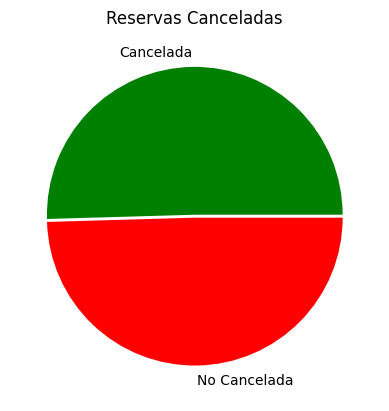

In [ ]:
colors = ['green', 'red']
plt.pie(ds_hoteles_train_limpio["Estado de la reserva"].value_counts(), labels=ds_hoteles_train_limpio["Estado de la reserva"].value_counts().index, colors = colors, explode = (0.01, 0.01))
plt.title('Reservas Canceladas')
plt.show()

Tambien guardamos algunos datasets filtrados, por si estan cancelados o no las reservas y agregamos una columna de si esta cancelado de estilo categorica para poder utilizarlo en varios graficos

In [ ]:
ds_reservas_canceladas = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio["is_canceled"] == 1]
ds_reservas_no_canceladas = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio["is_canceled"] == 0]
ds_hoteles_train_limpio["is_canceled"].value_counts()

1    30728
0    30169
Name: is_canceled, dtype: int64


---

# 1) Variable ADR

Esta variable nos dice la tarifa promedio por día de cada reserva. Nos da una idea del precio por día de alojamiento. Es una variable del tipo cuantitativa, por lo que procedemos a analizar sus medidas de resumen(media, mediana, moda, etc).

Veamos primero los valores que toma la variable

In [ ]:
columna_adr = ds_hoteles_train_limpio['adr']

ds_hoteles_train_limpio['adr'].value_counts().reset_index()

index   adr
0      62.00  2396
1      75.00  1502
2      90.00  1440
3      65.00  1204
4      80.00  1085
...      ...   ...
6126   78.17     1
6127  326.50     1
6128   72.77     1
6129  127.65     1
6130  131.47     1

[6131 rows x 2 columns]

Como es de esperarse, esta variable contiene muchos valores posibles.

## Analisis y Visualización de datos

Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [ ]:
columna_adr.describe()

count    60897.000000
mean       103.914204
std         46.480151
min          0.500000
25%         71.280000
50%         95.000000
75%        126.640000
max        510.000000
Name: adr, dtype: float64

Visualizamos estas medidas en un boxplot

Text(0.5, 1.0, 'Boxplot ADR')

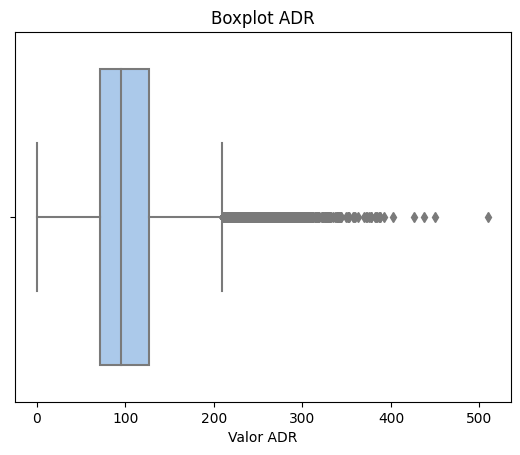

In [ ]:
sns.boxplot(x = columna_adr, palette = "pastel")
plt.xlabel('Valor ADR')

plt.title("Boxplot ADR")

Observamos que la gran mayoria de reservas tuvieron tarifas diarias que rondaron entre los 80 y 120 dólares, mientras que hay bastantes que superaban la barrera de los 200 dólares.

Nos interesa saber ahora si podemos encontrar algun dato de importancia para esas reservas que superaron los 200 dólares.

In [ ]:
ds_adr_mayor_200 = ds_hoteles_train_limpio.loc[columna_adr > 200]
ds_adr_mayor_200.shape

(2574, 31)

Hay 2574 reservas que superaron una reserva diaria de 200, ahora vamos a ver la distribucion de esas reservas

In [ ]:
ds_adr_mayor_200['adr'].describe()

count    2574.000000
mean      237.424433
std        33.566328
min       200.050000
25%       212.140000
50%       229.480000
75%       251.000000
max       510.000000
Name: adr, dtype: float64

Text(0.5, 0, 'Valor ADR')

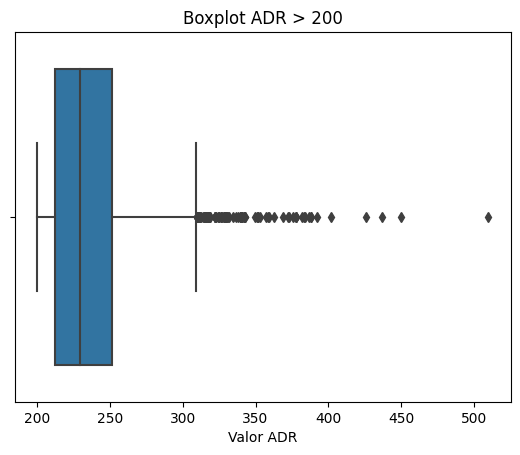

In [ ]:
sns.boxplot(x = ds_adr_mayor_200["adr"])

plt.title("Boxplot ADR > 200")

plt.xlabel('Valor ADR')

A estas reservas vamos a clasificarlas por el tipo de hotel

Text(0, 0.5, 'Tipo de hotel')

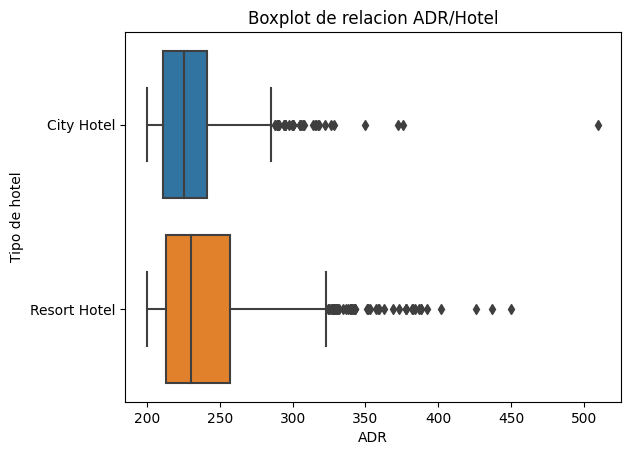

In [ ]:
sns.boxplot(x = ds_adr_mayor_200["adr"], y = ds_adr_mayor_200["hotel"])

plt.title("Boxplot de relacion ADR/Hotel")

plt.xlabel('ADR')

plt.ylabel('Tipo de hotel')

Tomamos como conclusion que los hoteles del tipo Resort tuvieron reservas con ADR mas elevados en promedio que los del tipo City.

Vamos a partir de una hipotesis que nos puede dar un dato clave: ¿Qué relación hay entre las reservas que tuvieron un ADR mayor a 200 con las reservas canceladas?(suponiendo que al tener un valor elevado esto pudo haber generado más de una cancelación)

In [ ]:
ds_adr_mayor_200['is_canceled'].value_counts()

1    1305
0    1269
Name: is_canceled, dtype: int64

Acordemosnos que, según la notación usada en el DataFrame, la variable is_canceled puede tomar dos valores: 1 si, finalmente la reserva fue cancelada y 0, si la reserva no fue cancelada.

([<matplotlib.axis.XTick at 0x796e92309f90>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

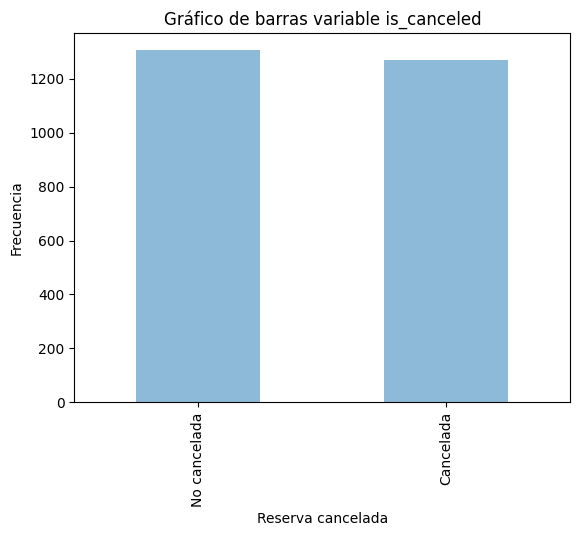

In [ ]:
grf_ds= ds_adr_mayor_200['is_canceled'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable is_canceled" , xlabel="Reserva cancelada" , ylabel="Frecuencia")


plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Esto que obtuvimos tiene un valor muy grande: conseguimos ver que 1305 viajes con un adr mayor a 200 fueron cancelados.

Analizaremos el conjunto de datos donde el adr es menor que 200

In [ ]:
ds_adr_menor_200 = ds_hoteles_train_limpio.loc[columna_adr < 200]
ds_adr_menor_200.shape

(58246, 31)

Existen 59261 reservas,por lo cual veremos como se comportan con las cancelaciones,lo que nos lleva a pensar en la posibilidad que a menor adr,las cancelaciones son mas concurrentes.
Vamos a ver la distribucion de esas reservas

In [ ]:
ds_adr_menor_200['adr'].describe()

count    58246.000000
mean        97.887114
std         37.049930
min          0.500000
25%         70.000000
50%         93.500000
75%        120.700000
max        199.860000
Name: adr, dtype: float64

Text(0.5, 0, 'Valor ADR')

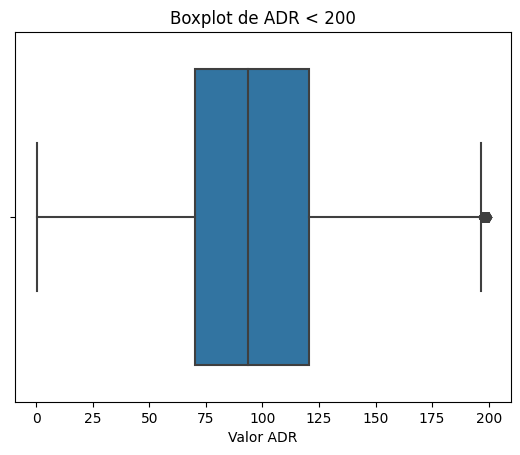

In [ ]:
sns.boxplot(x = ds_adr_menor_200["adr"])

plt.title("Boxplot de ADR < 200")

plt.xlabel('Valor ADR')

In [ ]:
ds_adr_menor_200['is_canceled'].value_counts()

1    29374
0    28872
Name: is_canceled, dtype: int64

Podemos notar a simple vista que se comporta de la misma manera que el aquellas reserva con adr mayor a 200.


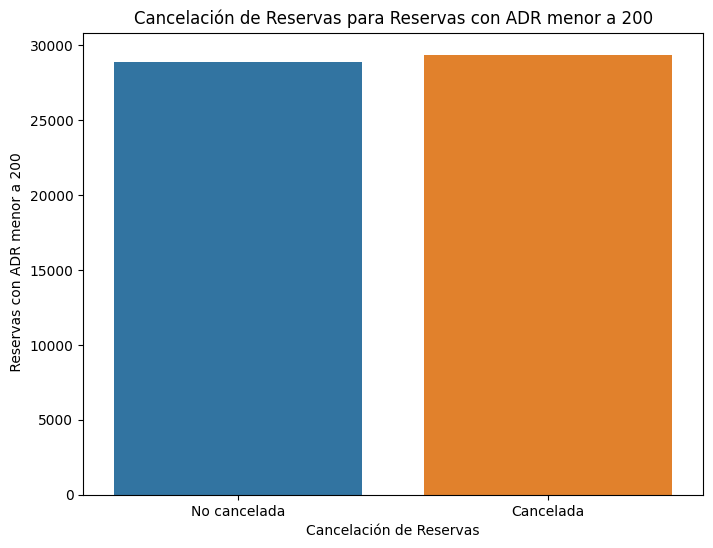

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adr_menor_200, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel(' Reservas con ADR menor a 200')
plt.title('Cancelación de Reservas para Reservas con ADR menor a 200')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

La variable ADR  es esencial en nuestro análisis, ya que nos permite examinar tanto de manera univariada como multivariada cómo las tarifas de habitaciones impactan en las cancelaciones de reservas. Al visualizar los datos según rangos de ADR y explorar correlaciones con otras variables clave, podemos comprender mejor la influencia de las tarifas en las cancelaciones, por lo tanto es imprescindible ADR en el analisis.


## Analisis de valores atipicos

Analicemos el boxplot

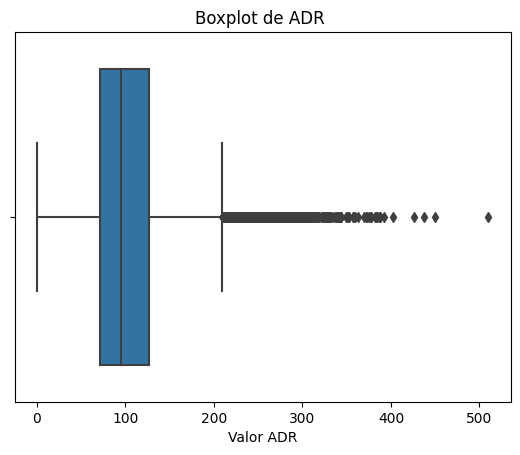

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["adr"])
plt.title("Boxplot de ADR ")

plt.xlabel('Valor ADR')
plt.show()

Analicemos en forma univariada

In [ ]:
# Supongamos que tienes un DataFrame llamado ds_hoteles_train_limpio con una columna llamada "adr"
# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["adr"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["adr"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica los outliers en el DataFrame
outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["adr"] < lower_limit) | (ds_hoteles_train_limpio["adr"] > upper_limit)]

upper_limit


209.68

El limite superior se encuentra en 209,por lo cual aquellos valores que se encuentran por arriba de ese valor son considerados outliers

In [ ]:
outliers

hotel  lead_time  arrival_date_year arrival_date_month  \
2        City Hotel         25               2016            October   
111      City Hotel        194               2017                May   
171      City Hotel        132               2017             August   
173    Resort Hotel        157               2016             August   
217      City Hotel         22               2016               July   
...             ...        ...                ...                ...   
61834  Resort Hotel         95               2017               July   
61849  Resort Hotel        132               2017             August   
61871  Resort Hotel         94               2015             August   
61889    City Hotel          4               2017           February   
61903    City Hotel        140               2017               June   

       arrival_date_week_number  arrival_date_day_of_month  \
2                            42                         13   
111                          22                         28   
171                          31                          1   
173                          32                          6   
217                          30                         21   
...                         ...                        ...   
61834                        30                         24   
61849                        32                         12   
61871                        33                         15   
61889                         6                         10   
61903                        26                         28   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
2                            0                     1       2       2.0  ...   
111                          2                     4       2       2.0  ...   
171                          0                     4       2       1.0  ...   
173                          2                     5       2       1.0  ...   
217                          0                     2       2       2.0  ...   
...                        ...                   ...     ...       ...  ...   
61834                        1                     4       2       2.0  ...   
61849                        2                     1       2       0.0  ...   
61871                        2                     3       2       0.0  ...   
61889                        0                     2       3       2.0  ...   
61903                        0                     3       2       3.0  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
2        No Deposit    9.0      -1                    0     Transient  229.00   
111      No Deposit   14.0      -1                    0     Transient  227.25   
171      Refundable    8.0      -1                    0     Transient  209.70   
173      No Deposit     -1      -1                    0     Transient  213.00   
217      No Deposit    9.0      -1                    0     Transient  240.00   
...             ...    ...     ...                  ...           ...     ...   
61834    No Deposit  240.0      -1                    0     Transient  305.00   
61849    No Deposit  240.0      -1                    0     Transient  232.33   
61871    No Deposit  240.0      -1                    0     Transient  233.00   
61889    No Deposit    8.0      -1                    0     Transient  263.00   
61903    No Deposit    9.0      -1                    0     Transient  220.00   

       required_car_parking_spaces  total_of_special_requests is_canceled  \
2                                0                          2           0   
111                              0                          0           0   
171                              0                          0           1   
173                              0                          1           1   
217                              0                          1           0   
...                 

2105 valores de ADR son valores atipicos,pero el contexto donde ADR puede tomar valores valores altos,por lo cual los dejaremos en el analisis,porque puede darnos alguna informacion de ello,ya que puede existir alguna correlacion con su cancelacion.

Veamos como se comportan los outliers mas severos del boxplot,es decir aquellos que su valor supera los 400

In [ ]:
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["adr"] > 400)]

outliers_severos

hotel  lead_time  arrival_date_year arrival_date_month  \
8690   Resort Hotel         31               2017             August   
50240  Resort Hotel        378               2017             August   
54002  Resort Hotel         59               2017             August   
55460    City Hotel          0               2017                May   
60071  Resort Hotel        104               2017             August   

       arrival_date_week_number  arrival_date_day_of_month  \
8690                         31                          1   
50240                        31                          1   
54002                        33                         13   
55460                        19                          9   
60071                        33                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
8690                         2                     6       2       2.0  ...   
50240                        4                    10       2       0.0  ...   
54002                        2                     4       2       2.0  ...   
55460                        0                     1       1       0.0  ...   
60071                        2                     3       3       1.0  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
8690     No Deposit  250.0      -1                    0     Transient  426.25   
50240    No Deposit  314.0      -1                    0     Transient  450.00   
54002    No Deposit  250.0      -1                    0     Transient  437.00   
55460    No Deposit  159.0      -1                    0     Transient  510.00   
60071    No Deposit  240.0      -1                    0     Transient  402.00   

       required_car_parking_spaces  total_of_special_requests is_canceled  \
8690                             0                          2           0   
50240                            0                          0           1   
54002                            0                          0           1   
55460                            0                          0           0   
60071                            0                          1           0   

      Estado de la reserva  
8690          No Cancelada  
50240            Cancelada  
54002            Cancelada  
55460         No Cancelada  
60071         No Cancelada  

[5 rows x 31 columns]

In [ ]:
outliers_severos['is_canceled'].value_counts()

0    3
1    2
Name: is_canceled, dtype: int64

Podemos notar que se no existe ninguna tendencia a cancelacion de a mayor precio,mayor o menor probabilidad de cancelar,por lo cual ,podrian borrarse del analisis ya que no aportan nada y distorsionan al dataset



---


Dado que ya visualizamos de manera univariada,veamos su relacion con otra vaariable para notar si existen valores atipicos,y poder evaluarlos,para ello utilizaremos la distancia de Mahalanobis
En este caso vamos a ver como se relaciona con requiered parking spaces.
Notemos en un grafico como se distribuyen


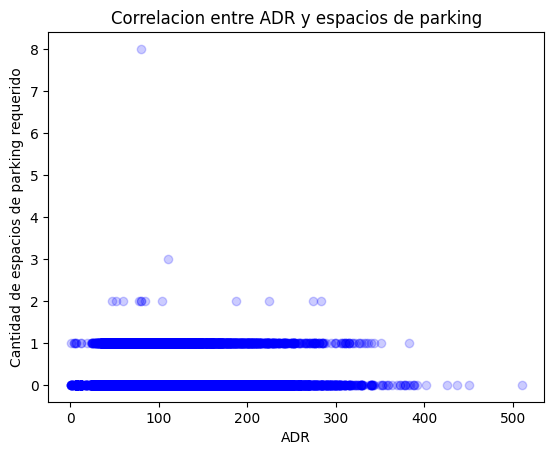

In [ ]:
plt.scatter(ds_hoteles_train_limpio['adr'],ds_hoteles_train_limpio['required_car_parking_spaces'], color='blue', alpha=0.2)
plt.xlabel('ADR')
plt.ylabel('Cantidad de espacios de parking requerido')
plt.title('Correlacion entre ADR y espacios de parking')
plt.show()

Podemos notar cómo ciertos valores están muy alejados de la media. En principio, todos los valores que se visualizan son válidos, ya que no presentan valores negativos, lo cual es imposible en el dominio de trabajo. Aunque algunos valores puedan parecer exagerados, es importante señalar que son posibles y no necesariamente incorrectos.

No obstante, para comprender mejor la importancia de estos valores extremos, vamos a analizar un ejemplo específico calculando su distancia de Mahalanobis:

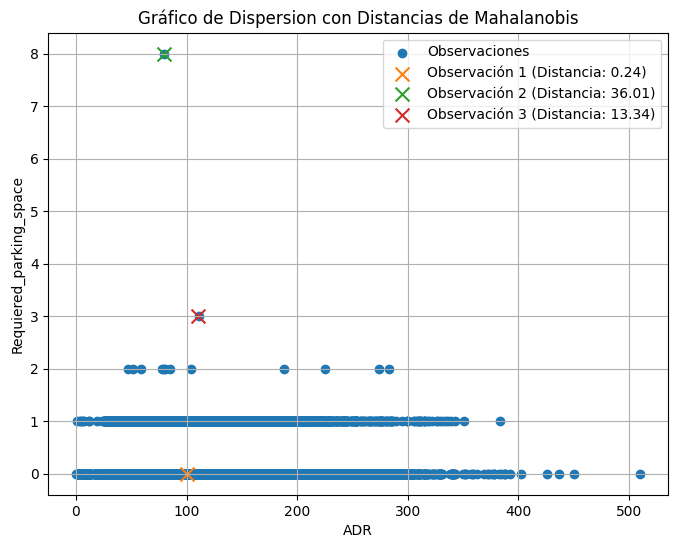

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

variables = ds_hoteles_train_limpio[['adr', 'required_car_parking_spaces']].values

#Defino puntos que observe en el grafico para poder luego utilizarlos
puntos_observacion = [np.array([100, 0]), np.array([80, 8]), np.array([110, 3])]


matriz_covarianza = np.cov(variables, rowvar=False)


inversa_matriz_covarianza = np.linalg.inv(matriz_covarianza)


plt.figure(figsize=(8, 6))
plt.scatter(variables[:, 0], variables[:, 1], label='Observaciones')

# Agregar los puntos de observación al gráfico y calcular las distancias de Mahalanobis para cada uno.
for i, punto in enumerate(puntos_observacion):
    diferencia = punto - np.mean(variables, axis=0)
    mahalanobis_distance = np.sqrt(np.dot(np.dot(diferencia, inversa_matriz_covarianza), diferencia))
    plt.scatter(punto[0], punto[1], label=f'Observación {i + 1} (Distancia: {mahalanobis_distance:.2f})', marker='x', s=100)


plt.xlabel('ADR')
plt.ylabel('Requiered_parking_space')
plt.legend()


plt.grid(True)
plt.title('Gráfico de Dispersion con Distancias de Mahalanobis')
plt.show()

Entonces, lo que estamos observando en el gráfico es que esos puntos verdes y rojo están notablemente distantes del grupo principal de puntos.

Ahora bien, es notorio que esos valores de distancia de Mahalanobis son bastante amplios. Por ejemplo, ese punto verde tiene un valor de distancia de más de 30. Esto señala que es verdaderamente inusual en relación con los otros puntos.

No obstante, es fundamental comprender que estos datos no necesariamente son incorrectos ni requieren eliminación. En ocasiones, existen casos extremos que son totalmente legítimos y simplemente reflejan situaciones poco comunes. Lo relevante aquí es que estos valores elevados de distancia de Mahalanobis proporcionan una manera cuantitativa de expresar que estos puntos son distintos, pero eso no los convierte automáticamente en incorrectos. Siguen siendo parte de nuestros datos y pueden contener información valiosa.







---

# 2, 3, 4) Variables Adults, Children y Babies
Estas variables del tipo cuantitativas las analizamos juntas para ver si podemos encontrar algún patrón para las reservas con muchas personas(quizás conformadas por grupos familiares), viendo también la cantidad de adultos, niños y bebés que tuvieron las mismas.

## Variable Adults
Es una variable del tipo cuantitativas, son numeros enteros que representar la cantidad de adultos estan registrados en la reserva.

Veamos los valores que toma la variable

In [ ]:
columna_adults = ds_hoteles_train_limpio['adults']
columna_adults.value_counts().reset_index()

index  adults
0      2   46563
1      1   11152
2      3    3153
3      4      29

Podemos observar que la gran mayoría de reservas tienen 2 adultos, mientras que hay muy pocas que tienen más de 10 adultos.

### Analisis Profundo y Visualizacion de los datos
Analicemos mas a fondo esta variable

Text(0, 0.5, 'Cantidad de reservas')

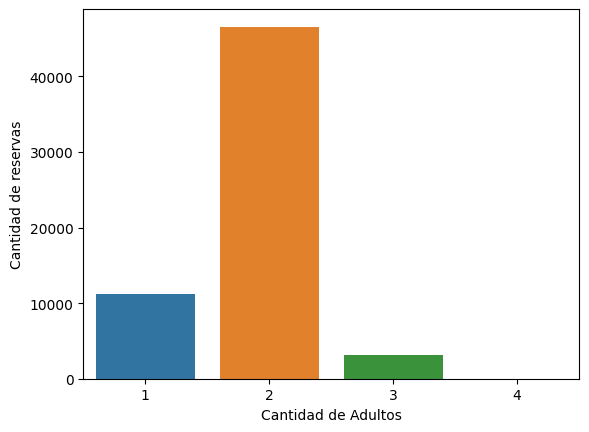

In [ ]:
sns.countplot(data=ds_hoteles_train_limpio, x="adults")
plt.xlabel("Cantidad de Adultos")
plt.ylabel("Cantidad de reservas")

Para visualizar mejor los datos, separaremos en 2 grupos:


*   Reservas con 1 a 2 adultos(mayor recurrencia en el dataset)
*   Reservas restantes(menor recurrencia en el dataset)






Comencemos con el primer grupo

In [ ]:
ds_adultos_mas_recurrentes = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['adults'] >= 1) & (ds_hoteles_train_limpio['adults'] <= 2)]

ds_adultos_mas_recurrentes['is_canceled'].value_counts()

1    29232
0    28483
Name: is_canceled, dtype: int64

Hay alrededor de 60000 reservas con estos valores para la variable adults

Veamos en un gráfico la relación entre estas reservas con valores recurrentes de adultos con la variable target is_canceled


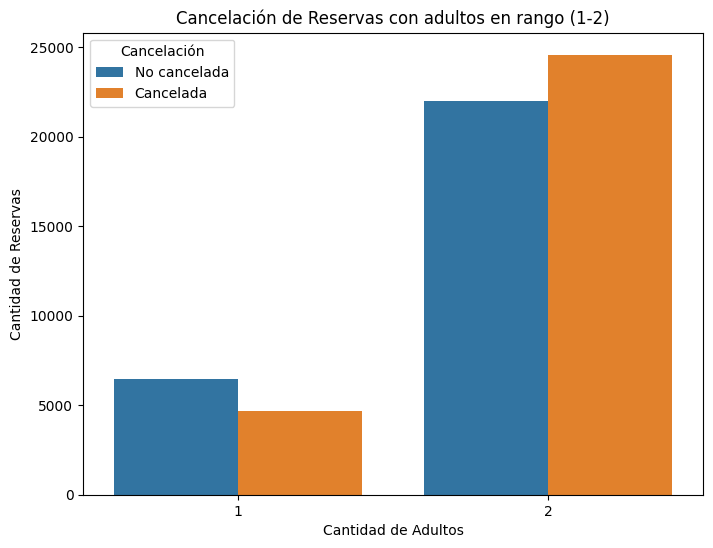

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adultos_mas_recurrentes, x='adults' , hue= 'is_canceled')
plt.xlabel('Cantidad de Adultos')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas con adultos en rango (1-2)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Para reservas con 2 adultos, predominan la cancelacion, mientras que para reservas con 1 adulto ,la reservas sin cancelaciones son mayorias. Podemos concluir entonces que para estos valores de la variable adults la mitad de los viajes van a ser cancelados.

In [ ]:
ds_adultos_menos_recurrentes = ds_hoteles_train_limpio[ds_hoteles_train_limpio['adults'] >= 3]
ds_adultos_menos_recurrentes['is_canceled'].value_counts()

0    1686
1    1496
Name: is_canceled, dtype: int64

Hay alrededor de 3000 reservas con estos valores para la variable adults

Veamos en un gráfico la relación entre estas reservas con valores atípicos de adultos con la variable target is_canceled


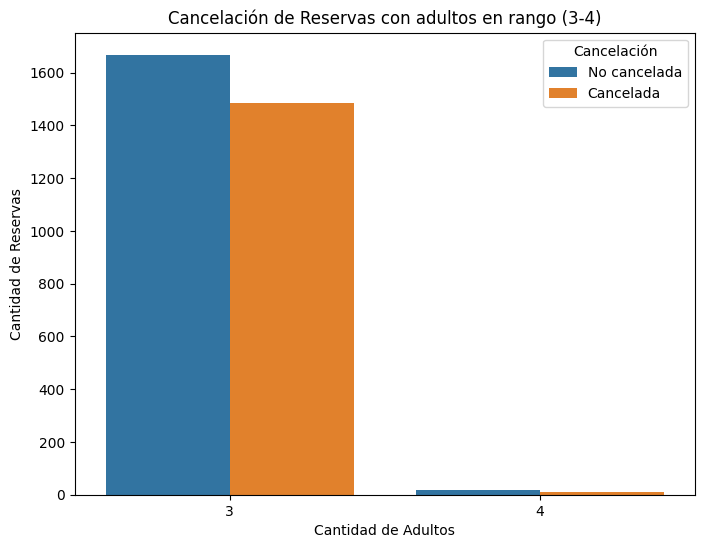

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adultos_menos_recurrentes, x='adults' , hue= 'is_canceled')
plt.xlabel('Cantidad de Adultos')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas con adultos en rango (3-4)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()


La variable adults en nuestro análisis es relevante en varios aspectos. En primer lugar, nos permite explorar si la cantidad de adultos en una reserva tiene un impacto en las tasas de cancelación. Podemos identificar si las reservas con más adultos tienden a tener tasas de cancelación diferentes a las de las reservas con menos adultos.
Además, al considerar la variable "adults" en conjunto con la variable "is_canceled", podemos buscar patrones de concurrencia. Es decir, identificar si ciertas combinaciones de cantidad de adultos y cancelaciones son más frecuentes que otras.

### Analisis de valores atipicos

Analicemos el boxplot

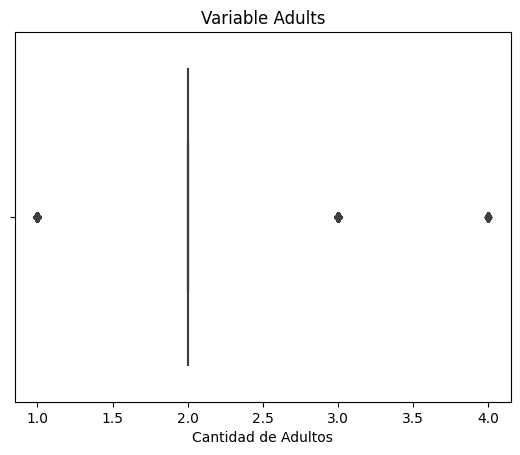

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["adults"])

plt.title('Variable Adults')
plt.xlabel('Cantidad de Adultos')

plt.show()

Podemos notar de forma que los valores se ditribuyen en su mayoria ,siendo dos la cantidad de adultos mas recurrente,pero estos otros valores posibles (1 3 y 4) no son valores que en su contexto no sean posibles

Vamos a visualziar ya que no tenemos mucho para decir de manera univariada,que pasa si vemos como se comporta con el ADR

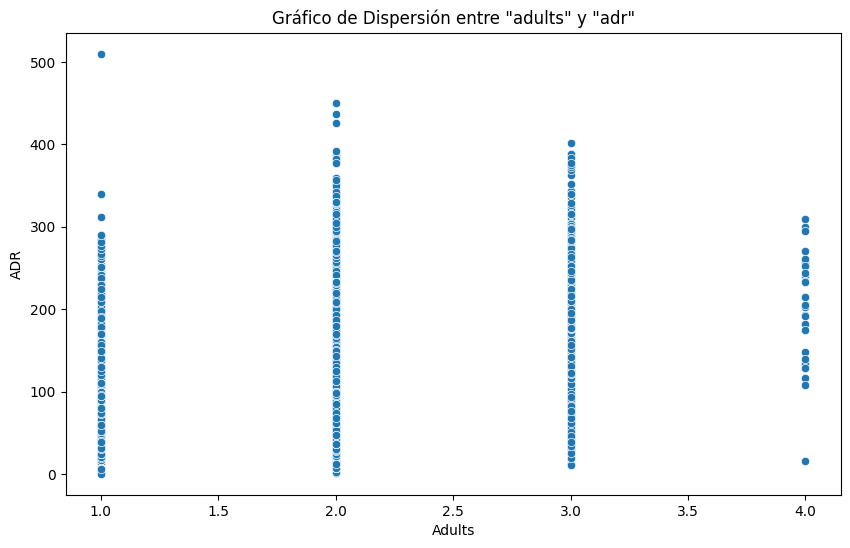

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds_hoteles_train_limpio, x='adults', y='adr')
plt.title('Gráfico de Dispersión entre "adults" y "adr"')
plt.xlabel('Adults')
plt.ylabel('ADR')
plt.show()

Podemos notar de forma visual,que para reservas de un adulto tenemos una que tiene el ADR mas grande posible,lo cual es considerado un outlier porque lo esperado es que ese precio lo paguen entre mas adultos.
A su vez para reservas con 4 adultos,existe un caso que representa de las reservas mas baratas para su cantidad de personas,lo cual nos genera ruido su lejania con los otros casos

En estos casos,decidira de no tener en cuenta estos casos para luego nuestro modelo predictivo


---
## Variable Children


Veamos los valores que toma la variable

In [ ]:
columna_children = ds_hoteles_train_limpio['children']
columna_children.value_counts().reset_index()

index  children
0    0.0     56602
1    1.0      2432
2    2.0      1827
3    3.0        35
4   10.0         1

Veamos ahora la cantidad de reservas que tuvieron niños

In [ ]:
(columna_children > 0).value_counts()

False    56602
True      4295
Name: children, dtype: int64

Hay 4295 reservas que tuvieron niños.

### Analisis de datos y Visualizaciones


Text(0, 0.5, 'Cantidad de reservas')

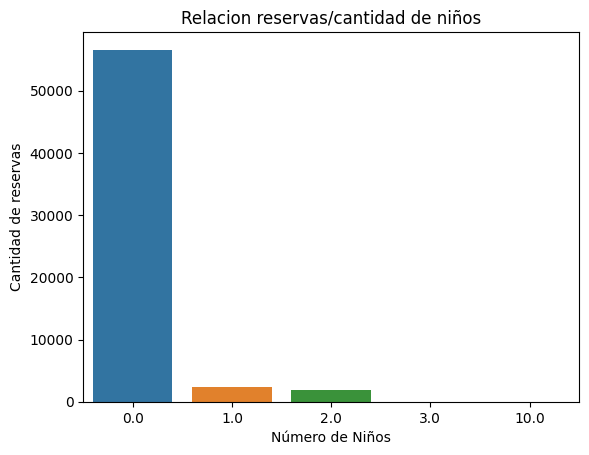

In [ ]:
sns.countplot(data=ds_hoteles_train_limpio, x="children")
plt.title('Relacion reservas/cantidad de niños')
plt.xlabel("Número de Niños")

plt.ylabel("Cantidad de reservas")

Para visualizar mejor los datos,separaremos en 2 grupos:


*   Reservas sin niños(mayor recurrencia en el dataset)
*   Reservas con niños(menor recurrencia en el dataset)


Comenzemos con el primer grupo

In [ ]:
ds_reservas_sin_niños= ds_hoteles_train_limpio.loc[columna_children == 0]
ds_reservas_sin_niños['is_canceled'].value_counts()

1    28589
0    28013
Name: is_canceled, dtype: int64

Veamos en un grafico

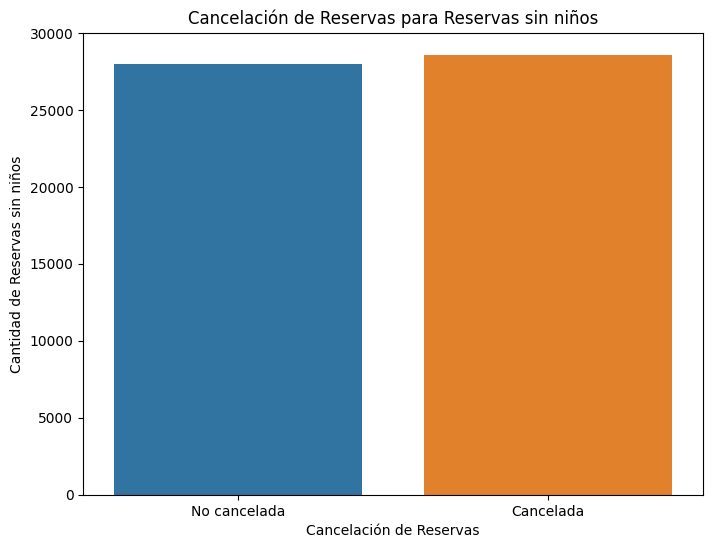

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_niños, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin niños')
plt.title('Cancelación de Reservas para Reservas sin niños')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos concluir entonces que para estos valores de la variable children la mitad de los viajes fueron cancelados.

Analicemos el proximo grupo

In [ ]:
ds_reservas_con_niños= ds_hoteles_train_limpio.loc[columna_children > 0]


ds_reservas_con_niños['is_canceled'].value_counts()

0    2156
1    2139
Name: is_canceled, dtype: int64

Veamos en un grafico

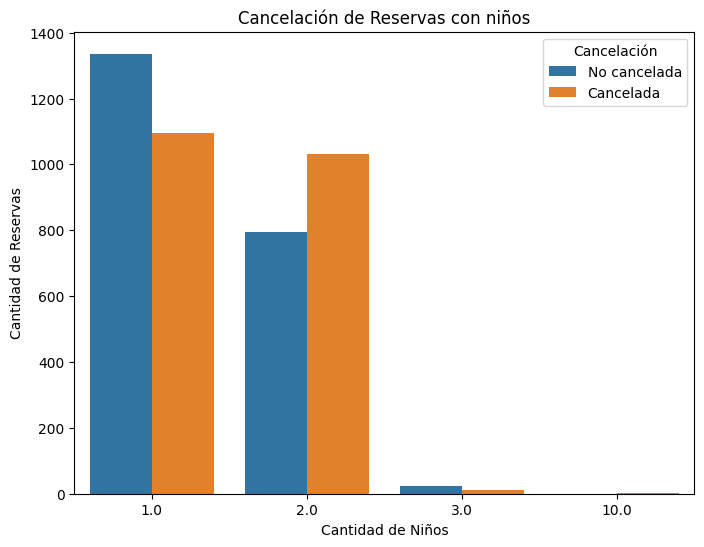

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_niños, x='children' , hue= 'is_canceled')
plt.xlabel('Cantidad de Niños')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas con niños')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que las reservas con 2 niños  han sido mas predominantes las canceladas. Mientras que en los otros valores nos indican que predominan las reservas no canceladas





La variable "children" (niños) también desempeña un papel importante en nuestro análisis. Al igual que con la variable "adults", podemos examinar si la presencia y cantidad de niños en una reserva influyen en las tasas de cancelación

### Analisis de valores atipicos

Analicemos el boxplot

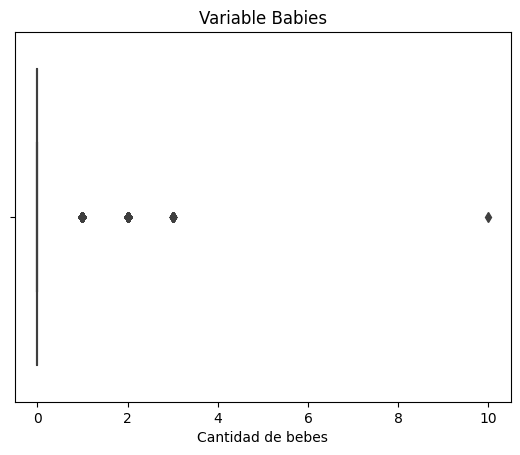

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["children"])
plt.title('Variable Babies')
plt.xlabel('Cantidad de bebes')
plt.show()

Podemos notar de forma que los valores se ditribuyen en su mayoria ,que las reservs no tengan niños,mientras que hay casos con otros valores posibles que son posibles.
Pero nos llama la atencion el caso de 10 niños,voy a analizar ese caso

In [ ]:
outlier_niño = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["children"] > 9)]

outlier_niño

hotel  lead_time  arrival_date_year arrival_date_month  \
49181  Resort Hotel         55               2015               July   

       arrival_date_week_number  arrival_date_day_of_month  \
49181                        29                         12   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
49181                        4                    10       2      10.0  ...   

       deposit_type agent company days_in_waiting_list customer_type     adr  \
49181    No Deposit   8.0      -1                    0      Contract  133.16   

       required_car_parking_spaces  total_of_special_requests is_canceled  \
49181                            0                          1           1   

      Estado de la reserva  
49181            Cancelada  

[1 rows x 31 columns]

Podemos notar que tiene asociado 2 adultos y su reserva fue cancelada,decidiremos considerarla en el analisis ya que no afecta a la variable su presencia



---
## Variable Babies


Veamos los valores que toma la variable

In [ ]:
columna_babies = ds_hoteles_train_limpio['babies']
columna_babies.value_counts()

0    60481
1      408
2        7
9        1
Name: babies, dtype: int64

In [ ]:
columna_babies.loc[columna_babies > 0].value_counts().sum()

416

Hubieron 416 reservas con bebes en ellas.

### Analisis y visualizacion de datos



Para visualizar mejor los datos, separaremos en 2 grupos:


*   Reservas sin bebés(mayor recurrencia en el dataset)
*   Reservas con bebés(menor recurrencia en el dataset)


Comencemos con el primer grupo

In [ ]:
ds_reservas_sin_bebes = ds_hoteles_train_limpio.loc[columna_babies == 0]
ds_reservas_sin_bebes['is_canceled'].value_counts()

1    30602
0    29879
Name: is_canceled, dtype: int64

Veamos en un grafico

([<matplotlib.axis.XTick at 0x796e9b12c820>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

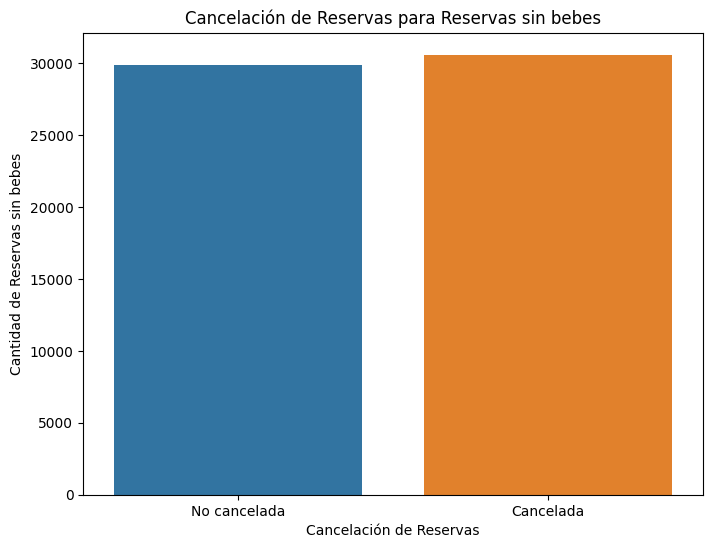

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_bebes, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin bebes')
plt.title('Cancelación de Reservas para Reservas sin bebes')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Podemos concluir entonces que para estos valores de la variable babies la mitad de los viajes fueron cancelados.

Ahora continuamos con el otro grupo

In [ ]:
ds_reservas_con_bebes = ds_hoteles_train_limpio.loc[columna_babies > 0]
ds_reservas_con_bebes['is_canceled'].value_counts()

0    290
1    126
Name: is_canceled, dtype: int64

Veamos como se distribuye

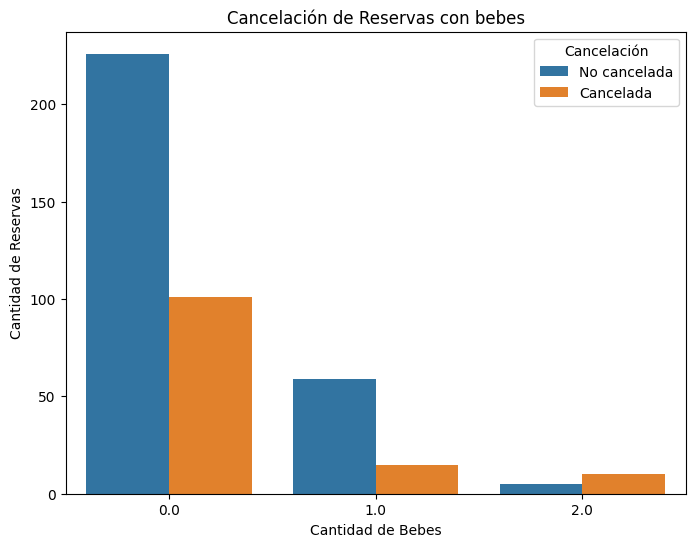

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_bebes, x='children' , hue= 'is_canceled')
plt.xlabel('Cantidad de Bebes')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas con bebes')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()


Observamos que las reservas con 2 bebes han sido mas predominantes las canceladas. Mientras que en los otros valores nos indican que predominan las reservas no canceladas


La inclusión de la variable "babies" en nuestro análisis es fundamental para entender cómo la presencia de bebés en una reserva puede influir en las tasas de cancelación . Podemos examinar si la presencia de bebés afecta significativamente a las cancelaciones, lo que podría indicar la necesidad servicios específicos para familias con bebés,lo cual puede ser muy importante para tener en cuenta con otras variables referidas a pedidos en la reserva.

### Analisis de valores atipicos

Analicemos el boxplot

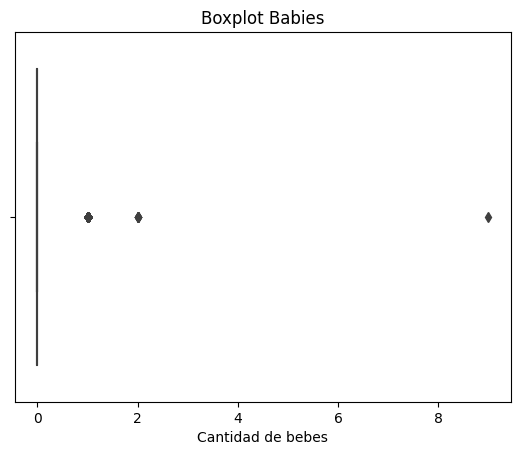

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["babies"])
plt.title('Boxplot Babies')
plt.xlabel('Cantidad de bebes')

plt.show()

Podemos notar de forma que los valores se ditribuyen en su mayoria ,que las reservs no tengan bebes,mientras que hay casos con otros valores posibles que son posibles.
Pero nos llama la atencion el caso de 9 bebes,voy a analizar ese caso

In [ ]:
outlier_bebe = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["babies"] > 8)]

outlier_bebe

hotel  lead_time  arrival_date_year arrival_date_month  \
12659  City Hotel         11               2015            October   

       arrival_date_week_number  arrival_date_day_of_month  \
12659                        42                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
12659                        2                     1       1       0.0  ...   

       deposit_type agent company days_in_waiting_list    customer_type   adr  \
12659    No Deposit  95.0      -1                    0  Transient-Party  95.0   

       required_car_parking_spaces  total_of_special_requests is_canceled  \
12659                            0                          0           0   

      Estado de la reserva  
12659         No Cancelada  

[1 rows x 31 columns]

Este caso nos genera mucha intriga,ya que es una reserva con un unico adulto y 9 bebes,lo cual podriamos interpretar que no tiene sentido utilizar para predecir nuestros resultados,por lo cual eliminaremos esta reserva

In [ ]:
ds_hoteles_train_limpio = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["babies"] < 8)]


# 5) Variable Agent


## Analisis y visualizacion de datos
Miremos ahora el top 10 de agentes con más reservas asignadas, ya que, cuando vimos los valores que la variable podía tomar habían más de 296 IDs.

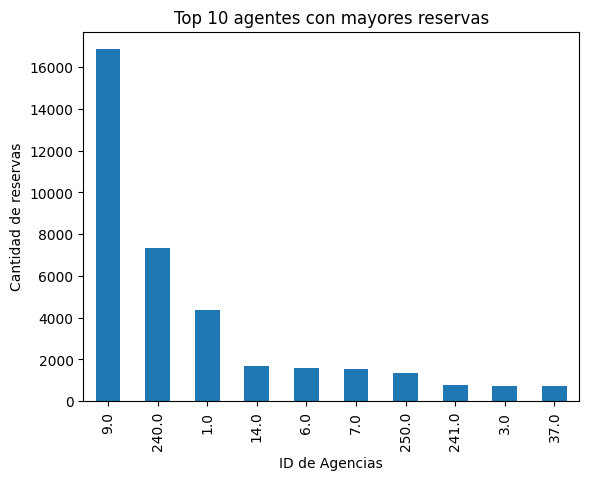

In [ ]:
ds_filtrado_sin_agentes_invalidos = ds_hoteles_train_limpio[ds_hoteles_train_limpio['agent'] != '-1']

top_10_agents = (ds_filtrado_sin_agentes_invalidos['agent'].value_counts()).iloc[:10]


top_10_agents.plot(kind='bar', title='Top 10 agentes con mayores reservas')

plt.xlabel('ID de Agencias')

plt.ylabel('Cantidad de reservas')

plt.show()

Vemos que, por amplia diferencia, el agente con ID de 9.0 es la que mayor cantidad de reservas recibió.

Obtengamos los ID de las agencias con mayor cantidad de reservas canceladas y las que no

In [ ]:
cancelaciones_por_agencia = ds_filtrado_sin_agentes_invalidos.groupby('agent')['is_canceled'].sum().reset_index()
cancelaciones_por_agencia = cancelaciones_por_agencia.sort_values(by='is_canceled', ascending=False)

Con respecto a las mas canceladas

In [ ]:
agencias_mas_cancelaciones = cancelaciones_por_agencia.head(10)
agencias_mas_cancelaciones

agent  is_canceled
8      9.0         9240
159  240.0         3877
0      1.0         3663
5      6.0          687
17    19.0          554
2      3.0          527
35    37.0          505
13    14.0          432
19    21.0          379
27    29.0          363

Visualizamos en un gráfico el top 10 de agentes con más cancelaciones de viajes

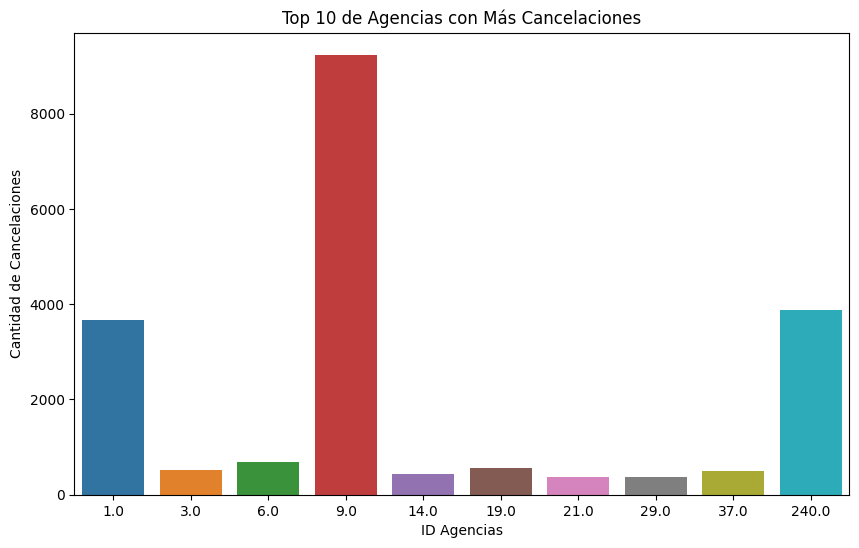

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agencias_mas_cancelaciones, x='agent', y='is_canceled')
plt.xlabel('ID Agencias')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Top 10 de Agencias con Más Cancelaciones')

plt.show()

Podemos declinarnos a pensar que las reservas asociadas a ese agente pueden tener mayor posibilidad de cancelarse,mientras que las restantes podrian tener mayor posibilidad de no cancelarse


Veamos la relación de esta variable con el target

In [ ]:
tasa_cancelacion_por_agencia = ds_filtrado_sin_agentes_invalidos.groupby("agent")["is_canceled"].mean() * 100

tasa_cancelacion_por_agencia = tasa_cancelacion_por_agencia.reset_index()

tasa_cancelacion_por_agencia = tasa_cancelacion_por_agencia.sort_values(by="is_canceled", ascending=False)
tasa_cancelacion_por_agencia

agent  is_canceled
134  182.0        100.0
131  179.0        100.0
158  236.0        100.0
157  235.0        100.0
174  257.0        100.0
..     ...          ...
22    24.0          0.0
191  289.0          0.0
190  288.0          0.0
23    25.0          0.0
294  535.0          0.0

[295 rows x 2 columns]

In [ ]:
media_tasa_cancelacion = tasa_cancelacion_por_agencia["is_canceled"].mean()

print("La media de la tasa de cancelación entre todas las agencias es:", media_tasa_cancelacion)

La media de la tasa de cancelación entre todas las agencias es: 34.7850025243756


Las agencias con tasas de cancelación más altas tienden a tener una propensión mayor a cancelar reservas en comparación con las agencias con tasas más bajas,por lo cual lo considero un variable muy importante para el analisis

La inclusión de la variable "agent"  en nuestro análisis es crucial para evaluar el comportamiento de las diferentes agencias en términos de cancelaciones. Mediante el análisis de esta variable, podemos identificar qué agencias tienden a generar más cancelaciones y cuáles tienen un historial de reservas más estables. Esta información nos permite anticipar mejor las tendencias de cancelación.



---

# 6, 7, 8, 9) Variables arrival Date, Week, Month and Year




## Variable Arrival Date Day of Month



Vemos todos los valores posibles que puede llegar a tomar la columna

In [ ]:
columna_arrival_date = ds_hoteles_train_limpio['arrival_date_day_of_month']
columna_arrival_date.value_counts().reset_index()

index  arrival_date_day_of_month
0      17                       2266
1       5                       2233
2      15                       2159
3      16                       2146
4       9                       2132
5      26                       2118
6      25                       2088
7      12                       2086
8      28                       2050
9       2                       2049
10     19                       2044
11     20                       2044
12     24                       2022
13      8                       2022
14     30                       2003
15     18                       2003
16      3                       1999
17     27                       1975
18     14                       1974
19      6                       1936
20      7                       1916
21      4                       1906
22     13                       1877
23      1                       1875
24     22                       1857
25     21                       1854
26     29                       1824
27     23                       1817
28     10                       1776
29     11                       1742
30     31                       1103

Como es de esperarse, esta variable contiene muchos valores posibles.

### Analisis y Visualizacion de datos
Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [ ]:
columna_arrival_date.describe()

count    60896.000000
mean        15.788131
std          8.795473
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

Visualicemos en un boxplot los datos

Text(0.5, 1.0, 'Boxplot Arrival Date Day Of Month')

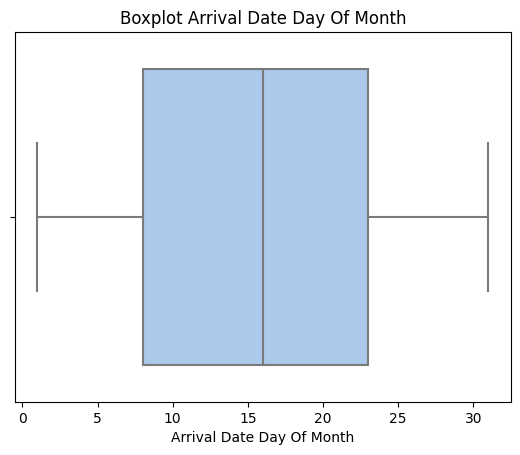

In [ ]:
sns.boxplot(x = columna_arrival_date, palette = "pastel")
plt.xlabel('Arrival Date Day Of Month')

plt.title("Boxplot Arrival Date Day Of Month")

Podemos notar que la distribucion ,nos presenta que no existe ningun valor mal cargado,ni fuera de los rangos posibles de dias del mes.

Text(0, 0.5, 'Cantidad de reservas')

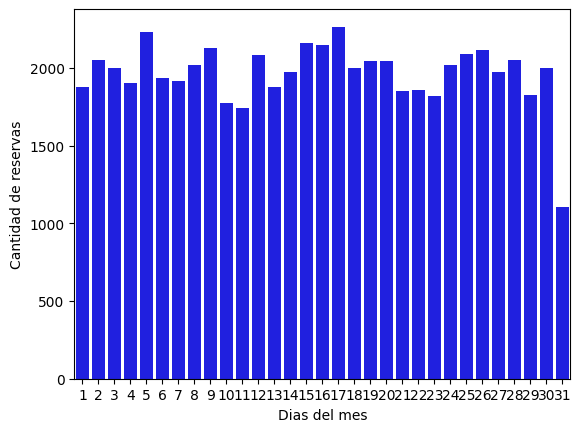

In [ ]:
sns.countplot(data=ds_hoteles_train_limpio, x="arrival_date_day_of_month",color= 'blue')
plt.xlabel("Dias del mes")
plt.ylabel("Cantidad de reservas")

Veamos que dias son los que tienen mas cancelaciones asociadas

In [ ]:
cancelaciones_por_dia = ds_hoteles_train_limpio.groupby('arrival_date_day_of_month')['is_canceled'].sum().reset_index()
cancelaciones_por_dia = cancelaciones_por_dia.sort_values(by='is_canceled', ascending=False)

dias_con_mas_cancelaciones = cancelaciones_por_dia.head(5)
dias_con_mas_cancelaciones

arrival_date_day_of_month  is_canceled
16                         17         1285
4                           5         1167
14                         15         1155
25                         26         1148
7                           8         1142

Podemos notar que los dias que mas cancelaciones tuvieron estan dispersos en todo su rango,tanto dias del principio hasta el final de mes

La fecha de llegada es esencial para prever las cancelaciones, ya que te permite identificar patrones históricos de cancelación en función de cuándo se programan las estancias. Por ejemplo, es posible que ciertos días que tengan tasas de cancelación más altas debido a eventos específicos o estacionalidades


---
## Variable  ArrivalDateMonth




Veamos los valores que toma la variable

In [ ]:
columna_arrival_date_month = ds_hoteles_train_limpio['arrival_date_month']
columna_arrival_date_month.value_counts().reset_index()

index  arrival_date_month
0      August                7083
1        July                6426
2         May                6061
3       April                5813
4     October                5742
5        June                5706
6   September                5542
7       March                4824
8    February                4052
9    December                3384
10   November                3330
11    January                2933

### Analisis y Visualizacion de graficos
Veamos estos datos en un grafico para poder notar las distribuciones

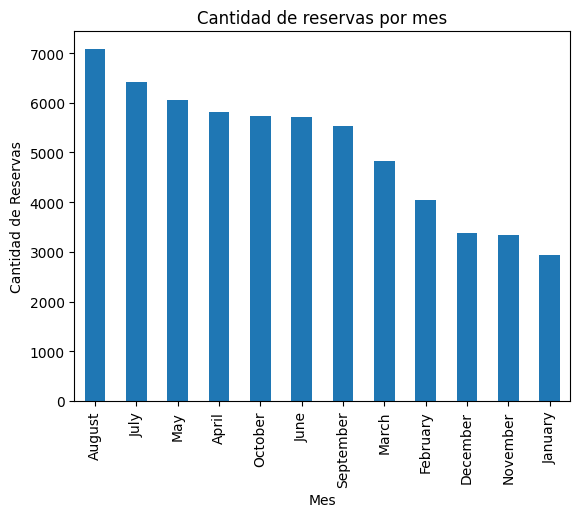

In [ ]:

reservas_por_mes = ds_hoteles_train_limpio['arrival_date_month'].value_counts()

reservas_por_mes.plot(kind='bar', title='Cantidad de reservas por mes')

plt.xlabel('Mes')
plt.ylabel('Cantidad de Reservas')

# Mostrar el gráfico
plt.show()

Dado que no tiene ningun dato faltante,y los datos estan dentro de lo esperado,veamos los paises con mayor cancelacion de reservas

In [ ]:
cancelaciones_por_mes = ds_hoteles_train_limpio.groupby('arrival_date_month')['is_canceled'].sum().reset_index()
cancelaciones_por_mes = cancelaciones_por_mes.sort_values(by='is_canceled', ascending=False)

cancelaciones_por_mes

arrival_date_month  is_canceled
1              August         3598
5                July         3317
8                 May         3245
6                June         3155
0               April         3107
10            October         2938
11          September         2889
7               March         2199
3            February         1877
2            December         1675
9            November         1471
4             January         1257

Podemos notar como los datos obtenidos de los meses con mayor cantidad de reservas,se asemejan en gran parte a los meses con mayor reservas canceladas

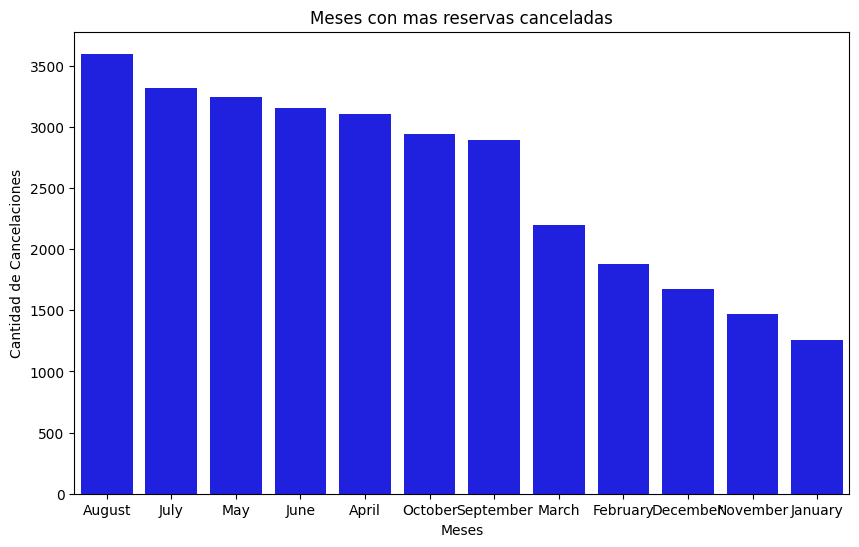

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cancelaciones_por_mes, x='arrival_date_month', y='is_canceled', color='blue')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Meses con mas reservas canceladas')

plt.show()

Por ultimo,analizemos que meses tienen mayor tasa de cancelacion,ya que odemos declinarnos a pensar que las reservas asociadas a los meses con mas cancelaciones tienden a cancelar mas;por lo cual ,veamos la tasa de cancelacion por mes

In [ ]:
tasa_cancelacion_por_mes = ds_hoteles_train_limpio.groupby("arrival_date_month")["is_canceled"].mean() * 100

tasa_cancelacion_por_mes = tasa_cancelacion_por_mes.reset_index()

tasa_cancelacion_por_mes = tasa_cancelacion_por_mes.sort_values(by="is_canceled", ascending=False)
tasa_cancelacion_por_mes

arrival_date_month  is_canceled
6                June    55.292674
8                 May    53.539020
0               April    53.449166
11          September    52.129195
5                July    51.618425
10            October    51.166841
1              August    50.797685
2            December    49.497636
3            February    46.322804
7               March    45.584577
9            November    44.174174
4             January    42.857143

In [ ]:
media_tasa_cancelacion_mes = tasa_cancelacion_por_mes["is_canceled"].mean()

print("La media de la tasa de cancelación entre todos los meses es:", media_tasa_cancelacion_mes)

La media de la tasa de cancelación entre todos los meses es: 49.702444953434984


Los con tasas de cancelación más altas(June,April..) tienden a tener una propensión mayor a cancelar reservas en comparación con los meses con tasas más bajas(January,November,...),por lo cual puede ser de gran importancia al momento de entrenar al modelo

La variable ArrivalDateMonth es crucial para evaluar cómo las cancelaciones están relacionadas con las estaciones del año. Por ejemplo, en ciertos meses, como durante las vacaciones de verano o las festividades, es más probable que se produzcan cancelaciones debido a cambios en los planes de viaje de los huéspedes. Comprender estas tendencias estacionales puede ser importante para que nuestro modelo pueda predecir ,en base al historial,si una reserva sera cancelada o no.



---
## Variable ArrivalDateWeekNumber


### Analisis y Visualizacion de datos
Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [ ]:
columna_arrival_date_week= ds_hoteles_train_limpio['arrival_date_week_number']

columna_arrival_date_week.describe()

count    60896.000000
mean        27.191655
std         13.497849
min          1.000000
25%         16.000000
50%         28.000000
75%         38.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

Veamos estos valores en un boxplot

Text(0.5, 1.0, 'Boxplot Arrival Date Week')

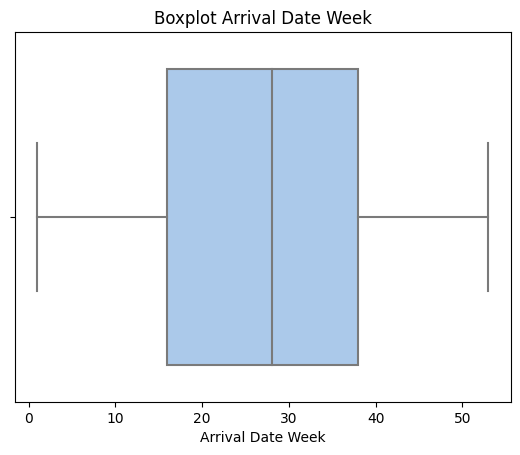

In [ ]:
sns.boxplot(x = columna_arrival_date_week, palette = "pastel")
plt.xlabel('Arrival Date Week')

plt.title("Boxplot Arrival Date Week")

La variable ArrivalDateMonth desempeña un papel importante en la predicción de cancelaciones e Este análisis a nivel semanal permite una visión más detallada de las tendencias de cancelación. Al utilizar esta variable, podemos identificar patrones específicos en ciertas semanas del año, lo que te permite anticipar mejor las cancelación.

Por ejemplo, podemos descubrir que las semanas con días festivos o eventos locales tienden a tener tasas de cancelación más altas debido a cambios en los planes de viaje de los huéspedes.



---
## Variable ArrivalDateYear



Comenzamos viendo los valores posibles que puede tomar

In [ ]:
columna_arrival_date_year = ds_hoteles_train_limpio['arrival_date_year']
columna_arrival_date_year.value_counts().reset_index()

index  arrival_date_year
0   2016              28883
1   2017              20808
2   2015              11205

Vemos que las reservas se han dado en 3 años contiguos.

### Analisis y Visualizacion de datos
Ya que no existe ningun valor faltante,veamos como las cancelaciones se distribuyen en los distintos años

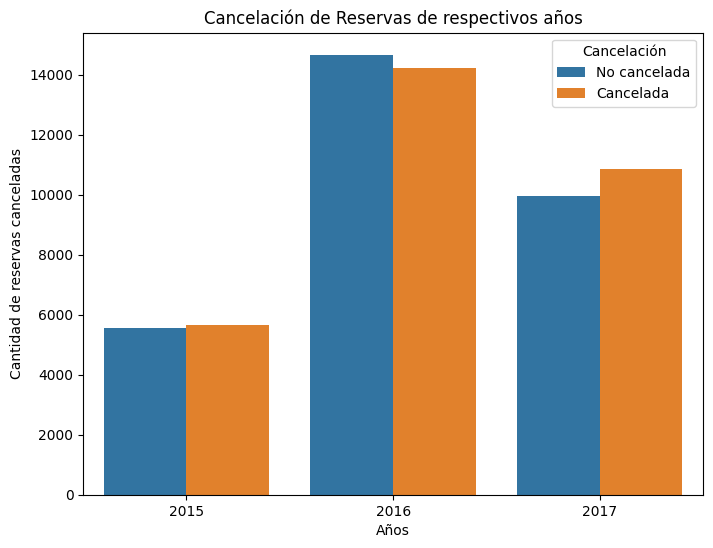

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='arrival_date_year' , hue= 'is_canceled')
plt.xlabel('Años')
plt.ylabel('Cantidad de reservas canceladas')
plt.title('Cancelación de Reservas de respectivos años')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

La variable ArrivalDateYear nos permite  evaluar cómo las cancelaciones están relacionadas con los distintos años, ya que es relevante para el modelo ,poder contar con informacion del año de la reserva para ver si cierto año tiene una intencion de tendencia de cancelar

# 10) Variable AssignedRoomType


Comenzamos por ver todos los valores posibles que puede tomar esta variable

In [ ]:
columna_room_type = ds_hoteles_train_limpio['assigned_room_type']

columna_room_type.value_counts().reset_index()

index  assigned_room_type
0      A               39582
1      D               12055
2      E                3723
3      F                1765
4      G                1234
5      C                1104
6      B                 932
7      H                 380
8      K                  60
9      I                  60
10     L                   1

Esta variable toma valores de caracteres.

## Analisis y Visualizacion de datos
Observemos en un gráfico cómo se distribuyen los valores que toma la variable.

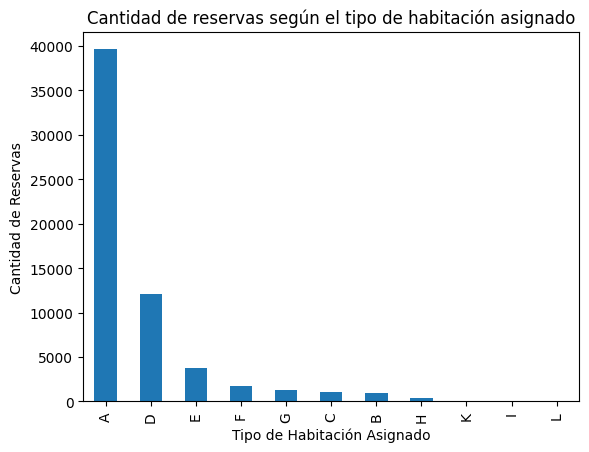

In [ ]:


room_type_graph = ds_hoteles_train_limpio['assigned_room_type'].value_counts()

# Crear el gráfico de barras
room_type_graph.plot(kind='bar', title='Cantidad de reservas según el tipo de habitación asignado')

# Agregar etiqueta al eje x (xlabel) y al eje y (ylabel)
plt.xlabel('Tipo de Habitación Asignado')
plt.ylabel('Cantidad de Reservas')

# Mostrar el gráfico
plt.show()


Vemos que por mucha diferencia el tipo de habitación A es el más frecuente para esta variable.

El tipo de habitación asignado es una variable importante, ya que nos permite identificar qué tipos de habitaciones registran más cancelaciones. Esto es fundamental para el análisis, ya que nos ayuda a determinar si asignar un tipo de habitación diferente al solicitado por el cliente influye en la probabilidad de cancelación.

# 11) Variable Booking Changes



Veamos los valores que toma esta variable

In [ ]:
columna_booking_changes = ds_hoteles_train_limpio['booking_changes']
columna_booking_changes.value_counts().reset_index()

index  booking_changes
0       0            52838
1       1             5644
2       2             1747
3       3              391
4       4              158
5       5               55
6       6               30
7       7               14
8       8                7
9      10                3
10     13                2
11      9                2
12     14                2
13     12                1
14     15                1
15     17                1

## Analisis y Visualizacion
Ahora,dado que es una variable cuantitativa, veremos las medidas de resumen, como la media, mediana, moda, etc..

In [ ]:
columna_booking_changes.describe()

count    60896.000000
mean         0.192098
std          0.599297
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

Veo que predominan las reservas que no tuvieron ningun cambio,pero veamos aquellas que si tuvieron


In [ ]:
ds_reservas_con_cambios = ds_hoteles_train_limpio.loc[columna_booking_changes > 0]
ds_reservas_con_cambios['booking_changes'].describe()

count    8058.000000
mean        1.451725
std         0.941092
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: booking_changes, dtype: float64

Lo visualizo en un bloxplot

Text(0.5, 0, 'Cantidad de booking changes')

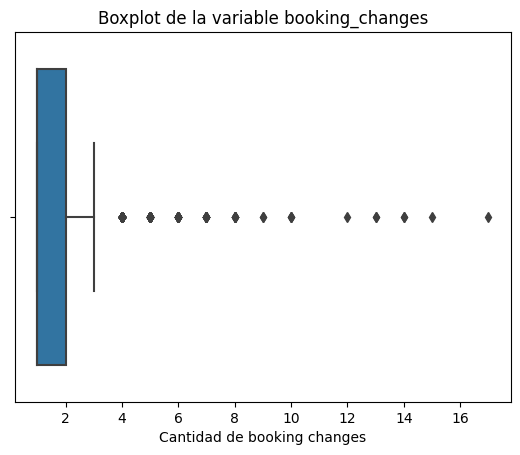

In [ ]:
sns.boxplot(x = ds_reservas_con_cambios['booking_changes'])

plt.title("Boxplot de la variable booking_changes")

plt.xlabel('Cantidad de booking changes')

Observamos que la mayoría de reservas tienen de 0 a 2 cambios en las mismas, mientras que tenemos algunas reservas con más de 3 cambios

Veamos la relacion con is_canceled

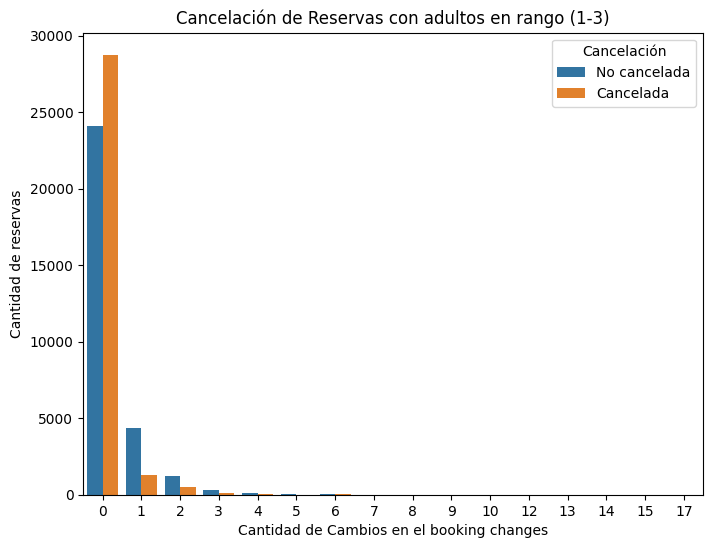

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cantidad de Cambios en el booking changes')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas con adultos en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()


Para poder comprender y visualizar mejor el grafico,vamos a separarlo en 3 grupos


*   Reservas sin cambios
*  Reservas que tienen entre 1 y 4 cambios
*   Reservas con mas de 4 cambios



---

Vamos a comenzar con las reservas sin cambios



In [ ]:
ds_reservas_sin_cambios = ds_hoteles_train_limpio.loc[columna_booking_changes == 0]
ds_reservas_sin_cambios['is_canceled'].value_counts()

1    28760
0    24078
Name: is_canceled, dtype: int64

Veamos en un gráfico la relación entre estas reservas csin cambios con la variable target is_canceled


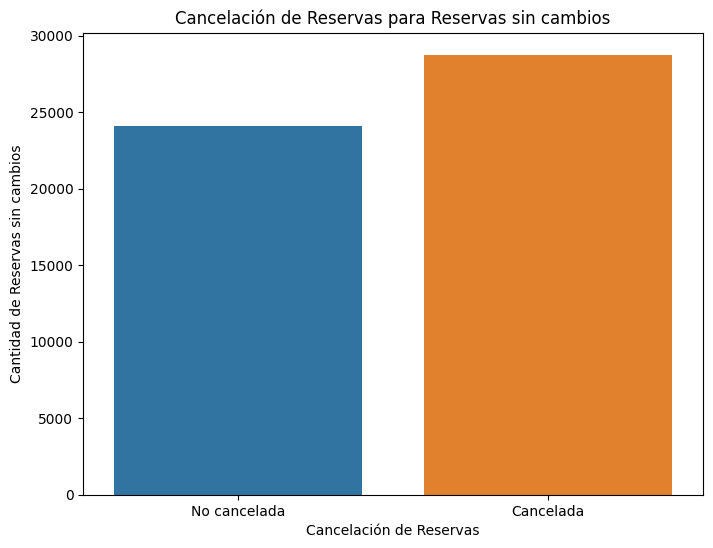

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_cambios, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin cambios')
plt.title('Cancelación de Reservas para Reservas sin cambios')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar como las cancelaciones son mas concurrentes ,por lo cual puede ser un indicio importante para el analisis


---

Veamos el siguiente grupo

In [ ]:
ds_reservas_con_1_a_3_cambios = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['booking_changes'] >= 1) & (ds_hoteles_train_limpio['booking_changes'] <= 3)]
ds_reservas_con_1_a_3_cambios['is_canceled'].value_counts()

0    5900
1    1882
Name: is_canceled, dtype: int64

Grafiquemos los valores

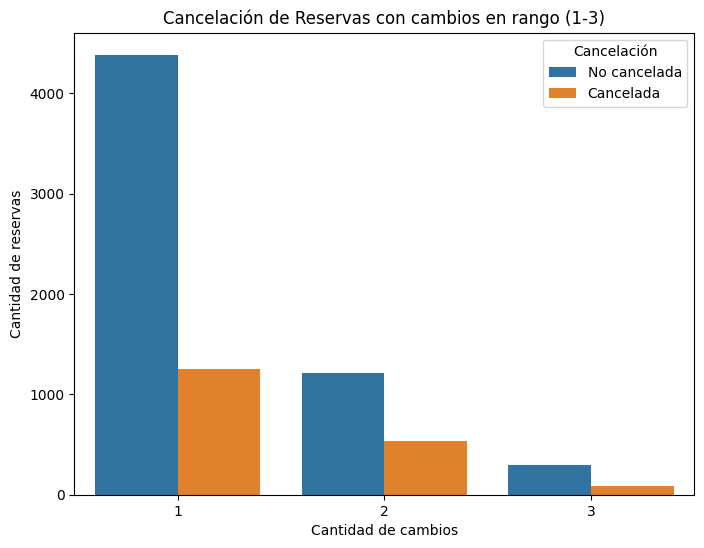

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_1_a_3_cambios, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cantidad de cambios')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas con cambios en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Podemos notar que predomina las reservas no canceladas,pero a medida que va bajando la cantidad de cambios,se acercan cada vez mas cerca,veamos el ultimo grupo

In [ ]:
ds_reservas_con_4_o_mas_cambios = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['booking_changes'] >= 4) ]

ds_reservas_con_4_o_mas_cambios['is_canceled'].value_counts()

0    190
1     86
Name: is_canceled, dtype: int64

Veamos en graficos para comprender la distribucion

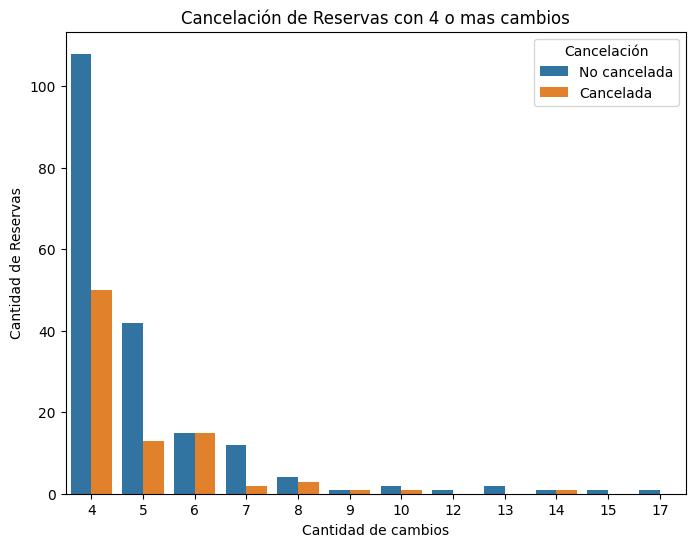

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_4_o_mas_cambios, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cantidad de cambios')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas con 4 o mas cambios')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Por último con este gráfico notamos que con cambios, las reservas suelen ser menos canceladas en la mayoría de sus casos, mientras que sin cambios, las cancelaciones son mayores

Como conclusión para nuestro análisis, tomamos como dato de que, a mayor cantidad de cambios en las reservas, menos probabilidad hay de que las mismas sean canceladas.

El número de cambios en una reserva(booking changes)es una variable clave, ya que nos permite identificar tendencias y patrones relacionados con las modificaciones en las reservas. Es importante para el análisis, ya que nos permite determinar si un alto número de cambios está vinculado a una mayor probabilidad de cancelación. Comprender esta relación puede ayudarnos a ajustar nuestro modelo y comprenden otras variables en un analisis multivariado

## Analisis de valores atipicos

Analicemos el boxplot

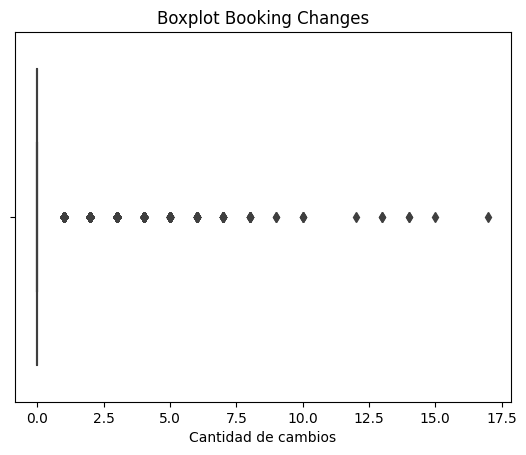

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["booking_changes"])

plt.title('Boxplot Booking Changes')
plt.xlabel('Cantidad de cambios')
plt.show()

Podemos notar que la mayorias de ellos son outliers ,pero veamos sin el caso del 0 como se comportan

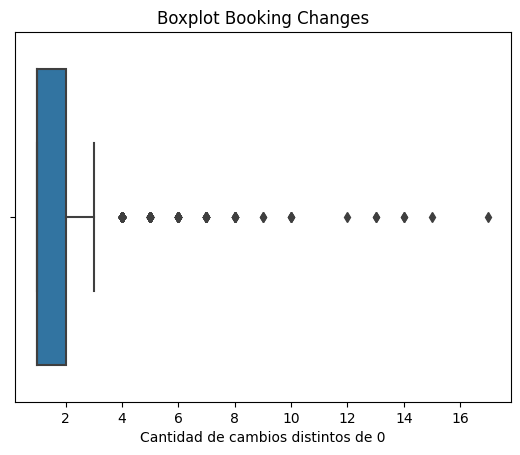

In [ ]:
ds_con_cambios = ds_hoteles_train_limpio[ds_hoteles_train_limpio["booking_changes"] != 0]
sns.boxplot(x=ds_con_cambios["booking_changes"])
plt.title('Boxplot Booking Changes')
plt.xlabel('Cantidad de cambios distintos de 0')
plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [ ]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["booking_changes"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["booking_changes"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers severos y moderados
lower_limit_severo = Q1 - 3 * IQR
upper_limit_severo = Q3 + 3 * IQR

lower_limit_moderado = Q1 - 1.5 * IQR
upper_limit_moderado = Q3 + 1.5 * IQR

# Identifica outliers severos y moderados
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["booking_changes"] < lower_limit_severo) | (ds_hoteles_train_limpio["booking_changes"] > upper_limit_severo)]

outliers_moderados = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["booking_changes"] < lower_limit_moderado) | (ds_hoteles_train_limpio["booking_changes"] > upper_limit_moderado)]



outliers_moderados



hotel  lead_time  arrival_date_year arrival_date_month  \
5        City Hotel          1               2015          September   
6      Resort Hotel        112               2015           November   
13       City Hotel         41               2016          September   
27       City Hotel        159               2016              April   
35     Resort Hotel        364               2016            October   
...             ...        ...                ...                ...   
61899    City Hotel        192               2016            October   
61903    City Hotel        140               2017               June   
61905    City Hotel         62               2016          September   
61907    City Hotel        296               2016          September   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
5                            38                         14   
6                            46                         12   
13                           38                         14   
27                           15                          9   
35                           42                         12   
...                         ...                        ...   
61899                        43                         21   
61903                        26                         28   
61905                        37                          4   
61907                        39                         21   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
5                            3                     5       1       0.0  ...   
6                            4                     9       2       0.0  ...   
13                           0                     3       1       0.0  ...   
27                           1                     1       1       0.0  ...   
35                           2                     6       1       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61899                        0                     2       3       0.0  ...   
61903                        0                     3       2       3.0  ...   
61905                        2                     2       2       0.0  ...   
61907                        0                     4       1       0.0  ...   
61912                        2                     5       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
5        No Deposit     -1      -1                    0        Transient   
6        No Deposit  314.0      -1                    0         Contract   
13       No Deposit   86.0      -1                    0  Transient-Party   
27       No Deposit    3.0      -1                    0  Transient-Party   
35       No Deposit     -1   223.0                    0  Transient-Party   
...             ...    ...     ...                  ...              ...   
61899    No Deposit   29.0      -1                    0  Transient-Party   
61903    No Deposit    9.0      -1                    0        Transient   
61905    No Deposit    9.0      -1                    0        Transient   
61907    No Deposit   26.0      -1                    0  Transient-Party   
61912    No Deposit    9.0      -1                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
5      133.00                            0                          0   
6       66.42                            0                          1   
13     108.00                            0                          0   
27      65.00                            0                          0   
35      60.00                            0                          0   
...       ...                          ...                        ...   
61899  123.00                  

8059 valores son atipicos,pero graficamente se puede notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [ ]:
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["booking_changes"] > 10) ]

outliers_severos

hotel  lead_time  arrival_date_year arrival_date_month  \
1369     City Hotel        159               2016                May   
15575  Resort Hotel        101               2016              April   
24041    City Hotel        159               2016                May   
26022    City Hotel        159               2016                May   
40825  Resort Hotel        101               2016              April   
46642    City Hotel        159               2016                May   
51870    City Hotel        329               2017                May   

       arrival_date_week_number  arrival_date_day_of_month  \
1369                         22                         26   
15575                        18                         29   
24041                        22                         26   
26022                        22                         26   
40825                        18                         29   
46642                        22                         26   
51870                        19                         10   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
1369                         0                     3       1       0.0  ...   
15575                        2                     5       2       0.0  ...   
24041                        0                     3       1       0.0  ...   
26022                        0                     3       2       1.0  ...   
40825                        2                     3       2       0.0  ...   
46642                        0                     3       2       1.0  ...   
51870                        0                     4       2       0.0  ...   

       deposit_type agent company days_in_waiting_list    customer_type  \
1369     No Deposit   9.0      -1                    0        Transient   
15575    No Deposit  95.0      -1                    0  Transient-Party   
24041    No Deposit   9.0      -1                    0  Transient-Party   
26022    No Deposit   9.0      -1                    0        Transient   
40825    No Deposit  95.0      -1                    0  Transient-Party   
46642    No Deposit   9.0      -1                    0        Transient   
51870    No Deposit   9.0      -1                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
1369   119.85                            0                          1   
15575   75.00                            0                          0   
24041  187.85                            0                          0   
26022  119.85                            0                          1   
40825   75.00                            0                          1   
46642  119.85                            0                          1   
51870  104.40                            0                          2   

      is_canceled Estado de la reserva  
1369            0         No Cancelada  
15575           0         No Cancelada  
24041           1            Cancelada  
26022           0         No Cancelada  
40825           0         No Cancelada  
46642           0         No Cancelada  
51870           0         No Cancelada  

[7 rows x 31 columns]

In [ ]:
outliers_severos['Estado de la reserva'].value_counts()

No Cancelada    6
Cancelada       1
Name: Estado de la reserva, dtype: int64

Podemos notar como este conjunto de datos puede ser de util para predecir el modelo ,ya que a mayor cantidad de cambios,pareciera que tienden a no cancelar la reserva.



---


Dado que ya visualizamos de manera univariada,veamos su relacion con otra vaariable para notar si existen valores atipicos,y poder evaluarlos,para ello utilizaremos la distancia de Mahalanobis
En este caso vamos a ver como se relaciona con total_of_special_requests.
Notemos en un grafico como se distribuyen


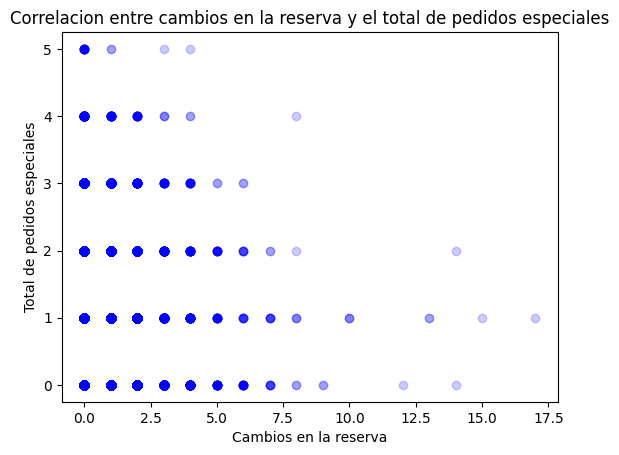

In [ ]:
plt.scatter(ds_hoteles_train_limpio['booking_changes'],ds_hoteles_train_limpio['total_of_special_requests'], color='blue', alpha=0.2)
plt.xlabel('Cambios en la reserva')
plt.ylabel('Total de pedidos especiales')
plt.title('Correlacion entre cambios en la reserva y el total de pedidos especiales')
plt.show()

Podemos notar que no existen muchos valores fuera de la media.

No obstante, para comprender mejor la importancia de estos valores , vamos a analizar un ejemplo específico calculando su distancia de Mahalanobis:

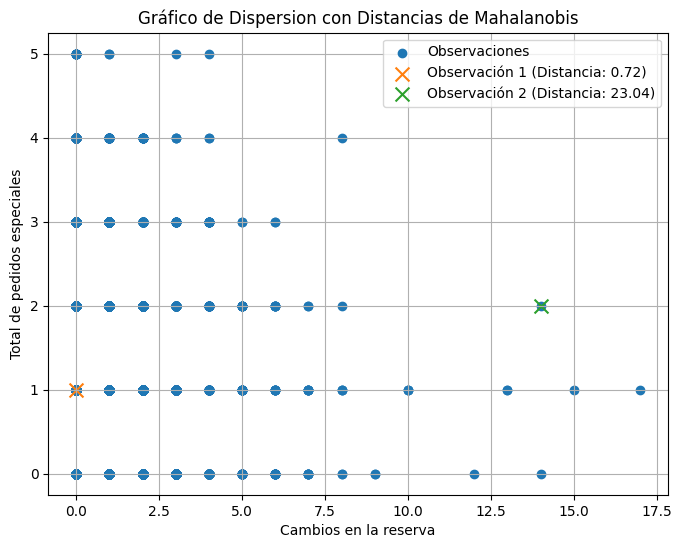

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

variables = ds_hoteles_train_limpio[['booking_changes', 'total_of_special_requests']].values

#Defino puntos que observe en el grafico para poder luego utilizarlos
puntos_observacion = [np.array([0, 1]), np.array([14, 2])]


matriz_covarianza = np.cov(variables, rowvar=False)


inversa_matriz_covarianza = np.linalg.inv(matriz_covarianza)


plt.figure(figsize=(8, 6))
plt.scatter(variables[:, 0], variables[:, 1], label='Observaciones')

# Agregar los puntos de observación al gráfico y calcular las distancias de Mahalanobis para cada uno.
for i, punto in enumerate(puntos_observacion):
    diferencia = punto - np.mean(variables, axis=0)
    mahalanobis_distance = np.sqrt(np.dot(np.dot(diferencia, inversa_matriz_covarianza), diferencia))
    plt.scatter(punto[0], punto[1], label=f'Observación {i + 1} (Distancia: {mahalanobis_distance:.2f})', marker='x', s=100)


plt.xlabel('Cambios en la reserva')
plt.ylabel('Total de pedidos especiales')
plt.legend()


plt.grid(True)
plt.title('Gráfico de Dispersion con Distancias de Mahalanobis')
plt.show()

Podemos notar que uno de los puntos seleccionados, el naranja, tiene un valor de distancia cercano a 0, lo que indica que está muy cerca de la media de las observaciones en términos de 'booking_changes' y 'total_special_request'. Por otro lado, el otro punto, el verde, se encuentra más alejado de la media.

Es importante destacar que ambos valores son válidos y significativos para nuestro análisis. El punto naranja, a pesar de estar cerca de la media, puede proporcionar información valiosa sobre cómo se comportan las observaciones típicas en relación con estas dos variables. En contraste, el punto verde, al estar más alejado, podría representar un escenario interesante o poco común que merece un análisis más detenido.

En definitiva, estos valores, aunque diferentes en términos de distancia de Mahalanobis, son válidos y pueden ser de gran utilidad para mejorar futuros modelos o para obtener información valiosa sobre los datos.









---

# 12) Variable company

Esta variable contiene el ID de la empresa responsable del booking de las reservas. En nuestro análisis del dataset en general, esta columna era la que más datos faltantes tenía, por lo que por ahora es una buena candidata a ser analizada para nuestro análisis.

## Analisis y visualizacionde de datos
Como los valores que toma esta variable son IDs, termina siendo una variable categórica, por lo que vamos a ver qué ID son los más repetidos(es decir, qué empresas se hacen responsables de la mayor cantidad de reservas).

In [ ]:

ds_reservas_con_company = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['company'] != '-1']

ds_reservas_con_company['company'].value_counts()

40.0     390
223.0    356
67.0     169
153.0    102
174.0     72
        ... 
425.0      1
258.0      1
84.0       1
373.0      1
160.0      1
Name: company, Length: 267, dtype: int64

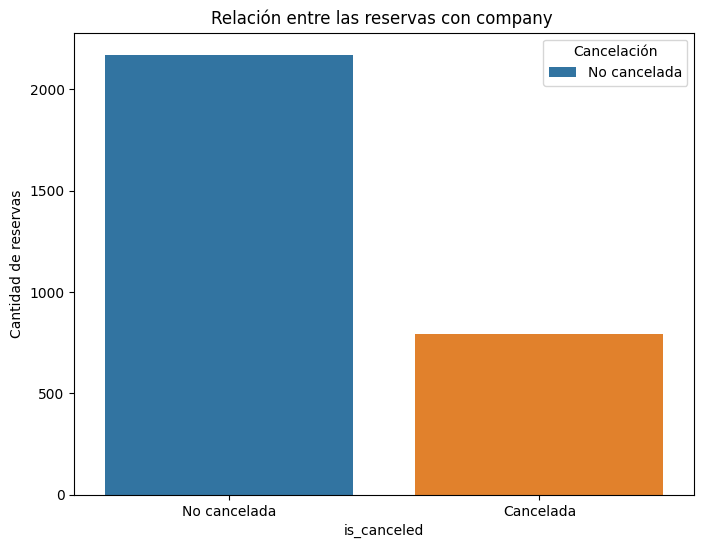

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_company, x='is_canceled')
plt.ylabel('Cantidad de reservas')
plt.title('Relación entre las reservas con company ')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que la gran mayoría de reservas que tuvieron una compañía responsable del booking no fueron canceladas; igualmente, debemos tener en cuenta de que un buen porcentaje de ellas(casi un 25%), fueron efectivamente canceladas.

La inclusión de la variable "company" en nuestro análisis es igualmente esencial, ya que nos permite evaluar el comportamiento de diferentes empresas en relación con las cancelaciones de reservas. Al analizar esta variable, podemos identificar qué empresas tienden a generar más cancelaciones y cuáles tienen un historial de reservas más estable.

# 13) Variable country
Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia al país de origen de la reserva.

## Analisis y visualizacion de datos
Vamos a ver en un gráfico los 10 países con mayores cantidades de reservas

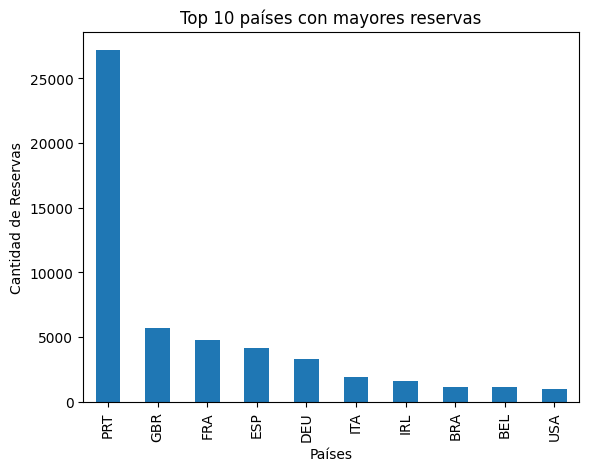

In [ ]:
top_10_countries = (ds_hoteles_train_limpio['country'].value_counts()).iloc[:10]

top_10_countries.plot(kind='bar', title='Top 10 países con mayores reservas')


plt.xlabel('Países')
plt.ylabel('Cantidad de Reservas')


plt.show()

Observamos que PRT(Portugal según la regla usada) es el país con mayor cantidad de reservas.

La inclusión de la variable "country" (país de origen) en nuestro análisis es relevante para comprender cómo la procedencia de los huéspedes puede influir en las tasas de cancelación. Al analizar esta variable, podemos identificar patrones relacionados con los países de origen y su propensión a cancelar reservas.
Por otro lado,es importante para poder ver de forma multivaridada su relacion con otras variables.

# 14) Variable CustomerType

## Analisis y visualizacion de datos


Veamos los valores que toma esta variable en el dataset actualizado

In [ ]:
ds_hoteles_train_limpio['customer_type'].value_counts()

Transient          46704
Transient-Party    11927
Contract            2023
Group                242
Name: customer_type, dtype: int64

Veamos la distribucion de estos valores en un gráfico de torta

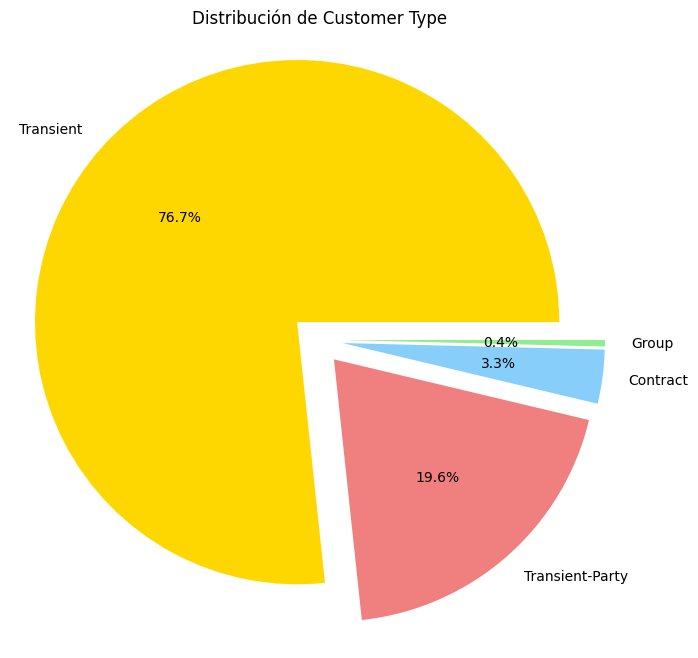

In [ ]:
customer_type_counts = ds_hoteles_train_limpio['customer_type'].value_counts()

# Configuración para hacer que el gráfico de torta sea más legible
explode = (0.1, 0.1, 0.1, 0.1)  # Separación de las porciones
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colores
# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('Distribución de Customer Type')
plt.axis('equal')  # Hace que el gráfico de torta sea circular
plt.show()

Teniendo en cuenta la distribución de la variable, vamos a ver cómo se relaciona esta variable con la variable target(is_canceled)

Sabiendo que el valor 'transient' es el más recurrente en el dataset, vamos a ver con qué frecuencia las reservas con este valor en customer_type son canceladas o no

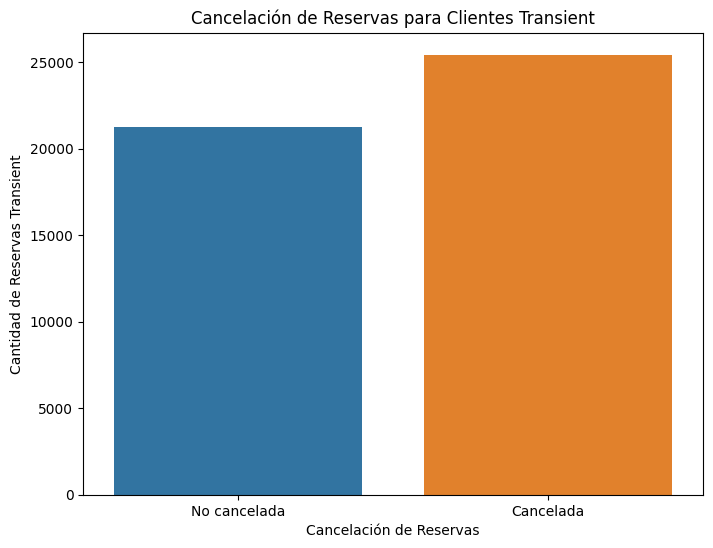

In [ ]:
transient_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Transient']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient')
plt.title('Cancelación de Reservas para Clientes Transient')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Apaentemente los clientes Transient que cancelaron son mayores que los que no cancelaron.


Hacemos lo mismo con las reservas que tienen valor 'transient_party' en customer_type

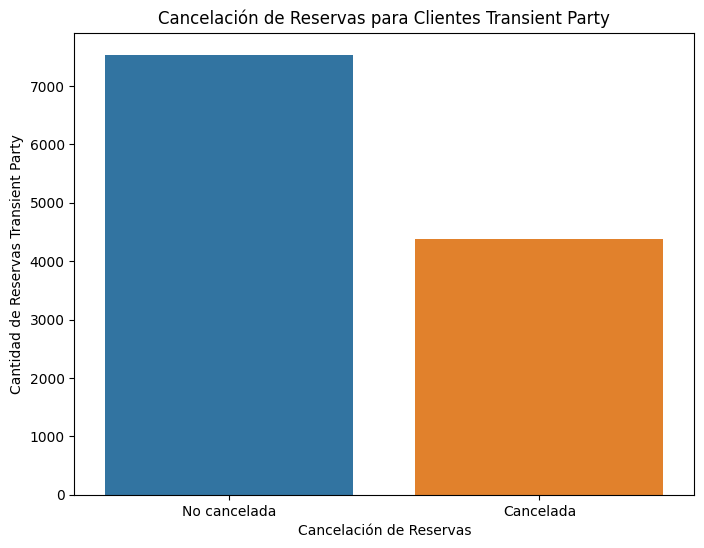

In [ ]:
transient_party_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Transient-Party']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_party_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient Party')
plt.title('Cancelación de Reservas para Clientes Transient Party')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que las reservas con clientes Transient Party suelen cancelarse con menor frecuencia.


Repetimos para el valor 'contract'

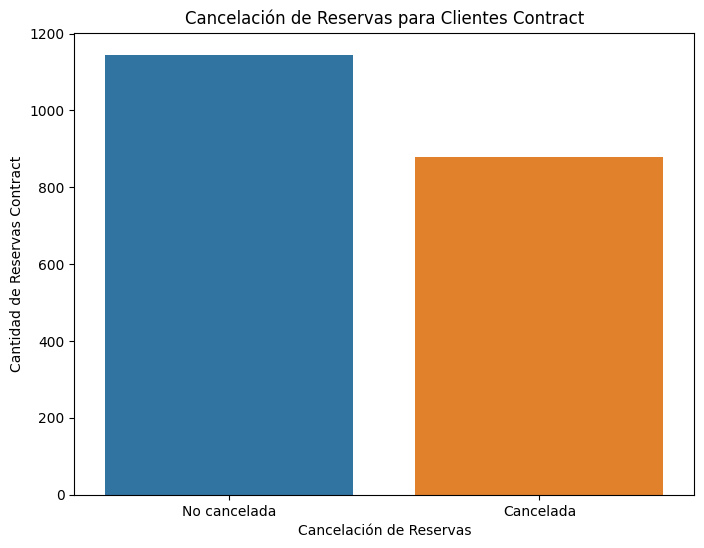

In [ ]:
contract_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Contract']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=contract_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Contract')
plt.title('Cancelación de Reservas para Clientes Contract')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Por último, vemos la relación cuando esta variable toma el valor 'group'


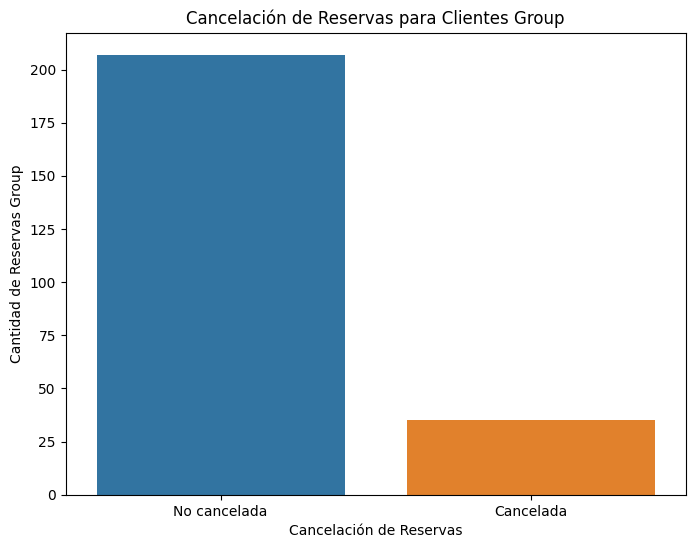

In [ ]:
group_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Group']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=group_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Group')
plt.title('Cancelación de Reservas para Clientes Group')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que las reservas con clientes Group suelen cancelarse con menor frecuencia.

Juntamos los 4 graficos

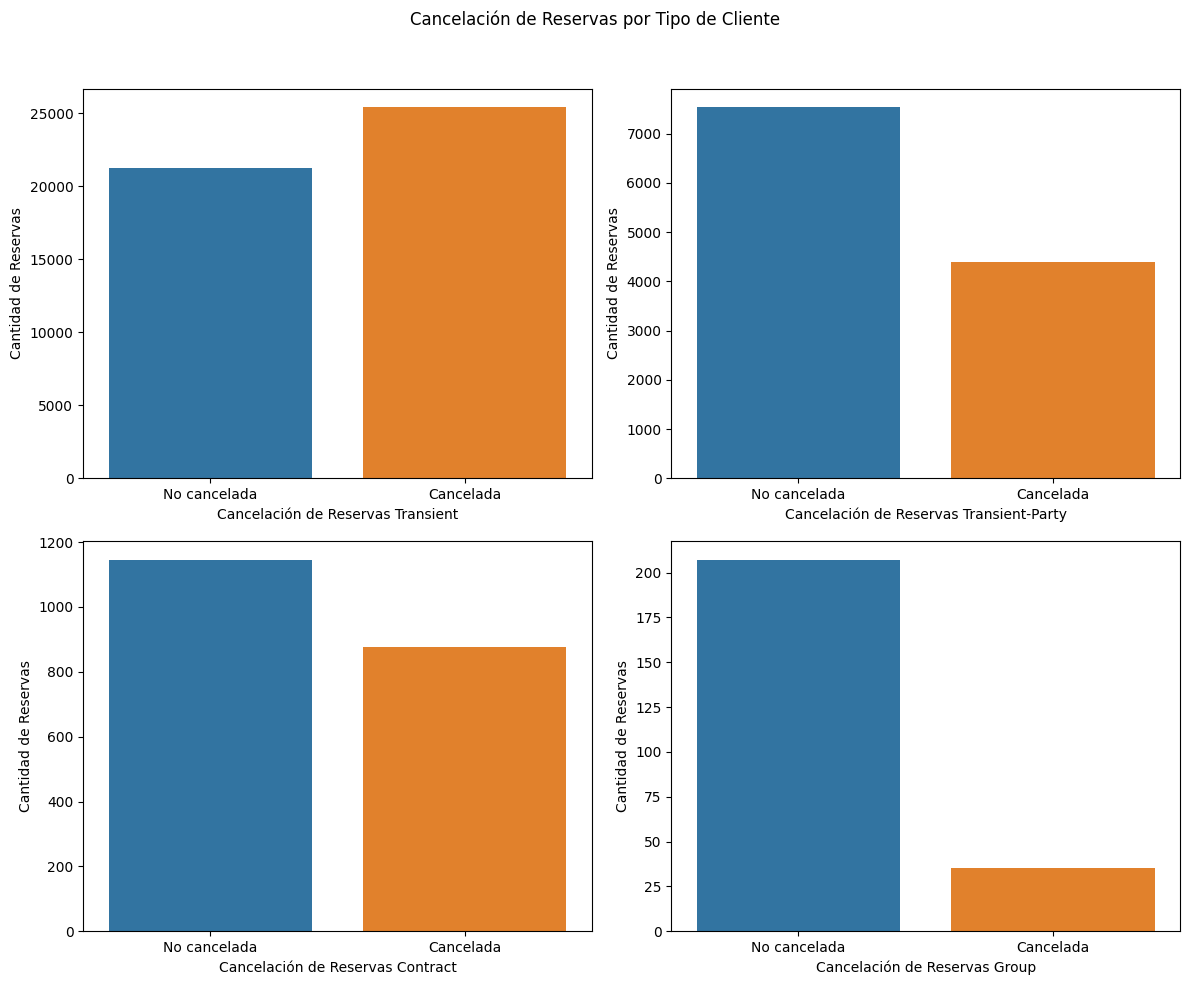

In [ ]:
# Crear un conjunto de subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Cancelación de Reservas por Tipo de Cliente')

# Crear gráficos de barras para cada tipo de cliente en su respectivo subgráfico
sns.countplot(data=transient_df, x='is_canceled', ax=axes[0, 0])
axes[0, 0].set_xlabel('Cancelación de Reservas Transient')
axes[0, 0].set_ylabel('Cantidad de Reservas')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=transient_party_df, x='is_canceled', ax=axes[0, 1])
axes[0, 1].set_xlabel('Cancelación de Reservas Transient-Party')
axes[0, 1].set_ylabel('Cantidad de Reservas')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=contract_df, x='is_canceled', ax=axes[1, 0])
axes[1, 0].set_xlabel('Cancelación de Reservas Contract')
axes[1, 0].set_ylabel('Cantidad de Reservas')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=group_df, x='is_canceled', ax=axes[1, 1])
axes[1, 1].set_xlabel('Cancelación de Reservas Group')
axes[1, 1].set_ylabel('Cantidad de Reservas')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No cancelada', 'Cancelada'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Como conclusión final, vemos que las reservas con customer_type del tipo 'transient'(es el valor que en más reservas se repite) suelen cancelarse con mayor frecuencia; para las reservas con 'transient party', 'contract' y 'group' tenemos más reservas NO canceladas. Esta variable va a ser interesante para nosotros a la hora de hacer nuestros modelos de predicción.

La inclusión de la variable "customer type" en nuestro análisis es muy importante, ya que nos proporciona información valiosa sobre los distintos perfiles de clientes y cómo se comportan en relación con las cancelaciones. Esta variable nos permite analizar la estabilidad de los diferentes tipos de clientes, identificar patrones de cancelación específicos para cada categoría y ayuda a tener un modelo de prediccion mas estable.

# 15) Variable DaysInWaitingList


## Analisis y visualizacion de datos


Veamos los valores que toma la variable en el dataset actualizado

In [ ]:
columna_daysinwaitinglist = ds_hoteles_train_limpio['days_in_waiting_list']

columna_daysinwaitinglist.value_counts()

0      58676
39       155
31        90
44        83
58        82
       ...  
81         1
175        1
121        1
97         1
105        1
Name: days_in_waiting_list, Length: 116, dtype: int64

Como conclusión inicial, vemos que la gran mayoría de reservas(59678 exactamente) tuvieron 0 días de espera antes de ser confirmadas. Esto nos ayuda para pensar lo siguiente: tendríamos que centrar nuestro análisis para aquellas reservas en los que tuvieron a partir de un día de espera, y ver qué ocurrió con ellas(si fueron canceladas o no).

Comenzamos analizando el grupo de las reservas con 0 días de espera antes de confirmarse las mismas.

In [ ]:
ds_reservas_con_0_dias_de_espera = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['days_in_waiting_list'] == 0) ]

ds_reservas_con_0_dias_de_espera['is_canceled'].value_counts()

0    29584
1    29092
Name: is_canceled, dtype: int64

Mostramos en un gráfico la relación entre las reservas con 0 días de espera y la variable target

([<matplotlib.axis.XTick at 0x796e9222d990>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

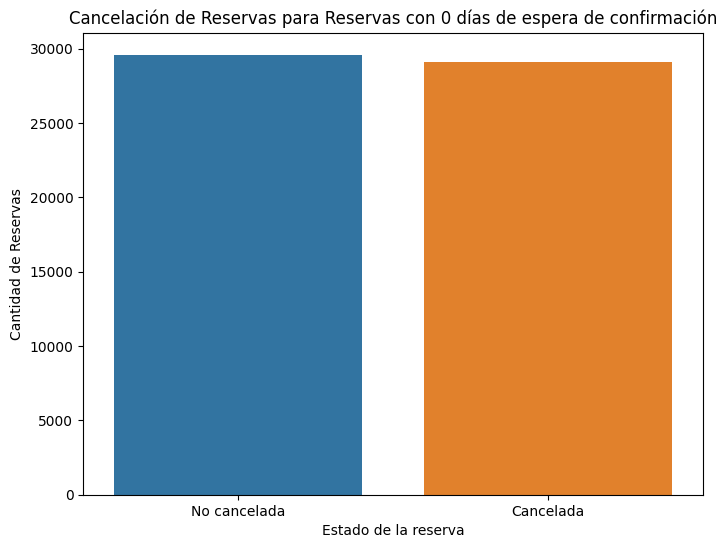

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_0_dias_de_espera, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con 0 días de espera de confirmación')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Observamos que para este valor, está pareja la cantidad de reservas que fueron canceladas con las que no(más reservas NO fueron canceladas).

Veamos ahora qué ocurre con las reservas que tuvieron a partir de un día de espera para su confirmación.


In [ ]:
ds_days_in_waiting_list = ds_hoteles_train_limpio.loc[columna_daysinwaitinglist > 1]

ds_days_in_waiting_list.shape

(2214, 31)

Existen 2214 reservas que al menos tuvieron un dia dentro de la lista de espera, veamos sus medidas de resumen

In [ ]:
ds_days_in_waiting_list['days_in_waiting_list'].describe()

count    2214.000000
mean       73.229901
std        66.835122
min         2.000000
25%        38.000000
50%        50.000000
75%        91.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64

Observemos estas medidas en un boxplot

Text(0.5, 0, 'Cantidad de dias en lista de espera')

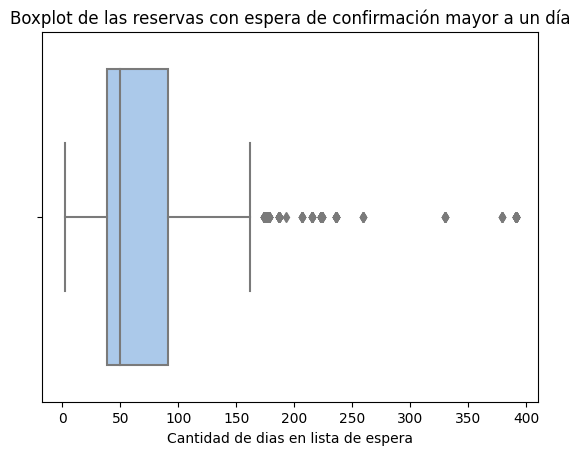

In [ ]:
sns.boxplot(x = ds_days_in_waiting_list['days_in_waiting_list'], palette = "pastel")
plt.title('Boxplot de las reservas con espera de confirmación mayor a un día')
plt.xlabel('Cantidad de dias en lista de espera')

Observamos que estas reservas se mantienen en un rango de desde 40 a 90 días de espera aproximadamente, mientras que hubieron reservas con más de 150 días de espera, nos interesa saber qué pasó con esas reservas.

Comenzamos viendo con las reservas con esperas desde 1 a 90 días para su confirmación

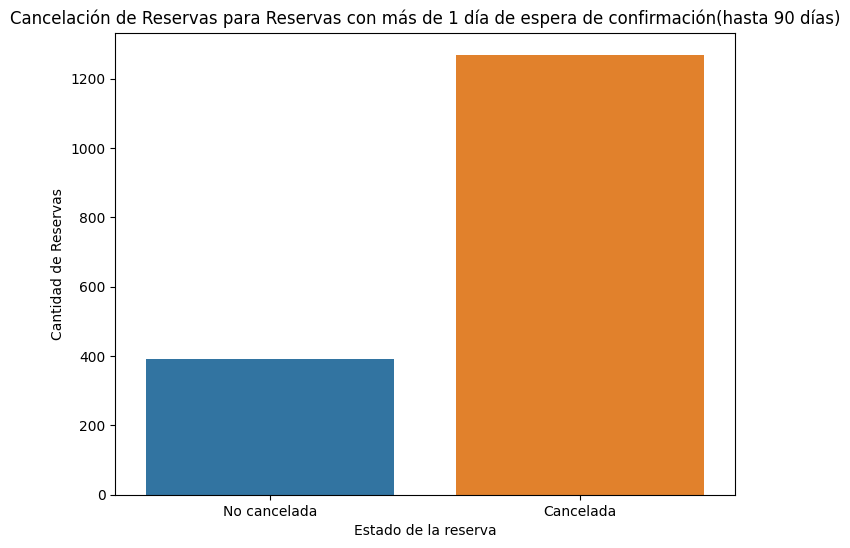

In [ ]:
ds_days_in_waiting_list_media = ds_hoteles_train_limpio.loc[(columna_daysinwaitinglist >= 1) & (columna_daysinwaitinglist < 90)]
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list_media, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con más de 1 día de espera de confirmación(hasta 90 días)')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.show()

Observamos que la gran mayoría de reservas con más de 1 día(hasta 90 días) de espera para confirmar la reserva terminaron siendo canceladas. Entonces el tiempo de espera de confirmación parece ser un factor muy importante a la hora de ver el estado final de la reserva.

Veamos ahora con las reservas que tuvieron más de 90 días de espera para su confirmación

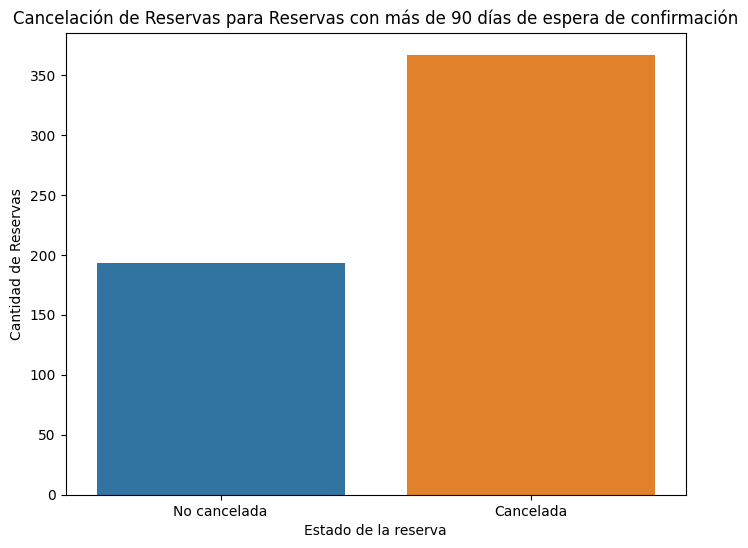

In [ ]:
ds_days_in_waiting_list_media = ds_hoteles_train_limpio.loc[columna_daysinwaitinglist >= 90]
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list_media, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con más de 90 días de espera de confirmación')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.show()

Observamos(como era de esperarse), que casi el doble de las reservas que tuvieron más de 90 días de espera para su confirmación fueron canceladas.

Como conclusión para esta variable, decimos que es muy importante para el análisis, porque a mayor cantidad de días de espera para confirmarse, las reservas tienden más a terminar siendo canceladas.

La inclusión de la variable "days in waiting list" (días en lista de espera) en nuestro análisis es relevante, ya que nos permite evaluar el impacto de la duración de una reserva en lista de espera en las cancelaciones. Al analizar esta variable, podemos identificar si un mayor número de días en lista de espera está relacionado con una mayor probabilidad de cancelación.
Tambien podemos ver como se comporta con otras variables,que pueden darnos mucha informacion importante para nuestro analisis.

## Analisis de valores atipicos

Analicemos el boxplot

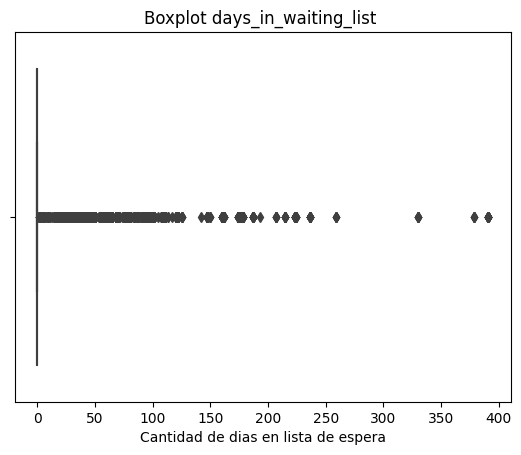

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["days_in_waiting_list"])

plt.title('Boxplot days_in_waiting_list ')
plt.xlabel('Cantidad de dias en lista de espera')
plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [ ]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["days_in_waiting_list"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["days_in_waiting_list"], 75)


# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers severos y moderados
lower_limit_severo = Q1 - 3 * IQR
upper_limit_severo = Q3 + 3 * IQR

lower_limit_moderado = Q1 - 1.5 * IQR
upper_limit_moderado = Q3 + 1.5 * IQR

# Identifica outliers severos y moderados
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["days_in_waiting_list"] > 120)]

outliers_moderados = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["days_in_waiting_list"] < lower_limit_moderado) | (ds_hoteles_train_limpio["days_in_waiting_list"] > upper_limit_moderado)]



outliers_moderados


hotel  lead_time  arrival_date_year arrival_date_month  \
11     City Hotel        349               2016            October   
16     City Hotel        333               2016          September   
41     City Hotel        192               2016                May   
52     City Hotel        134               2015           December   
76     City Hotel        251               2016              March   
...           ...        ...                ...                ...   
61793  City Hotel         81               2016              March   
61797  City Hotel        288               2016                May   
61800  City Hotel        192               2017               June   
61805  City Hotel        276               2016          September   
61812  City Hotel         69               2015          September   

       arrival_date_week_number  arrival_date_day_of_month  \
11                           41                          4   
16                           39                         20   
41                           20                         12   
52                           49                          4   
76                           13                         22   
...                         ...                        ...   
61793                        13                         25   
61797                        19                          5   
61800                        23                          8   
61805                        39                         22   
61812                        39                         22   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
11                           1                     5       1       0.0  ...   
16                           0                     2       2       0.0  ...   
41                           0                     3       2       0.0  ...   
52                           2                     2       2       0.0  ...   
76                           0                     3       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61793                        1                     2       2       0.0  ...   
61797                        0                     3       2       0.0  ...   
61800                        0                     2       2       0.0  ...   
61805                        0                     3       2       0.0  ...   
61812                        0                     2       2       0.0  ...   

       deposit_type agent company days_in_waiting_list    customer_type  \
11       No Deposit  58.0      -1                  162  Transient-Party   
16       Non Refund  58.0      -1                   19        Transient   
41       Non Refund  39.0      -1                   42        Transient   
52       Non Refund   3.0      -1                   91        Transient   
76       Non Refund  29.0      -1                   93        Transient   
...             ...   ...     ...                  ...              ...   
61793    No Deposit   3.0      -1                    4  Transient-Party   
61797    No Deposit   1.0      -1                  259  Transient-Party   
61800    Non Refund  58.0      -1                   11        Transient   
61805    No Deposit   6.0      -1                  178  Transient-Party   
61812    No Deposit   3.0      -1                   65  Transient-Party   

         adr  required_car_parking_spaces  total_of_special_requests  \
11      80.0                            0                          0   
16      90.0                            0                          0   
41     135.0                            0                          0   
52      65.0                            0                          0   
76     125.0                            0                          0   
...      ...                          ...                        ...   
61793   65.0                            0                          0   


2220 valores son atipicos,pero graficamente se puede notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [ ]:
outliers_severos

hotel  lead_time  arrival_date_year arrival_date_month  \
11     City Hotel        349               2016            October   
471    City Hotel        276               2016                May   
518    City Hotel        443               2016            October   
1237   City Hotel        418               2016          September   
1576   City Hotel        276               2016          September   
...           ...        ...                ...                ...   
61485  City Hotel        276               2016                May   
61536  City Hotel        276               2016          September   
61633  City Hotel        349               2016            October   
61797  City Hotel        288               2016                May   
61805  City Hotel        276               2016          September   

       arrival_date_week_number  arrival_date_day_of_month  \
11                           41                          4   
471                          20                         13   
518                          41                          7   
1237                         40                         26   
1576                         39                         22   
...                         ...                        ...   
61485                        20                         13   
61536                        39                         22   
61633                        41                          4   
61797                        19                          5   
61805                        39                         22   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
11                           1                     5       1       0.0  ...   
471                          2                     3       2       0.0  ...   
518                          0                     2       2       0.0  ...   
1237                         1                     2       2       0.0  ...   
1576                         0                     3       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61485                        2                     3       2       0.0  ...   
61536                        0                     3       2       0.0  ...   
61633                        1                     5       2       0.0  ...   
61797                        0                     3       2       0.0  ...   
61805                        0                     3       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
11       No Deposit   58.0      -1                  162  Transient-Party   
471      Non Refund   21.0      -1                  160        Transient   
518      Non Refund    1.0      -1                  391        Transient   
1237     No Deposit  132.0      -1                  223  Transient-Party   
1576     No Deposit    6.0      -1                  178  Transient-Party   
...             ...    ...     ...                  ...              ...   
61485    Non Refund   21.0      -1                  160        Transient   
61536    No Deposit    6.0      -1                  178  Transient-Party   
61633    No Deposit   58.0      -1                  162  Transient-Party   
61797    No Deposit    1.0      -1                  259  Transient-Party   
61805    No Deposit    6.0      -1                  178  Transient-Party   

          adr  required_car_parking_spaces  total_of_special_requests  \
11      80.00                            0                          0   
471     61.00                            0                          0   
518     65.00                            0                          0   
1237   107.00                            0                          0   
1576   116.33                            0                          0   
...       ...                          ...                        ...   
61485   61.00                            0           

In [ ]:
outliers_severos['Estado de la reserva'].value_counts()

Cancelada       157
No Cancelada    141
Name: Estado de la reserva, dtype: int64

Con respecto a los valores atipicos encontrados,podemos notar que ,en los severos, no se encuentra una relacion muy grande entre la distribucion de la cancelacion.Dentro de los valores y el contexto del problema,estos valores pueden ser posibles y se encuentran en gran cantidad distribuidos en el conjunto de datos,vamos a dejarlos en el conjunto de datos



---


Dado que ya visualizamos de manera univariada,veamos su relacion con otra vaariable para notar si existen valores atipicos,y poder evaluarlos,para ello utilizaremos la distancia de Mahalanobis
En este caso vamos a ver como se relaciona con booking changes

Veamos como se distribuyen para notar puntos de interes de analisis:

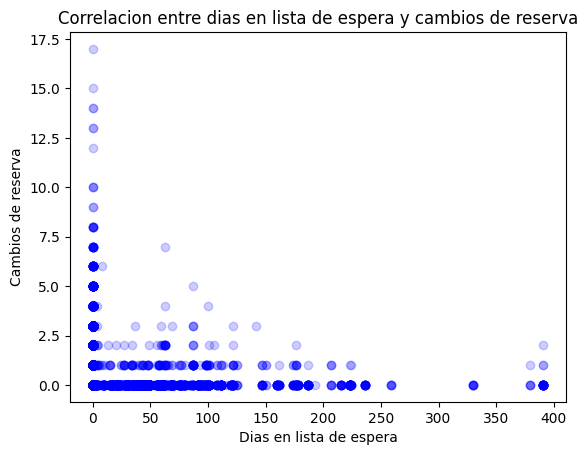

In [ ]:
plt.scatter(ds_hoteles_train_limpio['days_in_waiting_list'], ds_hoteles_train_limpio['booking_changes'], color='blue', alpha=0.2)
plt.xlabel('Dias en lista de espera')
plt.ylabel('Cambios de reserva')
plt.title('Correlacion entre dias en lista de espera y cambios de reserva')
plt.show()

Podemos notar como ciertos valores estan muy alejados de la media.
En principio los valores que se visualizan son todos validos,ya que no presentan valores negativos(imposible en dominio del trabajo) y,aunque algunos sean exagerados,notamos que son posibles.
Aun asi vamos a ver algun ejemplo para obtener su distancia de Mahalanobis:


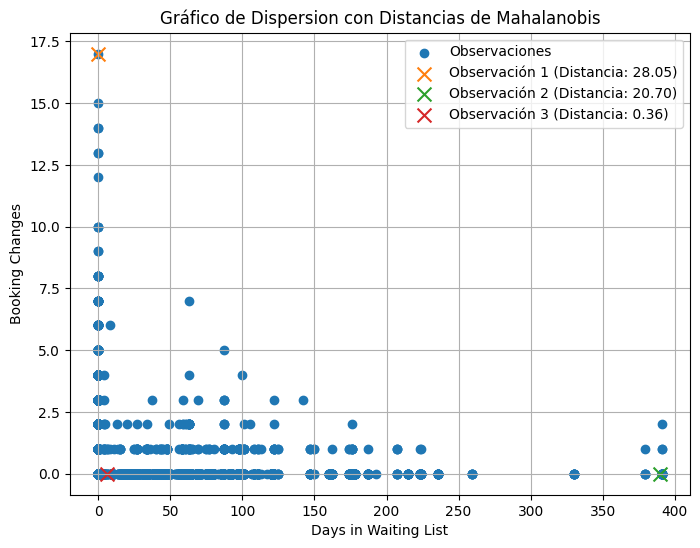

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


variables = ds_hoteles_train_limpio[['days_in_waiting_list', 'booking_changes']].values

#Defino puntos que observe en el grafico para poder luego utilizarlos
puntos_observacion = [np.array([0, 17]), np.array([390, 0]), np.array([6, 0])]


matriz_covarianza = np.cov(variables, rowvar=False)


inversa_matriz_covarianza = np.linalg.inv(matriz_covarianza)


plt.figure(figsize=(8, 6))
plt.scatter(variables[:, 0], variables[:, 1], label='Observaciones')

# Agregar los puntos de observación al gráfico y calcular las distancias de Mahalanobis para cada uno.
for i, punto in enumerate(puntos_observacion):
    diferencia = punto - np.mean(variables, axis=0)
    mahalanobis_distance = np.sqrt(np.dot(np.dot(diferencia, inversa_matriz_covarianza), diferencia))
    plt.scatter(punto[0], punto[1], label=f'Observación {i + 1} (Distancia: {mahalanobis_distance:.2f})', marker='x', s=100)


plt.xlabel('Days in Waiting List')
plt.ylabel('Booking Changes')
plt.legend()


plt.grid(True)
plt.title('Gráfico de Dispersion con Distancias de Mahalanobis')
plt.show()

Entonces, lo que estamos viendo en el gráfico es que esos puntos verdes y naranjas están un poco alejados del grupo principal de puntos. Esto significa que son un tanto diferentes en términos de cuánto tiempo ha estado en lista de espera y cuántos cambios he realizado en mis reservas en comparación con la mayoría de las otras personas.

Ahora, noto que esos valores de distancia de Mahalanobis son bastante grandes.Por ejemplo, ese punto naranja tiene un valor de distancia de más de 20. Esto me dice que es realmente inusual en relación con los otros puntos.

Sin embargo, eso no significa necesariamente que estos datos sean incorrectos o que deba eliminarlos. A veces, hay casos extremos que son legítimos y simplemente representan situaciones poco comunes. Lo importante es que estos valores altos de distancia de Mahalanobis son una manera cuantitativa de decir que estos puntos son diferentes, pero eso no los hace automáticamente incorrectos.

# 16) Variable DepositType


## Analisis y Visualizacion de datos


Veamos los valores posibles que toma la variable en el dataset actualizado

In [ ]:
columna_deposit = ds_hoteles_train_limpio['deposit_type']

columna_deposit.value_counts()

No Deposit    50668
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

Veamoslo estos valores en un gráfico

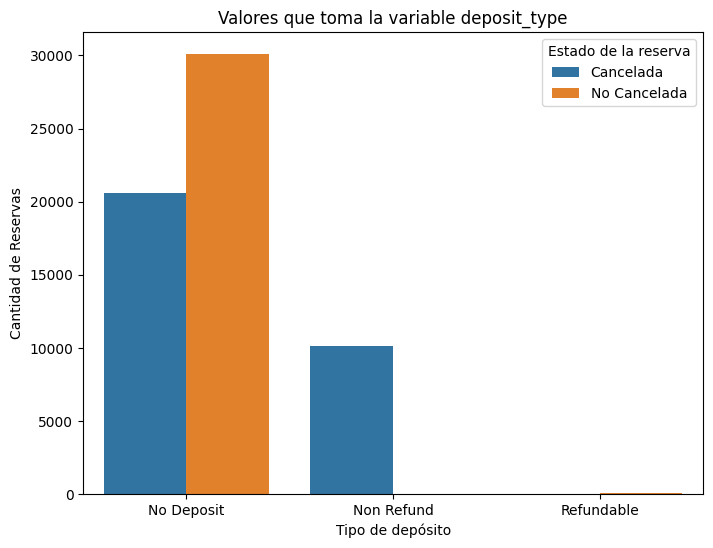

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='deposit_type', hue = "Estado de la reserva")
plt.xlabel('Tipo de depósito')
plt.ylabel('Cantidad de Reservas')
plt.title('Valores que toma la variable deposit_type')
plt.show()

Observamos que hay 3 valores: 'no deposit'(sin depósito bancario), 'non refund'(sin reembolso), y 'refundable'(con reembolso). Para nuestro análisis, esta variable tiene mucho valor, ya que por ejemplo, sin haber empezado a ver los valores, podemos tomar como hipótesis inicial por ejemplo que las reservas sin reembolso serán las que más tiendan a NO cancelarse

Analicemos valor a valor con respecto a la variable is_canceled

In [ ]:
ds_deposit_no_deposit = ds_hoteles_train_limpio[ds_hoteles_train_limpio['deposit_type'] == 'No Deposit']
ds_deposit_non_refund = ds_hoteles_train_limpio[ds_hoteles_train_limpio['deposit_type'] == 'Non Refund']
ds_deposit_refundable = ds_hoteles_train_limpio[ds_hoteles_train_limpio['deposit_type'] == 'Refundable']

Veamos en un gráfico la relación entre las reservas que no tuvieron depósito con la variable target

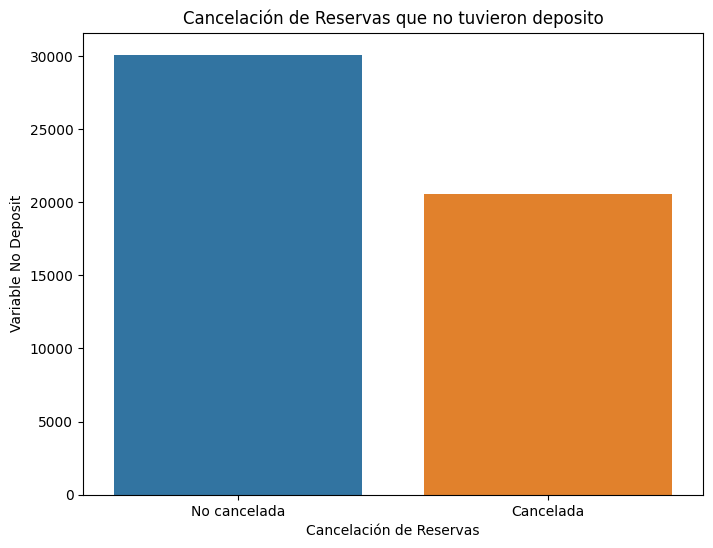

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_no_deposit, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable No Deposit')
plt.title('Cancelación de Reservas que no tuvieron deposito')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que, por casi 10000 reservas de diferencia, las reservas que tuvieron este valor en la variable 'deposit_type' no fueron canceladas.

Realizamos el mismo gráfico pero ahora con las reservas sin reembolso

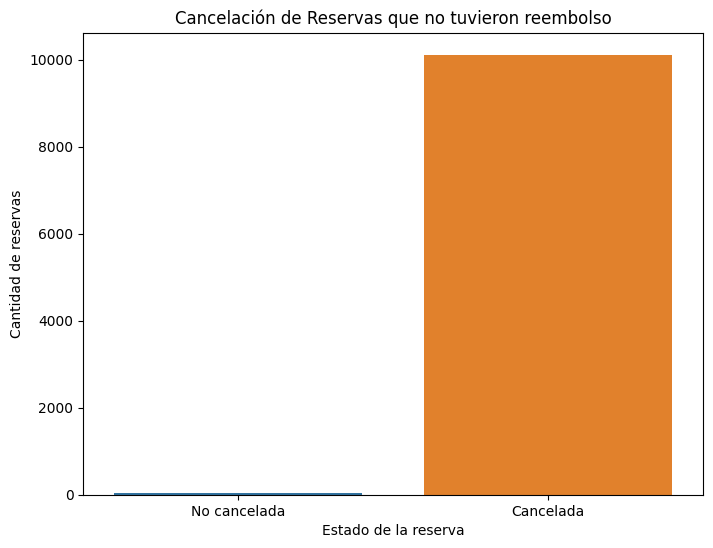

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_non_refund, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas que no tuvieron reembolso')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Ante todo pronóstico, la gran mayoría de reservas que NO tuvieron reembolso fueron finalmente canceladas.

Por último, analizamos esta relación con la variable target cuando deposit_type es 'refundable'

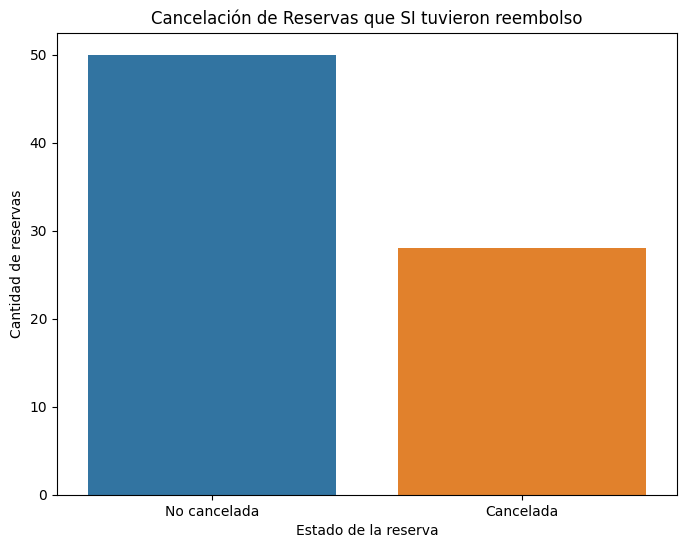

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_refundable, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas que SI tuvieron reembolso')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que, por casi el doble de casos, las reservas que fueron reembolsables NO fueron canceladas.

Considerar la variable "deposit_type"  en nuestro análisis es importante, ya que nos brinda información valiosa sobre cómo la elección de método de pago y depósito por parte de los huéspedes puede impactar en las cancelaciones. Al examinar esta variable, podemos detectar si hay tipos de depósito específicos que se correlacionan con tasas de cancelación más altas o más bajas.

# 17) Variable DistributionChannel

Veamos los valores que toma esta variable en el dataset limpio

In [ ]:
columna_distribution_channel = ds_hoteles_train_limpio['distribution_channel']

columna_distribution_channel.value_counts()

TA/TO        51300
Direct        6408
Corporate     3095
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

No tiene datos faltantes, sin embargo vemos que esta variable toma en 4 casos el valor 'Undefined', pero veamos esto en un gráfico de torta

La variable "distribution channel" es esencial en nuestro análisis, ya que nos ayuda a entender cómo los distintos canales de reservas se relacionan con las tasas de cancelación. Nos permite identificar patrones de cancelación asociados a canales específicos, lo que es clave para nuestro analisis,y en un futuro para el modelo de prediccion.

## Analisis y Visualizacion de datos

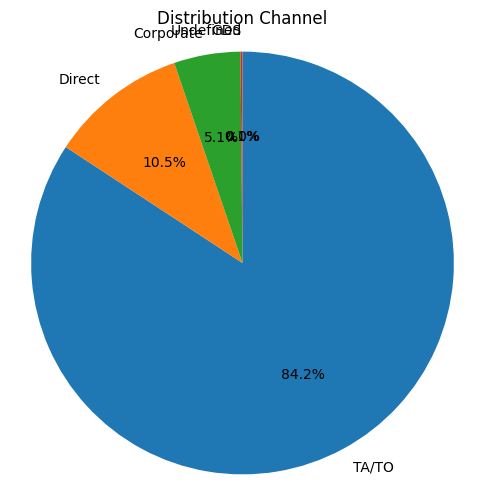

In [ ]:

plt.figure(figsize=(6, 6))


values = columna_distribution_channel.value_counts()
labels = values.index

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title('Distribution Channel')


plt.axis('equal')

plt.show()


Vamos a considerar la variable TA/TO como la variable a analizar,veamos como se distribuyen con la variable is_canceled

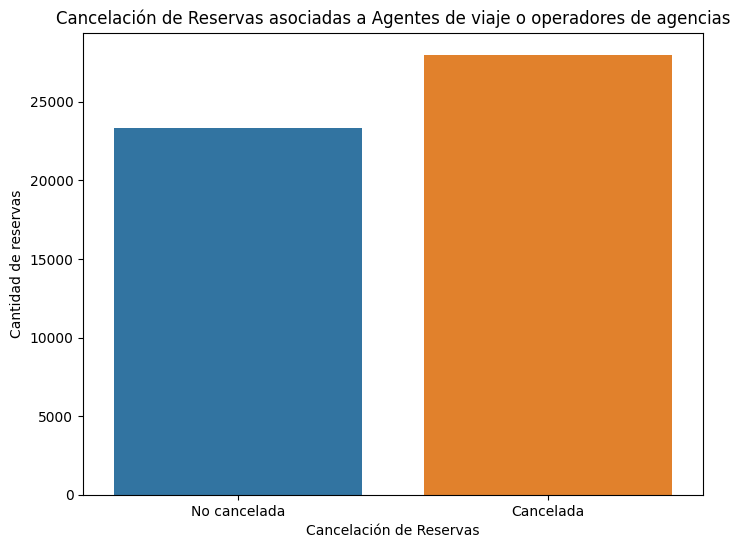

In [ ]:
ds_distribution_ta_to = ds_hoteles_train_limpio[ds_hoteles_train_limpio['distribution_channel'] == 'TA/TO']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_distribution_ta_to, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas asociadas a Agentes de viaje o operadores de agencias')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()




# 18) Variable is_repeated_guest


## Analisis y visualizacion de datos


Veamos los valores que toma la variable en el dataset actualizado

In [ ]:
ds_hoteles_train_limpio['is_repeated_guest'].value_counts()

0    59388
1     1508
Name: is_repeated_guest, dtype: int64

Podemos ver que existen mayor cantidad de personas que no habían visitado antes el hotel que de personas que si habían visitado.
Usamos un gráfico de torta para poder visualizarlo mas detallado.

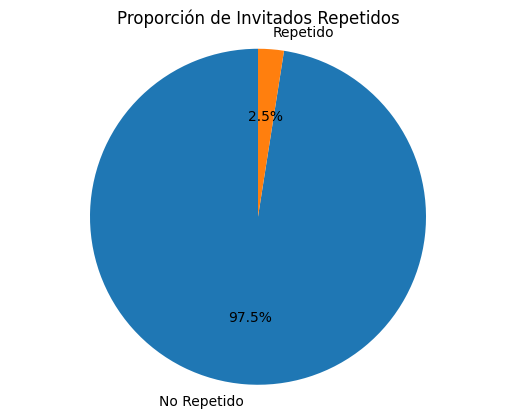

In [ ]:
repetido_counts = ds_hoteles_train_limpio['is_repeated_guest'].value_counts()
labels = ['No Repetido', 'Repetido']
plt.pie(repetido_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Invitados Repetidos')
plt.show()

 Analizamos, junto a las otras variables,a buscar correlacion entre ellas;y la primer variable que puede tener una conexion con la misma es la variable hotel.
La usare para calcular la proporción de invitados repetidos en cada tipo de hotel. Esto te ayudará a comprender si la proporción de invitados repetidos varía según el tipo de hotel.

In [ ]:
proporcion_por_tipo_de_hotel = ds_hoteles_train_limpio.groupby('hotel')['is_repeated_guest'].mean()* 100
print(proporcion_por_tipo_de_hotel)

hotel
City Hotel      1.930036
Resort Hotel    3.640852
Name: is_repeated_guest, dtype: float64


Estos resultados nos muestran que:


*  En el "City Hotel," aproximadamente el 1.92% de los invitados son repetidos
* En el "Resort Hotel," aproximadamente el 3.64% de los invitados son repetidos.  


Estos resultados sugieren que el "Resort Hotel" tiene una proporción más alta de invitados repetidos en comparación con el "City Hotel.
Lo veremos en un grafico

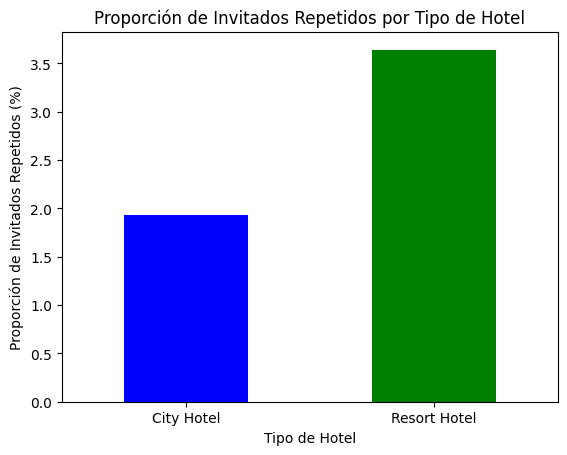

In [ ]:
proporcion_por_tipo_de_hotel.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Proporción de Invitados Repetidos (%)')  # Agregar (%) al título del eje y
plt.title('Proporción de Invitados Repetidos por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Voy a ver como esta relacionada la variable con las cancelaciones

In [ ]:
repetidos_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_repeated_guest'] == 1]
no_repetidos_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_repeated_guest'] == 0]

En estos nuevos dataframes, tengo separado los clientes repetidos y los no repetidos, y a continuacion voy a ver en un gráfico si la cancelaciones tienen una conexión con las cancelaciones

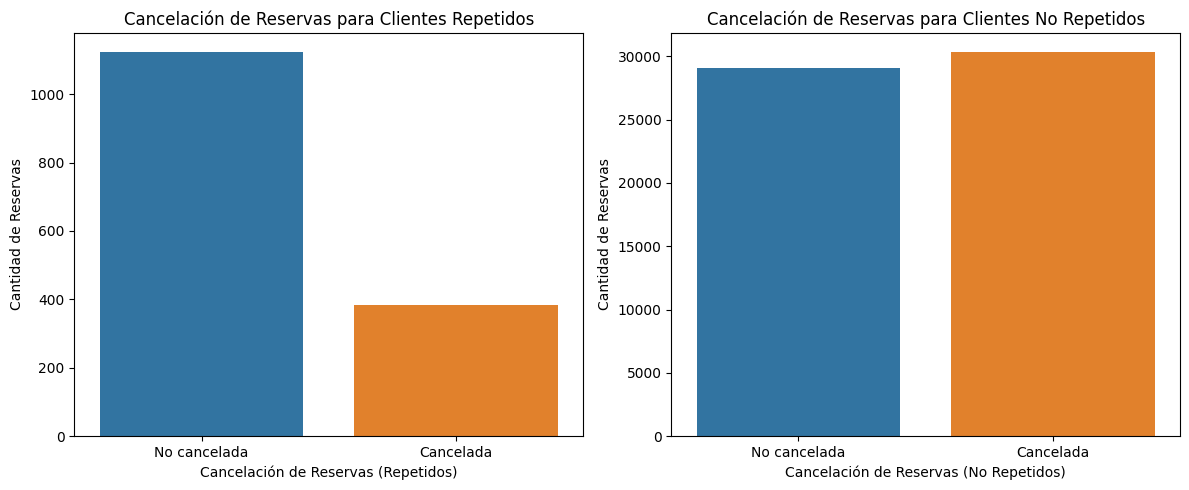

In [ ]:
# Crear dos gráficos de barras separados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.subplot(1, 2, 2)
sns.countplot(data=no_repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (No Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes No Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.tight_layout()
plt.show()

A simple vista con los clientes no repetidos no existe mucha relacion entre las cancelaciones,mientras que los clientes repetidos tienden a no cancelar las reservas por encima de las canceladas.
Una hipótesis con esta variable es que los clientes que ya han estado previamente,tienden a no cancelar a proximas reservas.

La inclusión de la variable "is_repeated_guest"  en nuestro análisis es significativa, ya que nos permite entender cómo la condición de ser un huésped que ha visitado el hotel previamente puede estar relacionada con las cancelaciones. Al examinar esta variable, podemos identificar si los huéspedes repetidos tienen tasas de cancelación diferentes en comparación con los huéspedes nuevos.




---

# 19) Variable Hotel



## Análisis de datos y visualización

Al ser una variable cualitativa, veamos qué valores toma esta variable y con qué frecuencia lo hacen

In [ ]:
columna_hotel = ds_hoteles_train_limpio['hotel']
columna_hotel.value_counts()

City Hotel      41450
Resort Hotel    19446
Name: hotel, dtype: int64

Observemos en un gráfico de barras

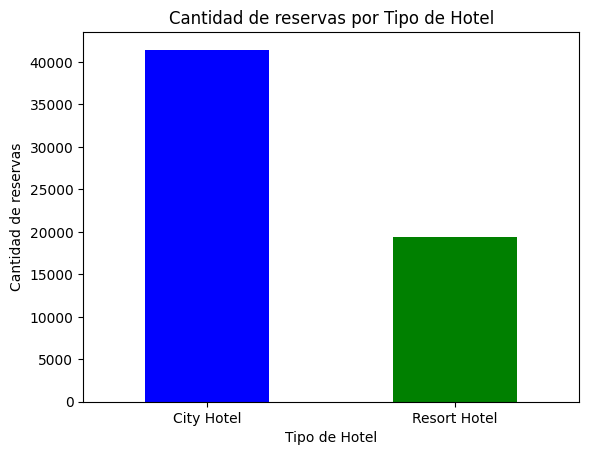

In [ ]:
columna_hotel.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Observamos que la gran mayoria de reservas(exactamente 42129 reservas) se dieron en los llamados 'city hotel', mientras que el resto de reservas(19784) fueron en hoteles del tipo 'resort hotel'

Ahora nos interesa saber cuántas reservas se cancelaron efectivamente dependiendo del tipo de hotel que se eligió

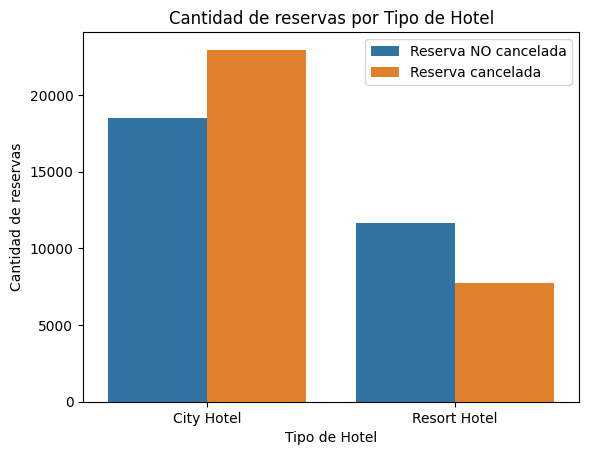

In [ ]:
sns.countplot(data=ds_hoteles_train_limpio, x="hotel", hue="is_canceled")
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.legend(labels=["Reserva NO cancelada","Reserva cancelada"])

Observamos que las reservas con hoteles del tipo 'City Hotel' tienen alrededor de 23000 reservas canceladas(mas reservas canceladas que las que NO se cancelaron). En cambio, las reservas en hoteles del tipo 'Resort Hotel' conservan alrededor de 12000 reservas que NO se cancelaron, mientras que casi 8000 reservas si se cancelaron.

La distinción entre "city hotel" (hotel de ciudad) y "resort hotel" (hotel vacacional) es fundamental en nuestro análisis, ya que nos permite evaluar cómo el tipo de hotel puede influir en las tasas de cancelación. Al examinar esta variable, podemos identificar si los hoteles urbanos y los hoteles vacacionales muestran diferencias significativas en sus tasas de cancelación.



---

# 20) Variable lead time


## Analisis de datos y visualizacion


Veamos los valores que toma la variable en el dataset limpio

In [ ]:
columna_lead_time = ds_hoteles_train_limpio['lead_time']
columna_lead_time.value_counts().reset_index()

index  lead_time
0        0       2516
1        1       1447
2        2        863
3        3        767
4        4        759
..     ...        ...
467    387          1
468    390          1
469    445          1
470    389          1
471    400          1

[472 rows x 2 columns]

Como es una variable cuantitativa, procedemos a ver la mayor cantidad de métricas posibles(media, mediana, moda, etc)

In [ ]:
columna_lead_time.describe()

count    60896.000000
mean       113.220212
std        110.741670
min          0.000000
25%         24.000000
50%         79.000000
75%        173.000000
max        629.000000
Name: lead_time, dtype: float64

Visualizamos los datos en un boxplot para poder observar una mejor distribución de los datos

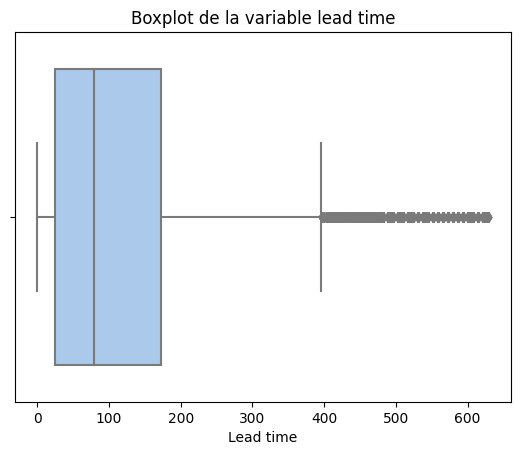

In [ ]:
sns.boxplot(x = columna_lead_time, palette = "pastel")
plt.title("Boxplot de la variable lead time")
plt.xlabel('Lead time')
plt.show()

Observamos que una mayoría de reservas tuvieron un lead_time con valor entre 50 y 150. Es decir, la mayoría de reservas se dieron entre 50 días y 150 días de anticipación.

Buscamos una relación entre el tipo de hotel de estas reservas y la variable lead_time.

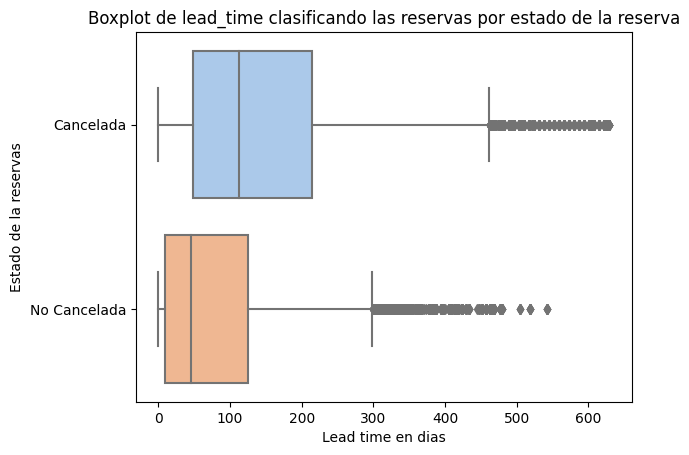

In [ ]:
sns.boxplot(x = columna_lead_time, y = ds_hoteles_train_limpio["Estado de la reserva"], palette = "pastel")
plt.title("Boxplot de lead_time clasificando las reservas por estado de la reserva")
plt.xlabel('Lead time en dias')
plt.ylabel('Estado de la reservas')
plt.show()

A partir de este gráfico y las estadísticas podemos observar que la mayoría de las reservas entre se hacen entre los 0 dias y 200 dias, con varios outliers con reservas de más de 400 dias. Observamos más detalladamente, la distribución de los datos sin los outliers y de solo los outliers

In [ ]:
ds_lead_time_menor_400 = ds_hoteles_train_limpio.loc[columna_lead_time <= 400]
ds_lead_time_menor_400.shape

(59614, 31)

Podemos observar que hemos filtrado solamente alrededor de 1300 columnas. Ahora observemos la distribucion de los datos para estos datos

In [ ]:
ds_lead_time_menor_400["lead_time"].describe()

count    59614.000000
mean       105.524373
std         98.132993
min          0.000000
25%         23.000000
50%         76.000000
75%        166.000000
max        400.000000
Name: lead_time, dtype: float64

In [ ]:
ds_lead_time_mas_400 = ds_hoteles_train_limpio.loc[columna_lead_time > 400]
ds_lead_time_mas_400["lead_time"].describe()

count    1282.000000
mean      471.082683
std        62.538839
min       403.000000
25%       422.000000
50%       454.000000
75%       496.000000
max       629.000000
Name: lead_time, dtype: float64

De nuevo, nos apoyamos en un boxplot para observar estas medidas

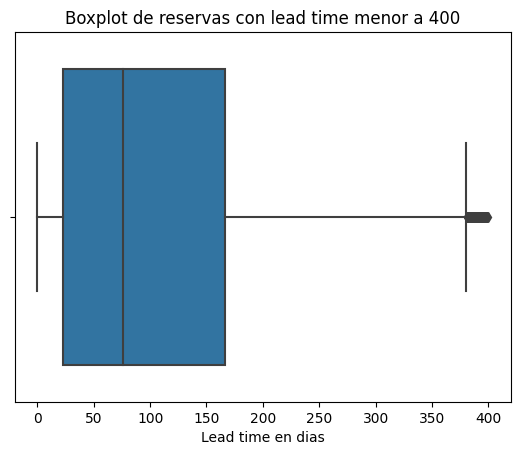

In [ ]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"])
plt.title("Boxplot de reservas con lead time menor a 400")
plt.xlabel('Lead time en dias')
plt.show()

Observamos que estas reservas tuvieron un lead_time con valor entre 30 y 170 aproximadamente.

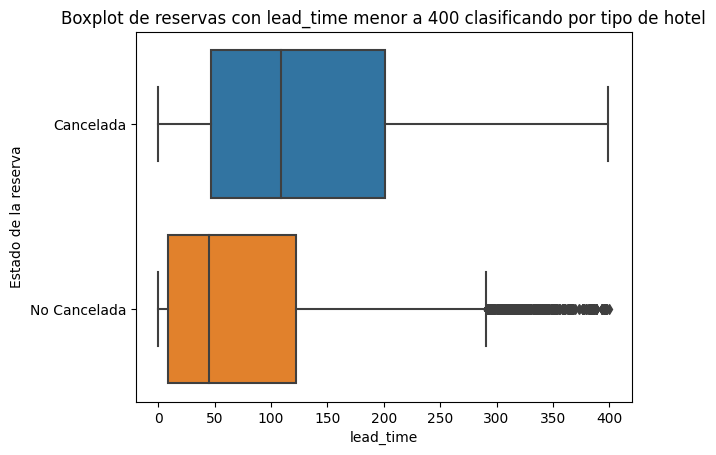

In [ ]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"], y = ds_lead_time_menor_400["Estado de la reserva"])
plt.title("Boxplot de reservas con lead_time menor a 400 clasificando por tipo de hotel")
plt.show()

<Axes: xlabel='lead_time', ylabel='Count'>

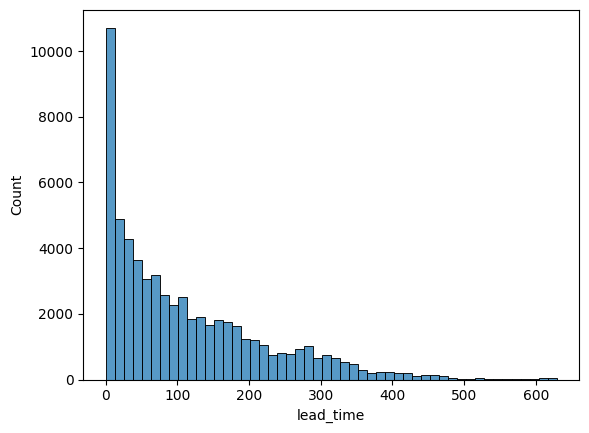

In [ ]:
sns.histplot(data = ds_hoteles_train_limpio, x = "lead_time", bins = 50)


La inclusión de la variable "lead time" en nuestro análisis es de gran importancia, ya que nos permite entender cómo el período de tiempo entre la reserva y la fecha de llegada puede influir en las cancelaciones. Al analizar esta variable, podemos identificar si un largo o corto tiempo de antelación está relacionado con tasas de cancelación más altas o más bajas.
Junto con otras variables,podemos encontrar informacion muy importante para nuestro analisis.

## Analisis de valores atipicos

Analicemos el boxplot

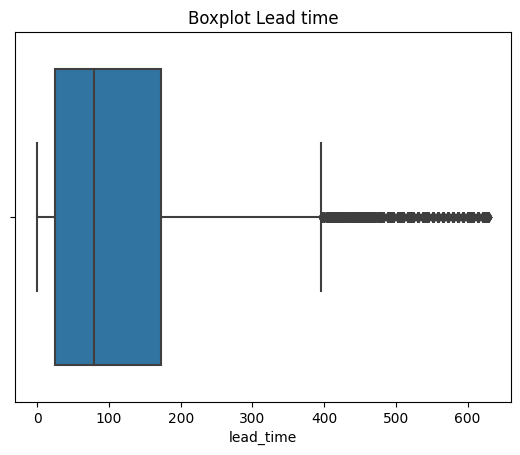

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["lead_time"])
plt.title('Boxplot Lead time')

plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [ ]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["lead_time"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["lead_time"], 75)


# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers severos y moderados
lower_limit_severo = Q1 - 3 * IQR
upper_limit_severo = Q3 + 3 * IQR

lower_limit_moderado = Q1 - 1.5 * IQR
upper_limit_moderado = Q3 + 1.5 * IQR

# Identifica outliers severos y moderados
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["lead_time"] < lower_limit_severo) | (ds_hoteles_train_limpio["lead_time"] > upper_limit_severo)]

outliers_moderados = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["lead_time"] < lower_limit_moderado) | (ds_hoteles_train_limpio["lead_time"] > upper_limit_moderado)]



outliers_moderados


hotel  lead_time  arrival_date_year arrival_date_month  \
15     City Hotel        465               2017               July   
51     City Hotel        489               2016           November   
82     City Hotel        412               2016             August   
95     City Hotel        454               2016            October   
99     City Hotel        420               2016          September   
...           ...        ...                ...                ...   
61753  City Hotel        433               2016          September   
61761  City Hotel        496               2016           November   
61768  City Hotel        433               2016          September   
61783  City Hotel        454               2016            October   
61790  City Hotel        538               2016           December   

       arrival_date_week_number  arrival_date_day_of_month  \
15                           30                         26   
51                           46                         10   
82                           35                         25   
95                           41                          6   
99                           36                          3   
...                         ...                        ...   
61753                        37                          8   
61761                        47                         17   
61768                        38                         15   
61783                        41                          6   
61790                        53                         29   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
15                           0                     3       2       0.0  ...   
51                           0                     2       2       0.0  ...   
82                           0                     2       2       0.0  ...   
95                           0                     2       2       0.0  ...   
99                           2                     2       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61753                        0                     3       2       0.0  ...   
61761                        0                     2       2       0.0  ...   
61768                        0                     2       2       0.0  ...   
61783                        0                     2       2       0.0  ...   
61790                        0                     2       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
15       No Deposit  229.0      -1                    0  Transient-Party   
51       Non Refund    1.0      -1                    0        Transient   
82       Non Refund    1.0      -1                    0        Transient   
95       Non Refund    1.0      -1                    0        Transient   
99       Non Refund   35.0      -1                    0        Transient   
...             ...    ...     ...                  ...              ...   
61753    Non Refund    3.0      -1                    0        Transient   
61761    Non Refund    1.0      -1                    0        Transient   
61768    Non Refund    1.0      -1                    0        Transient   
61783    Non Refund    1.0      -1                    0        Transient   
61790    Non Refund    1.0      -1                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
15     112.67                            0                          0   
51      62.80                            0                          0   
82      62.00                            0                          0   
95      62.00                            0                          0   
99      75.00                            0                          0   
...       ...                          ...                        ...   
61753   70.00                            0           

1317 valores son atipicos,pero graficamente se puede notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [ ]:
outliers_severos

hotel  lead_time  arrival_date_year arrival_date_month  \
576    City Hotel        626               2016           November   
2623   City Hotel        626               2016           November   
4560   City Hotel        622               2017              March   
7563   City Hotel        626               2016           November   
7813   City Hotel        622               2017              March   
8393   City Hotel        622               2017              March   
8984   City Hotel        629               2017              March   
9412   City Hotel        629               2017              March   
9728   City Hotel        626               2016           November   
10535  City Hotel        622               2017              March   
10542  City Hotel        622               2017              March   
13732  City Hotel        622               2017              March   
13740  City Hotel        629               2017              March   
15334  City Hotel        629               2017              March   
15633  City Hotel        626               2016           November   
18350  City Hotel        626               2016           November   
22092  City Hotel        626               2016           November   
22150  City Hotel        626               2016           November   
24225  City Hotel        626               2016           November   
25462  City Hotel        622               2017              March   
28914  City Hotel        629               2017              March   
30138  City Hotel        622               2017              March   
32008  City Hotel        626               2016           November   
33079  City Hotel        626               2016           November   
35972  City Hotel        622               2017              March   
36325  City Hotel        629               2017              March   
38868  City Hotel        626               2016           November   
38903  City Hotel        629               2017              March   
39760  City Hotel        629               2017              March   
40237  City Hotel        626               2016           November   
40711  City Hotel        626               2016           November   
42612  City Hotel        622               2017              March   
42630  City Hotel        622               2017              March   
43069  City Hotel        622               2017              March   
43359  City Hotel        629               2017              March   
44716  City Hotel        622               2017              March   
45153  City Hotel        629               2017              March   
47927  City Hotel        622               2017              March   
51228  City Hotel        626               2016           November   
53463  City Hotel        626               2016           November   
53772  City Hotel        626               2016           November   
54470  City Hotel        629               2017              March   
56524  City Hotel        629               2017              March   
56711  City Hotel        626               2016           November   
57360  City Hotel        626               2016           November   
59173  City Hotel        629               2017              March   
60381  City Hotel        629               2017              March   
61305  City Hotel        622               2017              March   

       arrival_date_week_number  arrival_date_day_of_month  \
576                          46                          7   
2623                         46                          7   
4560                         12                         23   
7563                         46                          7   
7813                         12                         23   
8393                         12                         23   
8984                         13                         30   
9412                         13                         30   
9728                   

In [ ]:
outliers_severos['Estado de la reserva'].value_counts()

Cancelada    48
Name: Estado de la reserva, dtype: int64

Con respecto a los valores atipicos encontrados,podemos notar que ,en los severos, todos fueron cancelados por lo que al momento de predecir puede que sea una mayor probabilidad de cancelaciones .Por lo cual lo vamos a dejar estos datos para su analisis

Tambien podemos aplicar Isolation Forest para detectar estos valores atipicos junto a otras variables,en este caso vamos a aplicar su analisis junto a days_in_waiting_list ,ya que consideramos que puede ir de la mano con esta variable y podemos encontrar valores atipicos:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


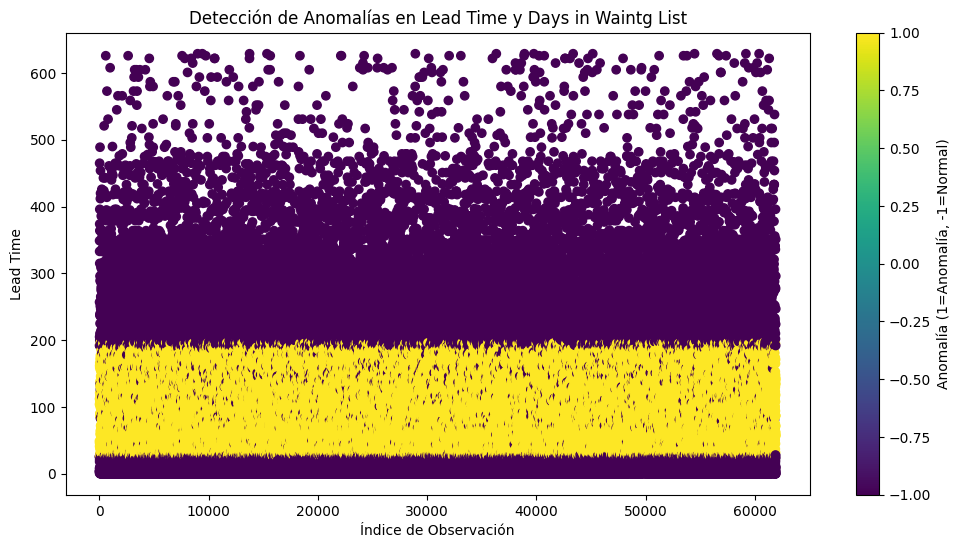

In [ ]:
from sklearn.ensemble import IsolationForest


variables_seleccionadas = ['lead_time', 'days_in_waiting_list']


datos_insolation = ds_hoteles_train_limpio[variables_seleccionadas]

model = IsolationForest(contamination=0.5)

# Entrena el modelo en los datos multivariados
model.fit(datos_insolation)


predictions = model.predict(datos_insolation)

# Grafica los resultados
plt.figure(figsize=(12, 6))
plt.scatter(ds_hoteles_train_limpio.index, ds_hoteles_train_limpio['lead_time'], c=predictions, cmap='viridis')
plt.xlabel('Índice de Observación')
plt.ylabel('Lead Time')
plt.title('Detección de Anomalías en Lead Time y Days in Waintg List')
plt.colorbar(label='Anomalía (1=Anomalía, -1=Normal)')
plt.show()

Podemos observar una distribución similar entre las reservas anómalas y las reservas normales, lo que sugiere que todas las reservas dentro de esta categorización son válidas y dignas de ser incluidas en nuestro análisis.



---

# 21) Variable Market Segment


## Analisis de datos y visualizacion



Empezamos por ver que posibles valores puede tomar la variable

In [ ]:
market_segmets_counts = ds_hoteles_train_limpio["market_segment"].value_counts().reset_index()
market_segmets_counts

index  market_segment
0      Online TA           29000
1  Offline TA/TO           12234
2         Groups           11421
3         Direct            5641
4      Corporate            2458
5       Aviation             110
6  Complementary              30
7      Undefined               2

La mayoria de las reservas vemos que fueron reservadas mediante Online Travel Agents, seguido por offline Travel Agents y operators, seguido por grupos y reservas directas.

Veamos ahora la relación entre cada valor que toma esta variable con la variable target

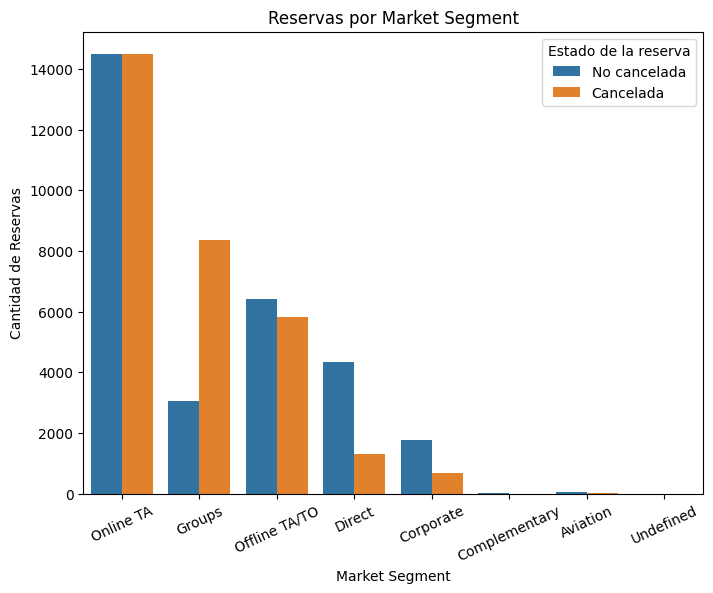

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='market_segment' , hue= 'is_canceled')
plt.xlabel('Market Segment')
plt.xticks(rotation=25)
plt.ylabel('Cantidad de Reservas')
plt.title('Reservas por Market Segment')
plt.legend(title='Estado de la reserva', labels=['No cancelada', 'Cancelada'])
plt.show()

A partir de este grafico podemos, concluir que la mitad de las reservas de hechas por Online TA son canceladas, sin embargo algo mas claro a destacar es que la mayoria de las reservas hechas por Grupos son canceladas y l mayoria de las reservas hechas directamente o por corporaciones no son canceladas.

La inclusión de la variable "market segment"  en nuestro análisis es importante, ya que nos permite comprender cómo diferentes segmentos de mercado pueden influir en las tasas de cancelación. Al analizar esta variable, podemos identificar si ciertos segmentos de mercado tienen tasas de cancelación más altas o más bajas.

# 22) Variable Meal
Nuestra hipótesis antes de comenzar con el análisis es que, el tipo de comida no tiene impacto en la tasa de cancelación,pero veremos en el análisis si es correcta.


## Analisis y visualizacion de datos


Vemos los posibles valores que toma la variable y con qué frecuencia lo hace

In [ ]:
columna_meal = ds_hoteles_train_limpio['meal']

columna_meal.value_counts().reset_index()

index   meal
0         BB  47023
1         HB   7367
2         SC   5460
3  Undefined    576
4         FB    470

Luego de ver los posibles valores que toman, debo asociar la variable Undefined y SC, ya que el paper dado lo dice, por lo cual quedaría así

In [ ]:
df_copia_meal = ds_hoteles_train_limpio.copy()

# Reemplazar "SC" y "Undefined" por "SC_Undefined" en la columna "meal" de la copia
df_copia_meal['meal'] = df_copia_meal['meal'].replace(['SC', 'Undefined'], 'SC_Undefined')

# Verificar el resultado en la copia
columna_meal_copia = df_copia_meal['meal']
columna_meal_copia.value_counts()


BB              47023
HB               7367
SC_Undefined     6036
FB                470
Name: meal, dtype: int64

Veamos como se distribuyen en un gráfico

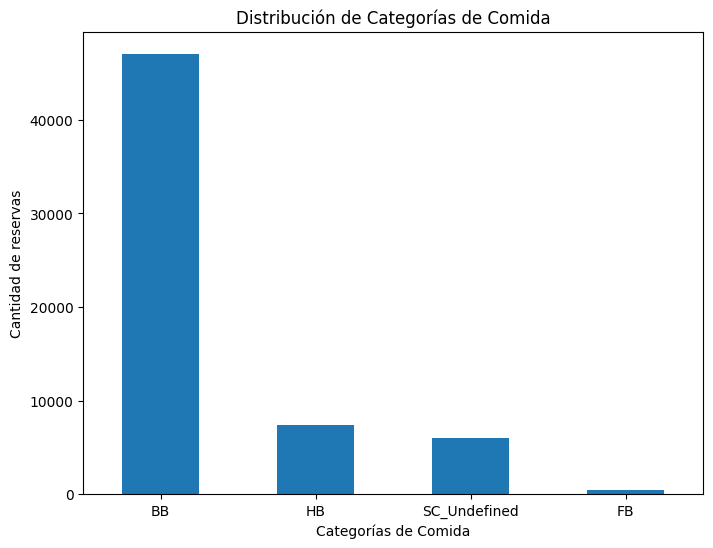

In [ ]:
conteo_meal = df_copia_meal['meal'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_meal.plot(kind='bar')
plt.xlabel('Categorías de Comida')
plt.ylabel('Cantidad de reservas')
plt.title('Distribución de Categorías de Comida')
plt.xticks(rotation=0)  # Para evitar la rotación de etiquetas en el eje x
plt.show()

Vamos a analizar valor por valor,y analizar si existe alguna hipótesis asociada a ella

In [ ]:
ds_meal_bb = df_copia_meal[df_copia_meal['meal'] == 'BB']
ds_meal_hb = df_copia_meal[df_copia_meal['meal'] == 'HB']
ds_meal_sc_undefined = df_copia_meal[df_copia_meal['meal'] == 'SC_Undefined']
ds_meal_fb = df_copia_meal[df_copia_meal['meal'] == 'FB']

Comenzemos con el valor BB

In [ ]:
ds_meal_bb['is_canceled'].value_counts()

1    23965
0    23058
Name: is_canceled, dtype: int64

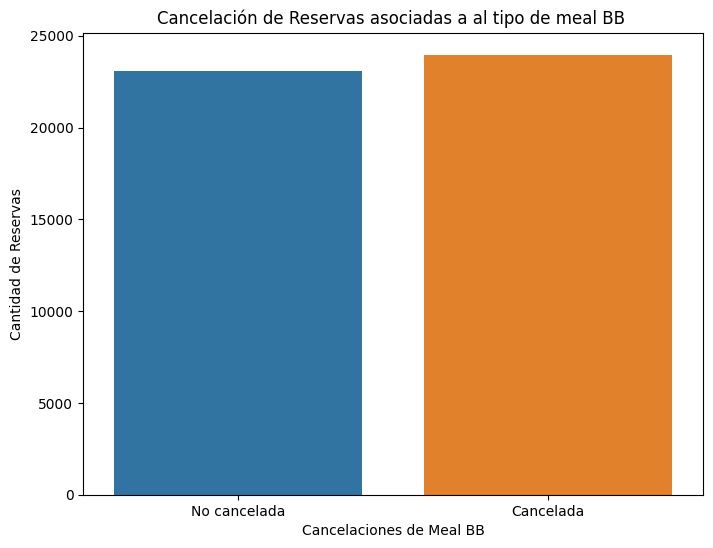

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_bb, x='is_canceled')
plt.xlabel('Cancelaciones de Meal BB')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas asociadas a al tipo de meal BB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A simple vista , con el tipo 'BB' podemos decir que no pareciera tener impacto en las tasas de cancelacion,ya que se dan con numeros similares entre las canceladas y las no canceladas

In [ ]:
ds_meal_hb['is_canceled'].value_counts()

0    3895
1    3472
Name: is_canceled, dtype: int64

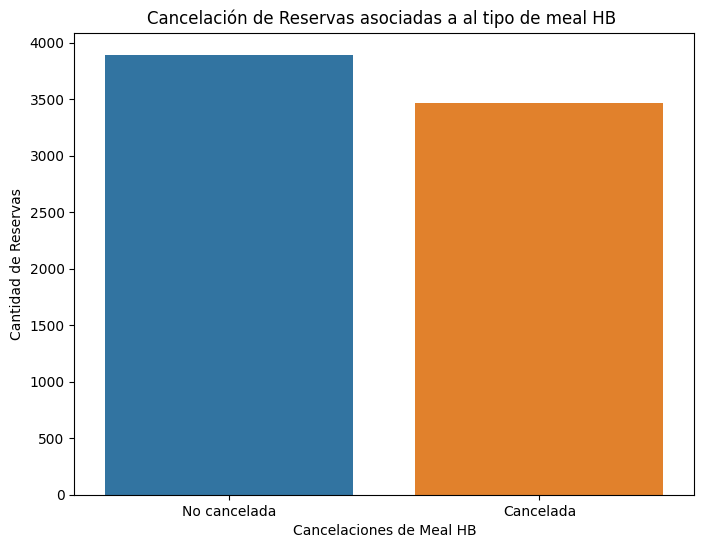

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_hb, x='is_canceled')
plt.xlabel('Cancelaciones de Meal HB')
plt.ylabel('Cantidad de Reservas')

plt.title('Cancelación de Reservas asociadas a al tipo de meal HB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Al igual que el valor BB,esta variable tampoco tiene gran impacto en las cancelaciones

In [ ]:
ds_meal_sc_undefined['is_canceled'].value_counts()

0    3077
1    2959
Name: is_canceled, dtype: int64

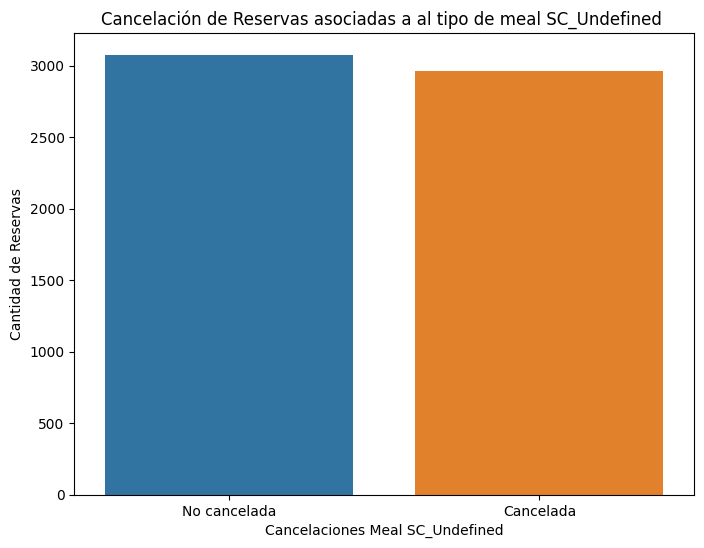

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_sc_undefined, x='is_canceled')
plt.xlabel('Cancelaciones Meal SC_Undefined')
plt.ylabel('Cantidad de Reservas')

plt.title('Cancelación de Reservas asociadas a al tipo de meal SC_Undefined ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A diferencia de las otros valores, las cancelaciones son mayores que en las no canceladas,pero por muy pocos casos, veamos la ultima

In [ ]:
ds_meal_fb['is_canceled'].value_counts()

1    332
0    138
Name: is_canceled, dtype: int64

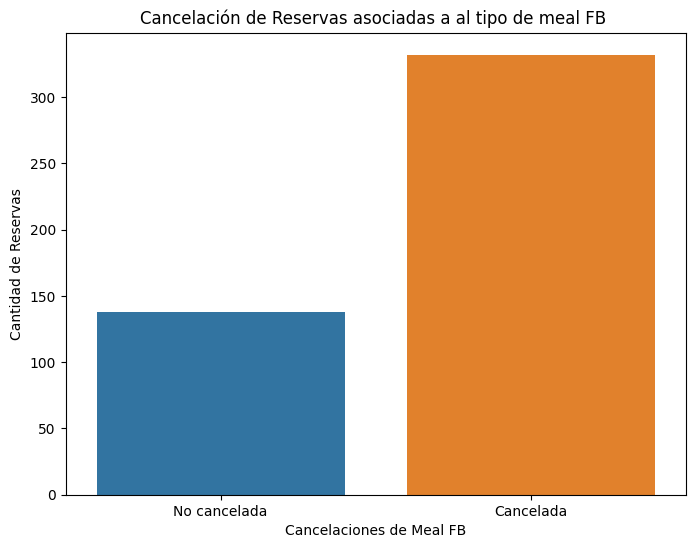

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_fb, x='is_canceled')
plt.xlabel('Cancelaciones de Meal FB')
plt.ylabel('Cantidad de Reservas')

plt.title('Cancelación de Reservas asociadas a al tipo de meal FB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar que las reservas con Meal FB tienden a tener una mayor proporcion de cancelacion que las que usan otro tipo de comida, por lo cual mi hipotesis no es correcta, los datos nos arrojan una tendencia mayor que en los ootros tipo de cancelacion.
Podemos analizar sus tasas promedio de cancelacion

In [ ]:
promedio_por_meal = df_copia_meal.groupby('meal')['is_canceled'].mean()
promedio_por_meal

meal
BB              0.509644
FB              0.706383
HB              0.471291
SC_Undefined    0.490225
Name: is_canceled, dtype: float64

Dado estos resultados y que mi hipotesis anterior quedo refutada,planteo una nueva que las tasas de cancelacion de la variable FB pueden estar asociadas al tipo de hotel donde se ha hecho la reserva,y veremos si esta relacionada con sus cancelaciones

In [ ]:
df_hotel_ch = ds_hoteles_train_limpio[ds_hoteles_train_limpio['hotel'] == 'City Hotel']
df_hotel_rh = ds_hoteles_train_limpio[ds_hoteles_train_limpio['hotel'] == 'Resort Hotel']

Veamos sus tasas de cancelacion

In [ ]:
tasa_cancelacion_hotel_ch = df_hotel_ch.groupby('meal')['is_canceled'].mean()
tasa_cancelacion_hotel_rh = df_hotel_rh.groupby('meal')['is_canceled'].mean()
tasa_cancelacion_fb_ch = tasa_cancelacion_hotel_ch['FB']
tasa_cancelacion_fb_rh = tasa_cancelacion_hotel_rh['FB']

print('La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: ' + str(tasa_cancelacion_fb_ch )+' y la de Resort Hotel: ' +str( tasa_cancelacion_fb_rh))

La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: 1.0 y la de Resort Hotel: 0.6891891891891891


Por lo cual ,estos valores indican que la categoría "FB" tiene tasas de cancelación relativamente altas tanto en el City Hotel como en el Resort Hotel. La tasa de cancelación en el Resort Hotel es un poco más alta que en el City Hotel para esta categoría específica.

La tasa de cancelación en la categoría "FB" es alta en ambos tipos de hoteles, lo que sugiere que esta categoría podría ser más propensa a cancelaciones independientemente del tipo de hotel.Veremos mas adelante si tiene algun significado estos datos obtenidos

La consideración de la variable "meal"  en nuestro análisis es relevante, ya que no solo nos ayuda a comprender las tasas de cancelación en función de las opciones de comidas, sino que también nos permite realizar análisis interrelacionados con otras variables. Al examinar esta variable, podemos identificar si ciertas opciones de comidas tienen un impacto significativo en las tasas de cancelación, lo que ya es un hallazgo valioso. Además, esta información puede ser utilizada en conjunto con otras variables, como tipo de habitación, duración de la estancia o país de origen, para identificar patrones más complejos. Por ejemplo, podríamos analizar si los huéspedes que reservan ciertas opciones de comidas y tipos de habitación tienen menos probabilidades de cancelar.



# 23) Variable PreviousBookingsNotCanceled


## Analisis de datos y visualizaciones
Al ser una variable cuantitativa, veamos como se distribuye(media, mediana, etc)

In [ ]:
columna_PreviousBookingsNotCanceled = ds_hoteles_train_limpio['previous_bookings_not_canceled']

columna_PreviousBookingsNotCanceled.describe()

count    60896.000000
mean         0.106214
std          1.362230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

Veamos como se distribuye en un grafico

<Axes: xlabel='previous_bookings_not_canceled', ylabel='Count'>

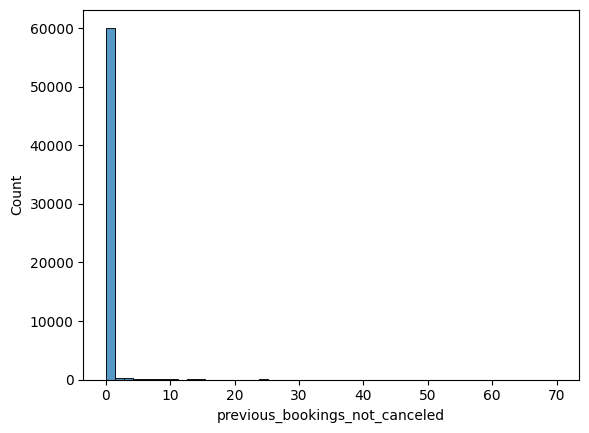

In [ ]:
sns.histplot(data = ds_hoteles_train_limpio, x = "previous_bookings_not_canceled", bins = 50)

Podemos notar que puede tomar muchos valores,veamos cuales

In [ ]:
columna_PreviousBookingsNotCanceled.value_counts()

0     59493
1       579
2       238
3       140
4        97
5        72
6        38
8        28
7        27
10       20
9        20
11       18
13       15
12       13
14       10
25       10
15        7
18        7
24        6
26        5
17        5
28        4
22        4
19        3
27        3
21        3
20        3
16        2
58        2
29        2
23        2
49        1
56        1
32        1
63        1
36        1
59        1
69        1
31        1
43        1
50        1
41        1
40        1
61        1
55        1
33        1
70        1
38        1
30        1
62        1
64        1
Name: previous_bookings_not_canceled, dtype: int64

Veamos si las personas que cancelaron alguna vez una reserva antes de la actual,tienden a cancelar

In [ ]:
ds_reservas_con_cancelaciones_anteriores= ds_hoteles_train_limpio[(ds_hoteles_train_limpio['previous_bookings_not_canceled'] != 0) ]

ds_reservas_con_cancelaciones_anteriores['is_canceled'].value_counts()

0    1285
1     118
Name: is_canceled, dtype: int64

Veamos en un grafico

([<matplotlib.axis.XTick at 0x796e91dd61a0>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

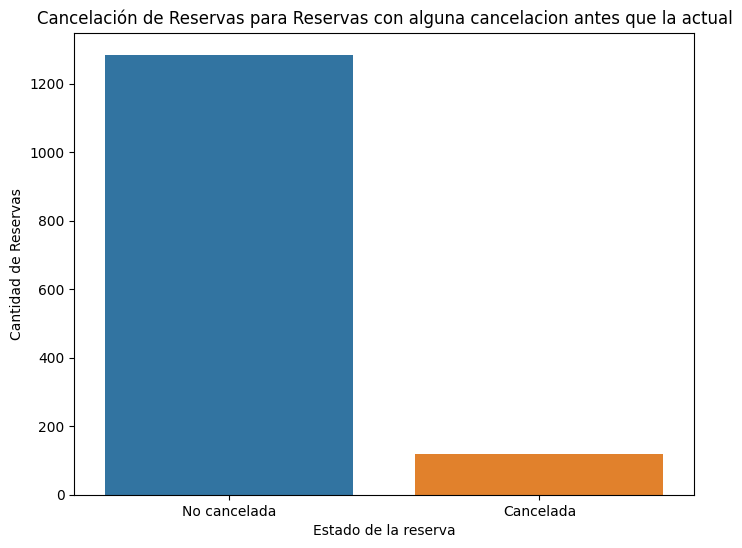

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_cancelaciones_anteriores, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con alguna cancelacion antes que la actual')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Dado que no dio el resultado que espera,veamos esas reservas que antes de ella no han sido canceladas

In [ ]:
ds_reservas_con_0_cancelaciones_anteriores= ds_hoteles_train_limpio[(ds_hoteles_train_limpio['previous_bookings_not_canceled'] == 0) ]

ds_reservas_con_0_cancelaciones_anteriores['is_canceled'].value_counts()

1    30610
0    28883
Name: is_canceled, dtype: int64

([<matplotlib.axis.XTick at 0x796e9a96ef80>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

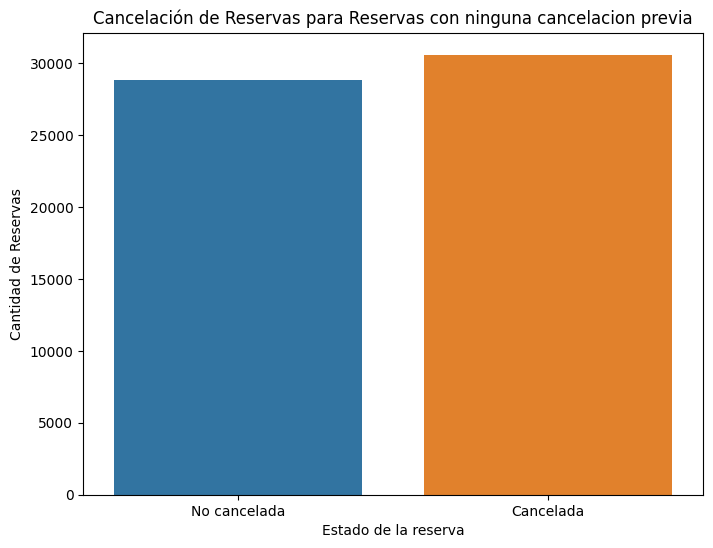

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_0_cancelaciones_anteriores, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con ninguna cancelacion previa')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

La inclusión de la variable "previous booking changes" en nuestro análisis es significativa, ya que nos permite entender cómo las modificaciones previas en las reservas de los huéspedes pueden influir en las tasas de cancelación. Al analizar esta variable, podemos identificar si un historial de cambios en reservas anteriores está relacionado con tasas de cancelación más altas o más bajas. Además, podemos explorar cómo esta variable se relaciona con otras, como la duración de la estancia o el tipo de habitación, para obtener una comprensión más completa de los patrones de comportamiento de los huéspedes.






## Analisis de valores atipicos

Analicemos el boxplot

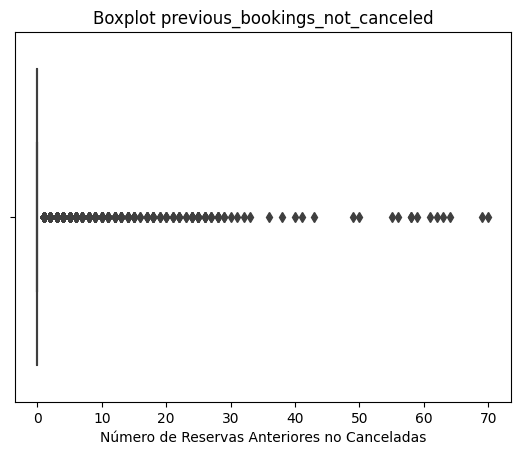

In [ ]:

sns.boxplot(x=ds_hoteles_train_limpio["previous_bookings_not_canceled"])

plt.xlabel('Número de Reservas Anteriores no Canceladas')
plt.title('Boxplot previous_bookings_not_canceled')


plt.show()


Podemos notar que la mayorias de ellos son outliers ,pero veamos sin el caso del 0 como se comportan

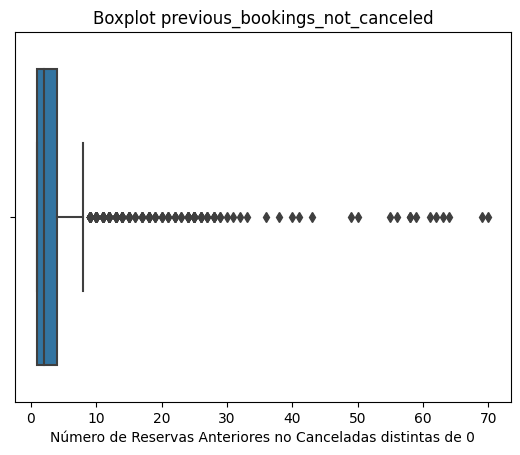

In [ ]:
ds_sin_previos_booking = ds_hoteles_train_limpio[ds_hoteles_train_limpio["previous_bookings_not_canceled"] != 0]
sns.boxplot(x=ds_sin_previos_booking["previous_bookings_not_canceled"])
plt.xlabel('Número de Reservas Anteriores no Canceladas distintas de 0')
plt.title('Boxplot previous_bookings_not_canceled')
plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [ ]:

# Calcula los cuartiles
Q1 = np.percentile(ds_sin_previos_booking["previous_bookings_not_canceled"], 25)
Q3 = np.percentile(ds_sin_previos_booking["previous_bookings_not_canceled"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["previous_bookings_not_canceled"] < lower_limit) | (ds_hoteles_train_limpio["previous_bookings_not_canceled"] > upper_limit)]

outliers


hotel  lead_time  arrival_date_year arrival_date_month  \
886      City Hotel         26               2016           November   
1579     City Hotel        190               2016              April   
1661   Resort Hotel          0               2017              April   
1720     City Hotel          3               2016           February   
2649     City Hotel          7               2017                May   
...             ...        ...                ...                ...   
60793  Resort Hotel        117               2017              April   
61042    City Hotel          3               2016              April   
61115    City Hotel          4               2017                May   
61142  Resort Hotel          1               2017            January   
61777    City Hotel         25               2017           February   

       arrival_date_week_number  arrival_date_day_of_month  \
886                          45                          2   
1579                         15                          9   
1661                         15                         11   
1720                          6                          1   
2649                         20                         15   
...                         ...                        ...   
60793                        15                         13   
61042                        16                         11   
61115                        18                          1   
61142                         2                         13   
61777                         8                         21   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
886                          0                     1       1       0.0  ...   
1579                         1                     1       2       0.0  ...   
1661                         0                     1       1       0.0  ...   
1720                         1                     1       1       0.0  ...   
2649                         1                     1       1       0.0  ...   
...                        ...                   ...     ...       ...  ...   
60793                        0                     3       1       0.0  ...   
61042                        1                     0       1       0.0  ...   
61115                        1                     0       1       0.0  ...   
61142                        1                     2       1       0.0  ...   
61777                        0                     2       1       0.0  ...   

       deposit_type agent company days_in_waiting_list    customer_type   adr  \
886      No Deposit    -1   219.0                    0        Transient  88.0   
1579     No Deposit    -1      -1                   31  Transient-Party  70.0   
1661     No Deposit  88.0      -1                    0        Transient  45.0   
1720     No Deposit    -1    40.0                    0        Transient  66.0   
2649     No Deposit    -1    40.0                    0        Transient  65.0   
...             ...   ...     ...                  ...              ...   ...   
60793    No Deposit    -1      -1                    0        Transient  61.5   
61042    No Deposit    -1    40.0                    0        Transient  65.0   
61115    No Deposit    -1    40.0                    0        Transient  65.0   
61142    No Deposit    -1   390.0                    0        Transient  35.0   
61777    No Deposit    -1    40.0                    0        Transient  67.0   

       required_car_parking_spaces  total_of_special_requests is_canceled  \
886                              0                          1           1   
1579                             0                          0           1   
1661                             0                          0           0   
1720                             0                          0           0   
2649                             0                          2           0   
...                 

184 valores son atipicos,pero graficamente se peude notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [ ]:
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["previous_bookings_not_canceled"] > 30) ]

outliers_severos

hotel  lead_time  arrival_date_year arrival_date_month  \
8152   City Hotel          0               2017            January   
8799   City Hotel          1               2016               July   
10152  City Hotel          4               2017                May   
15179  City Hotel          5               2016               July   
19562  City Hotel          8               2016           December   
20271  City Hotel          4               2017               July   
23465  City Hotel          7               2016                May   
24050  City Hotel          6               2016           December   
24625  City Hotel          1               2017            January   
27055  City Hotel          1               2016          September   
27302  City Hotel          2               2016             August   
28372  City Hotel          7               2016           November   
28615  City Hotel          7               2016           December   
32409  City Hotel          5               2017            January   
34905  City Hotel          4               2016               June   
35194  City Hotel          5               2017                May   
35487  City Hotel          2               2016                May   
37011  City Hotel          4               2016            October   
39233  City Hotel          5               2017               July   
42762  City Hotel          5               2016                May   
56240  City Hotel          6               2017                May   

       arrival_date_week_number  arrival_date_day_of_month  \
8152                          1                          2   
8799                         32                         31   
10152                        18                          2   
15179                        30                         18   
19562                        53                         28   
20271                        29                         16   
23465                        22                         23   
24050                        50                          8   
24625                         5                         31   
27055                        37                          6   
27302                        33                          7   
28372                        45                          2   
28615                        51                         14   
32409                         2                         10   
34905                        26                         21   
35194                        19                          8   
35487                        21                         15   
37011                        44                         24   
39233                        28                         11   
42762                        20                         10   
56240                        21                         22   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
8152                         1                     2       1       0.0  ...   
8799                         2                     1       1       0.0  ...   
10152                        0                     2       1       0.0  ...   
15179                        1                     1       1       0.0  ...   
19562                        0                     2       1       0.0  ...   
20271                        1                     0       1       0.0  ...   
23465                        1                     2       1       0.0  ...   
24050                        0                     1       1       0.0  ...   
24625                        0                     3       1       0.0  ...   
27055                        0                     3       1       0.0  ...   
27302                        2                     1       1       0.0  ...   
28372                        2                     6       1       0.0  ...   
28615                        0                     2       1       0.0  ...   


In [ ]:
outliers_severos['Estado de la reserva'].value_counts()

No Cancelada    20
Cancelada        1
Name: Estado de la reserva, dtype: int64

Podemos notar como este conjunto de datos puede ser de gran importancia al momento de la cancelacion, por lo cual estos valores son de gran importancia para el modelo

# 24) Variable TotalOfSpecialRequests

## Analisis de datos y visualizaciones


Veamos los valores que toma la variable

In [ ]:
columna_total_special_request = ds_hoteles_train_limpio['total_of_special_requests']

columna_total_special_request.value_counts().reset_index()

index  total_of_special_requests
0      0                      38045
1      1                      15432
2      2                       6100
3      3                       1155
4      4                        144
5      5                         20

Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [ ]:
columna_total_special_request.describe()

count    60896.000000
mean         0.521758
std          0.773708
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

Veamos si tiene algun valor faltane que pueda afectar a nuestro futuro analisis

Al no tener valores faltantes sabemos que su promedio es de 0.521068

In [ ]:
columna_total_special_request.value_counts()

0    38045
1    15432
2     6100
3     1155
4      144
5       20
Name: total_of_special_requests, dtype: int64

Dado estos datos , vamos a ver como se distribuyen con la variable is_canceled

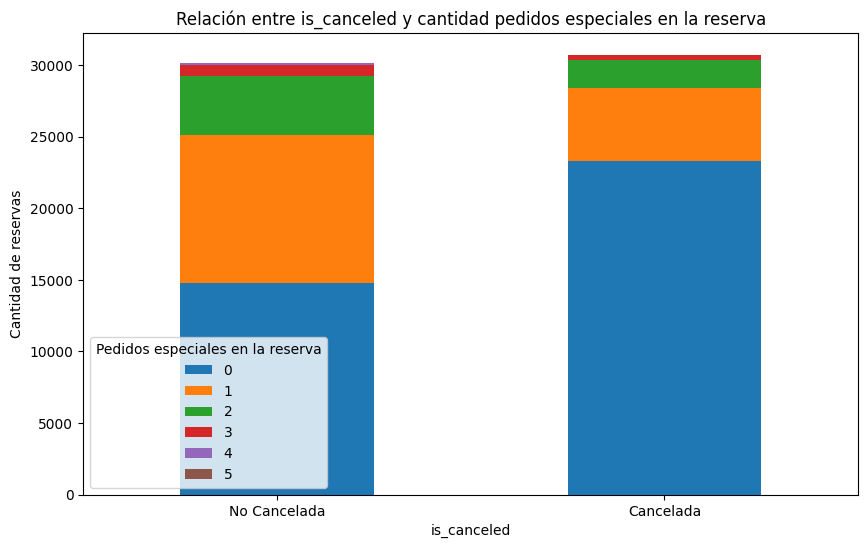

In [ ]:

pivot_special_request = ds_hoteles_train_limpio.groupby(['is_canceled', 'total_of_special_requests']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = pivot_special_request.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('is_canceled')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'], rotation=0)
plt.title('Relación entre is_canceled y cantidad pedidos especiales en la reserva')
plt.legend(title='Pedidos especiales en la reserva')
plt.show()

La inclusión de la variable "total special requests"  en nuestro análisis es muy importante, ya que nos permite entender cómo las solicitudes especiales de los huéspedes pueden estar relacionadas con las tasas de cancelación. Al analizar esta variable, podemos identificar si un mayor número de solicitudes especiales está relacionado con tasas de cancelación más altas o más bajas.
 Además, podemos explorar cómo esta variable se relaciona con otras, como el tipo de habitación o el país de origen del huésped, para comprender mejor cómo las solicitudes especiales afectan a diferentes segmentos de clientes y tomar decisiones más informadas sobre el analisis.


## Analisis de valores atipicos

Analicemos el boxplot

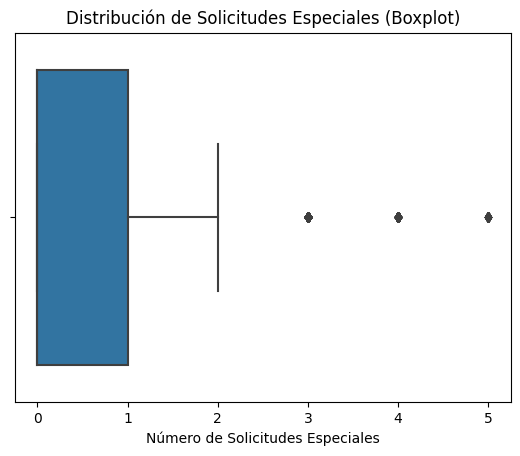

In [ ]:

sns.boxplot(x=ds_hoteles_train_limpio["total_of_special_requests"])


plt.xlabel('Número de Solicitudes Especiales')

plt.title('Distribución de Solicitudes Especiales (Boxplot)')


plt.show()

Veamos como se comportan los outliers que se pueden visualizar con el grafico

In [ ]:
outliers_pedidos_especiales = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["total_of_special_requests"] > 2) ]


outliers_pedidos_especiales

hotel  lead_time  arrival_date_year arrival_date_month  \
32     City Hotel        103               2017               July   
93     City Hotel         31               2017             August   
341    City Hotel         31               2016               June   
421    City Hotel         30               2017              April   
423    City Hotel        284               2017                May   
...           ...        ...                ...                ...   
61444  City Hotel        116               2017                May   
61564  City Hotel         56               2015            October   
61702  City Hotel        198               2016          September   
61818  City Hotel        252               2016            October   
61859  City Hotel        108               2017             August   

       arrival_date_week_number  arrival_date_day_of_month  \
32                           27                          3   
93                           33                         13   
341                          27                         26   
421                          18                         30   
423                          21                         23   
...                         ...                        ...   
61444                        21                         22   
61564                        43                         21   
61702                        39                         22   
61818                        43                         19   
61859                        33                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
32                           1                     2       2       0.0  ...   
93                           1                     0       2       1.0  ...   
341                          2                     4       3       0.0  ...   
421                          1                     0       2       0.0  ...   
423                          0                     5       2       1.0  ...   
...                        ...                   ...     ...       ...  ...   
61444                        1                     0       2       0.0  ...   
61564                        0                     3       2       0.0  ...   
61702                        0                     3       3       0.0  ...   
61818                        0                     3       2       0.0  ...   
61859                        0                     2       2       0.0  ...   

       deposit_type agent company days_in_waiting_list customer_type     adr  \
32       No Deposit   9.0      -1                    0         Group  169.20   
93       No Deposit   9.0      -1                    0     Transient  200.00   
341      No Deposit   7.0      -1                    0     Transient  112.14   
421      No Deposit   9.0      -1                    0     Transient  115.00   
423      No Deposit   9.0      -1                    0     Transient  134.55   
...             ...   ...     ...                  ...           ...     ...   
61444    No Deposit  14.0      -1                    0     Transient  126.00   
61564    No Deposit   9.0      -1                    0      Contract  103.50   
61702    No Deposit   9.0      -1                    0     Transient  159.30   
61818    No Deposit   9.0      -1                    0     Transient   85.50   
61859    No Deposit   9.0      -1                    0     Transient  125.00   

       required_car_parking_spaces  total_of_special_requests is_canceled  \
32                               0                          3           0   
93                               0                          3           0   
341                              0                          3           1   
421                              0                          3           0   
423                              0                          3           1   
...                            ...                    

Son 1319 reservas que son consideradas como reservas con pedidos atipicos ,veamos si podemos ver alguna relacion con su respectivas cancelaciones ,si la tienen

In [ ]:
outliers_pedidos_especiales['is_canceled'].value_counts()

0    965
1    354
Name: is_canceled, dtype: int64

Podemos notar que se recurre en mayor proporcion a la no cancelacion de las reservas,por lo cual podemos pensar que estos valores nos pueden servir para ver si tienen alguna relacion mas fuerte con la desicion del modelo

# 25) Variable RequiredCardParkingSpaces



## Analisis de datos y visualizaciones

Veamos los valores que toma la variable

In [ ]:
columna_parking_spaces.value_counts().reset_index()

index  required_car_parking_spaces
0      0                        58841
1      1                         3058
2      2                           12
3      8                            1
4      3                            1

Creare una copia de mi dataset donde dira se dividira si necesita o no lugar para parking,dado las pocas alternativas que existen asi puedo asociar tambien a un unico valor dado su poco volumen

In [ ]:
df_copia_parking = ds_hoteles_train_limpio.copy()

# Reemplazar 0 con 'No Requiere' y 1 o 2 con 'Requiere'
df_copia_parking['required_car_parking_spaces'] = df_copia_meal['required_car_parking_spaces'].replace({0: 'No Requiere', 1: 'Requiere', 2: 'Requiere', 3: "Requiere" , 8 : "Requiere"})


columna_parking_spaces_nueva = df_copia_parking['required_car_parking_spaces']

columna_parking_spaces_nueva.value_counts()

No Requiere    57868
Requiere        3028
Name: required_car_parking_spaces, dtype: int64

Veamos como se comporta con las cancelaciones,sobre todo las que requieren nos importan para ver su comportamiento

In [ ]:
ds_parking_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'Requiere']
ds_parking_no_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'No Requiere']

Comenecemos con los que no requiere

In [ ]:
ds_parking_no_requiere['is_canceled'].value_counts()

1    30728
0    27140
Name: is_canceled, dtype: int64

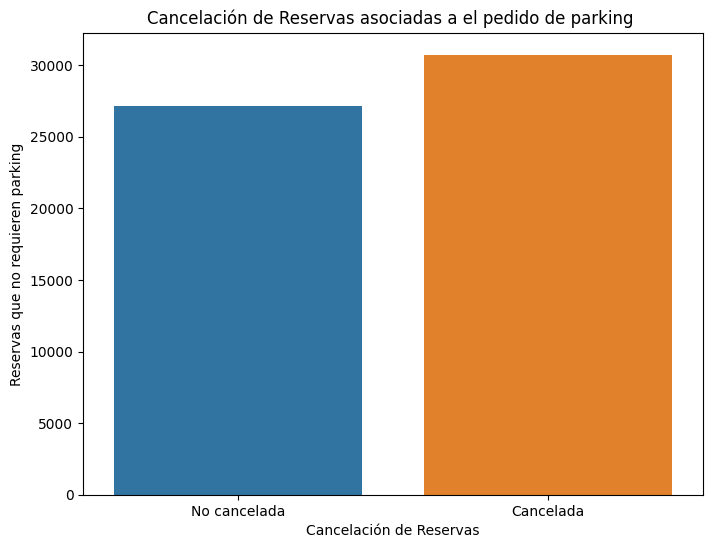

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_no_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que no requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Existe una mayor cantidad de reservas canceladas ,a simple vista podems notar que no es una gran diferencia,veamos las que si requerian que puede ser una variable mas significativa para el analisis

In [ ]:
ds_parking_requiere['is_canceled'].value_counts()

0    3028
Name: is_canceled, dtype: int64

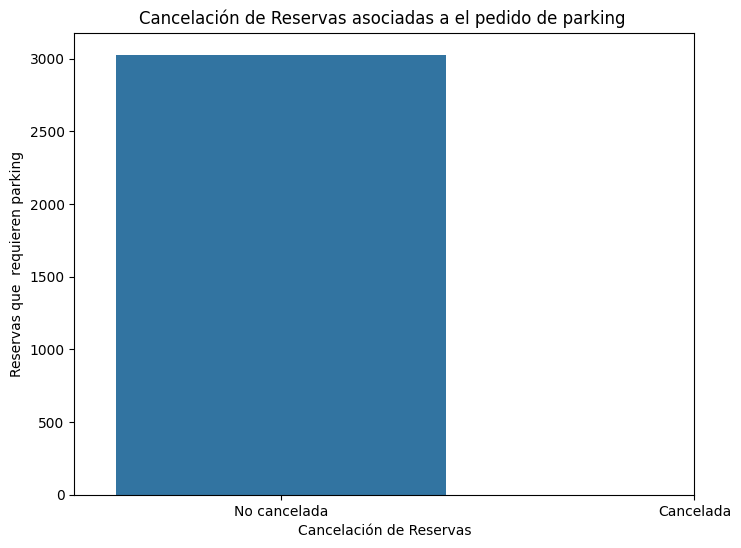

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que  requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Con respecto a las reservas con requerimiento de parking,notamos que ni una de ellas tuvo cancelacion,por lo cual hace que esta variable tenga mucho mas peso en nuestro analisis.
La tasa de cancelación para las reservas que requieren estacionamiento es igual a cero

La inclusión de la variable "required parking space"  en nuestro análisis es esencial, ya que nos permite entender cómo la necesidad de estacionamiento por parte de los huéspedes puede estar relacionada con las tasas de cancelación. Al analizar esta variable, podemos identificar si la solicitud de un espacio de estacionamiento influye en tasas de cancelación más altas o más bajas.
Por otro lado, podemos explorar cómo esta variable se relaciona con otras, como el tipo de habitación o la duración de la estancia, para comprender mejor cómo las solicitudes de estacionamiento impactan en la experiencia del cliente.

## Analisis de valores atipicos

Analicemos el boxplot,sin tener en cuenta el caso donde fueron 0,porque sino todos los valores restantes seran atipicos

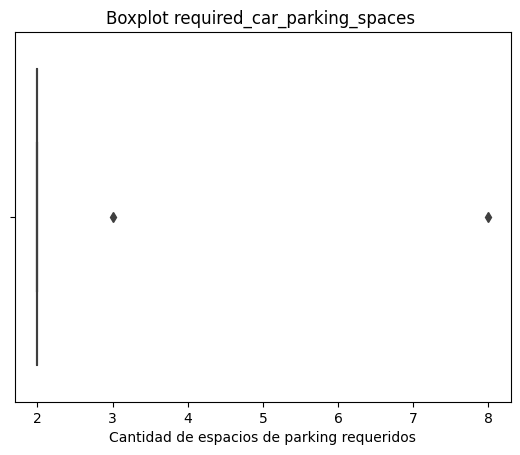

In [ ]:
ds_sin_parking= ds_hoteles_train_limpio[ds_hoteles_train_limpio["required_car_parking_spaces"] >1]

sns.boxplot(x=ds_sin_parking["required_car_parking_spaces"])
plt.title('Boxplot required_car_parking_spaces ')
plt.xlabel('Cantidad de espacios de parking requeridos')
plt.show()

Sin incluir al 0 ya podemos ver que los valores 3 y 8 son valores atipicos,por lo cual analicemos a ellos

Donde se deberia comprender a los valores > 10 como outliers severos ,veamos como se comportan ellos

In [ ]:
outliers_parking = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["required_car_parking_spaces"] > 2) ]


outliers_parking

hotel  lead_time  arrival_date_year arrival_date_month  \
8269   Resort Hotel        138               2017              March   
13713  Resort Hotel        205               2017               June   

       arrival_date_week_number  arrival_date_day_of_month  \
8269                         12                         19   
13713                        26                         26   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
8269                         2                     2       2       0.0  ...   
13713                        3                    10       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
8269     No Deposit     -1      -1                  122  Transient-Party   
13713    No Deposit  250.0      -1                    0        Transient   

         adr  required_car_parking_spaces  total_of_special_requests  \
8269    80.0                            8                          0   
13713  111.0                            3                          0   

      is_canceled Estado de la reserva  
8269            0         No Cancelada  
13713           0         No Cancelada  

[2 rows x 31 columns]

Los dos casos no fueron cancelados,por lo cual podemos utilizarlos para poder mejorar nuestro modelo predictivo,ya que si nesecitan mas de 2 lugares de estacionamientos,no suelen cancelar.

Vamos a visualizar ya que no tenemos mucho para decir de manera univariada,que pasa si vemos como se comporta con la variable adults

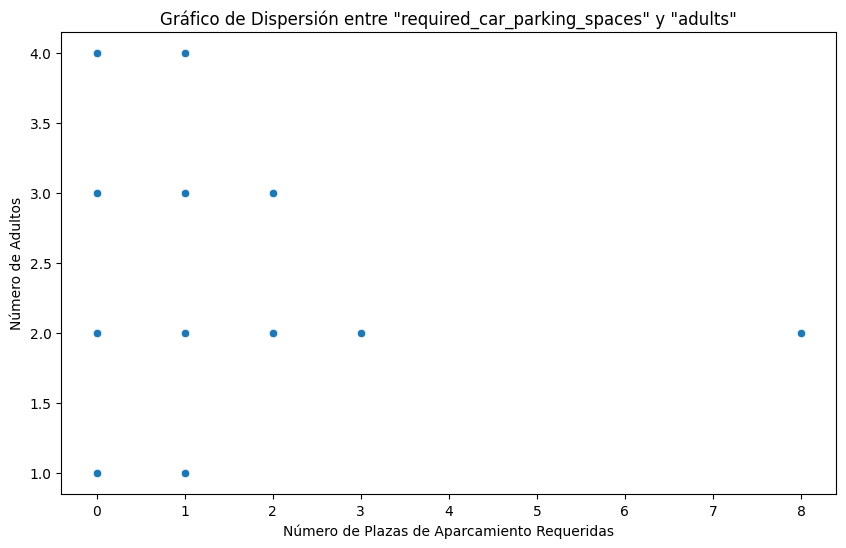

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds_hoteles_train_limpio, x='required_car_parking_spaces', y='adults')

plt.title('Gráfico de Dispersión entre "required_car_parking_spaces" y "adults"')
plt.xlabel('Número de Plazas de Aparcamiento Requeridas')
plt.ylabel('Número de Adultos')

# Mostrar el gráfico
plt.show()

Podemos notar como la reserva que requiere 8 espacios en forma multivariada tambien es un outlier severo,ya que son 2 adultos para 8 espacios de parking;lo que nos hace pensar que esa reserva puede que no se tenga en cuenta

# 26 y 27) Variable StaysInWeekNights y StaysInWeekendNights

## Stays-in-week-nights

Es una variable cuantitativa que describe el número de noches entre semana (de lunes a viernes)que el huésped se quedó o reservó su estadía en el hotel.
Vamos a buscar una posible relación entre esta variable con la variable "is_canceled".

### Analisis de datos y visualizaciones
Veamos las medidas de resumen de esta variable

In [ ]:
columna_weekNights.describe()

count    61913.000000
mean         2.510054
std          1.884926
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

Veamos en un boxplot estos datos

Text(0.5, 1.0, 'Boxplot Stays in week nights')

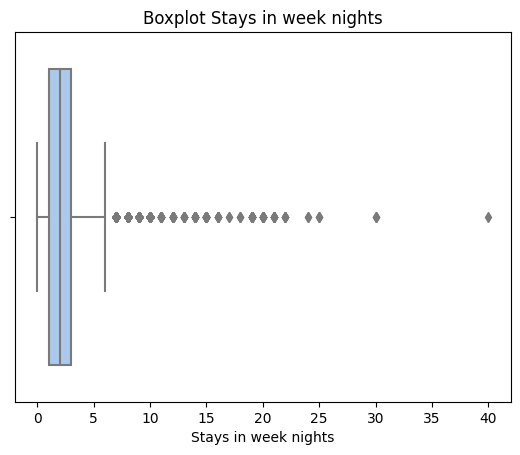

In [ ]:
sns.boxplot(x = columna_weekNights, palette = "pastel")
plt.xlabel('Stays in week nights')

plt.title("Boxplot Stays in week nights")

Podemos notar que existen valores que son atipicos en un analisis univariado,tanto el caso del valor 30 y 40 podemos notar que estan muy alejados del Boxplot.

Analicemos variando si las reservas fueron canceladas o no,sin tener en cuenta esas reservas que su valor es 0(no tienen reservas en dia de semana)

In [ ]:
reservas_canceladas = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_canceled'] == 1]
reservas_no_canceladas = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_canceled'] == 0]

In [ ]:
columna_reservas_canceladas_noches_semana = reservas_canceladas['stays_in_week_nights']

columna_reservas_canceladas_noches_semana = columna_reservas_canceladas_noches_semana[columna_reservas_canceladas_noches_semana != 0]

columna_reservas_canceladas_noches_semana.value_counts()

2     10304
1      6827
3      5910
5      2728
4      2423
6       403
7       229
10      200
8       156
9        66
15       33
14       21
11       20
12       19
19       17
20       12
16        9
21        9
22        6
13        5
18        3
17        2
24        2
40        1
30        1
Name: stays_in_week_nights, dtype: int64

In [ ]:
columna_reservas_canceladas_noches_semana.describe()

count    29406.000000
mean         2.682990
std          1.848181
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

Podemos ver que :


* Hay un total de 29406 reservas canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas canceladas es aproximadamente 2 a 3 noches.

*   La desviación estándar es aproximadamente 1.84, lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.




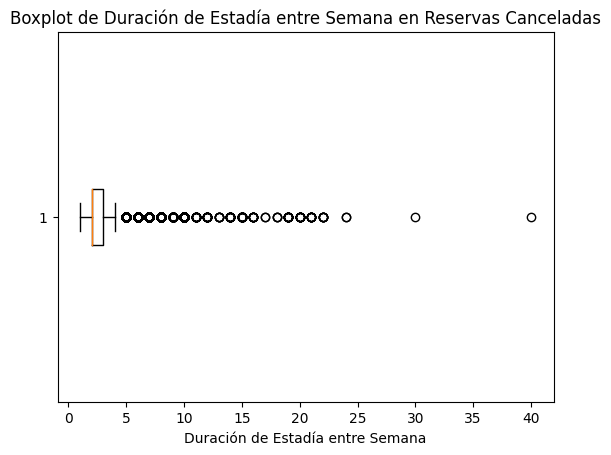

In [ ]:
plt.boxplot(columna_reservas_canceladas_noches_semana, vert=False)


plt.xlabel('Duración de Estadía entre Semana')
plt.title('Boxplot de Duración de Estadía entre Semana en Reservas Canceladas')

plt.show()

Veamos respecto de las no canceladas

In [ ]:
columna_reservas_no_canceladas_noches_semana = reservas_no_canceladas['stays_in_week_nights']

columna_reservas_no_canceladas_noches_semana = columna_reservas_no_canceladas_noches_semana[columna_reservas_no_canceladas_noches_semana != 0]

columna_reservas_no_canceladas_noches_semana.value_counts()

1     8304
2     7559
3     5597
5     2904
4     2507
6      386
10     305
7      295
8      185
9       54
15      15
12       9
20       8
11       6
13       6
19       6
25       3
30       2
14       2
Name: stays_in_week_nights, dtype: int64

In [ ]:
columna_reservas_no_canceladas_noches_semana.describe()

count    28153.000000
mean         2.666572
std          1.811180
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: stays_in_week_nights, dtype: float64

Podemos ver que :


* Hay un total de 28154reservas no canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 2.66 noches.

*   La desviación estándar es aproximadamente 1.81, lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.

Los datos son muy similares a los que la reserva fue cancelada




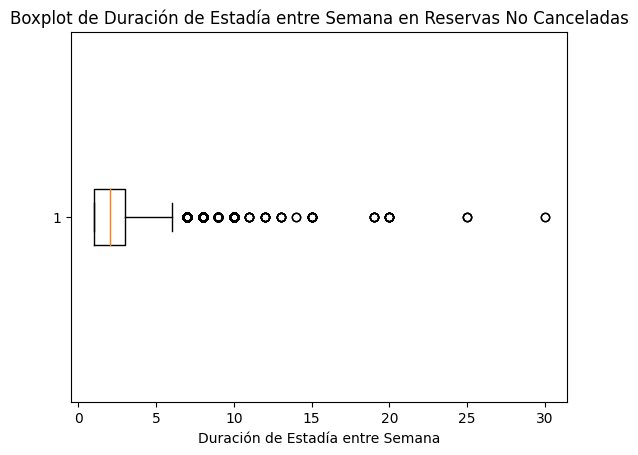

In [ ]:
plt.boxplot(columna_reservas_no_canceladas_noches_semana, vert=False)


plt.xlabel('Duración de Estadía entre Semana')
plt.title('Boxplot de Duración de Estadía entre Semana en Reservas No Canceladas')

plt.show()

### Analisis de valores atipicos

Analicemos el boxplot

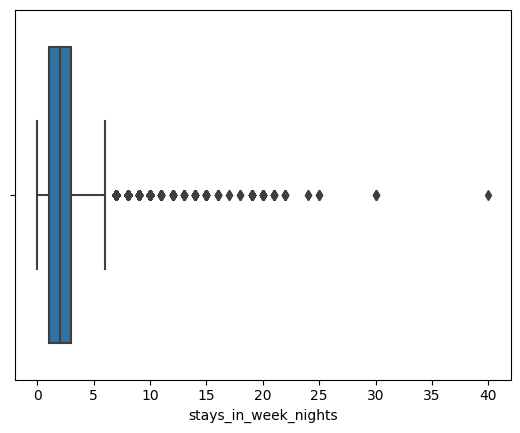

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["stays_in_week_nights"])
plt.show()

Analicemos en forma univariada

In [ ]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["stays_in_week_nights"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["stays_in_week_nights"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica los outliers en el DataFrame
outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["stays_in_week_nights"] < lower_limit) | (ds_hoteles_train_limpio["stays_in_week_nights"] > upper_limit)]

upper_limit


6.0

El limite superior se encuentra en 6,por lo cual aquellos valores que se encuentran por arriba de ese valor son considerados outliers

In [ ]:
outliers

hotel  lead_time  arrival_date_year arrival_date_month  \
6      Resort Hotel        112               2015           November   
94       City Hotel        191               2017               June   
169      City Hotel         14               2016              March   
191      City Hotel        237               2017               July   
194    Resort Hotel         37               2015             August   
...             ...        ...                ...                ...   
61747  Resort Hotel        321               2017              March   
61750    City Hotel         64               2017              March   
61840  Resort Hotel         31               2015           November   
61865  Resort Hotel        153               2015          September   
61881    City Hotel         32               2017              March   

       arrival_date_week_number  arrival_date_day_of_month  \
6                            46                         12   
94                           24                         17   
169                          10                          4   
191                          27                          3   
194                          35                         24   
...                         ...                        ...   
61747                        10                          8   
61750                        11                         15   
61840                        45                          2   
61865                        38                         17   
61881                        10                         10   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
6                            4                     9       2       0.0  ...   
94                           4                     8       2       0.0  ...   
169                          2                     7       2       0.0  ...   
191                          3                     8       2       0.0  ...   
194                          3                     7       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61747                        4                    10       2       0.0  ...   
61750                        2                     8       1       0.0  ...   
61840                        5                    11       1       0.0  ...   
61865                        4                    10       2       0.0  ...   
61881                        2                     7       3       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
6        No Deposit  314.0      -1                    0         Contract   
94       No Deposit    9.0      -1                    0        Transient   
169      No Deposit    9.0      -1                    0        Transient   
191      No Deposit    9.0      -1                    0        Transient   
194      No Deposit  175.0      -1                    0        Transient   
...             ...    ...     ...                  ...              ...   
61747    No Deposit  240.0      -1                    0        Transient   
61750    No Deposit    8.0      -1                    0        Transient   
61840    No Deposit  281.0      -1                    0  Transient-Party   
61865    No Deposit  243.0      -1                    0         Contract   
61881    No Deposit    9.0      -1                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
6       66.42                            0                          1   
94     130.50                            0                          1   
169    132.33                            0                          0   
191    107.10                            0                          2   
194    133.76                            0                          0   
...       ...                          ...                        ...   
61747   66.60                  

1707 valores de estadias en dias de semana ,lo cual ,segun el conteto,podemos decir que ningun valor puede ser considerado 'atipico' en reservas de hotel

Veamos como se comportan los outliers mas severos del boxplot,es decir aquellos que su valor supera los 20

In [ ]:
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["stays_in_week_nights"] >20 )]

outliers_severos

hotel  lead_time  arrival_date_year arrival_date_month  \
5295   Resort Hotel        182               2017              March   
6423     City Hotel          9               2017            January   
9229   Resort Hotel         13               2016              April   
12477  Resort Hotel         73               2017            January   
14236    City Hotel         25               2015           November   
20153    City Hotel         13               2016           February   
22599    City Hotel         21               2016            January   
30395  Resort Hotel         88               2017            January   
31310  Resort Hotel        322               2017            January   
31408  Resort Hotel         59               2016           November   
35851    City Hotel         28               2016           February   
40633    City Hotel         10               2016            January   
43265    City Hotel         11               2016           February   
43667  Resort Hotel        242               2017           February   
47054    City Hotel          1               2016           February   
47601    City Hotel          3               2016           November   
53537    City Hotel          9               2017            January   
54391  Resort Hotel        122               2016            January   
56508    City Hotel         41               2017            January   
57428  Resort Hotel        214               2016            January   
58278    City Hotel         30               2017            January   
59231    City Hotel         13               2017            January   
60483  Resort Hotel        192               2017            January   
61043    City Hotel         65               2016           November   

       arrival_date_week_number  arrival_date_day_of_month  \
5295                          9                          1   
6423                          4                         27   
9229                         18                         25   
12477                         4                         27   
14236                        49                         30   
20153                         6                          3   
22599                         2                          8   
30395                         4                         24   
31310                         2                         10   
31408                        46                         12   
35851                         7                         12   
40633                         3                         15   
43265                         7                         13   
43667                         7                         17   
47054                         6                          3   
47601                        47                         14   
53537                         1                          5   
54391                         3                         12   
56508                         1                          5   
57428                         5                         26   
58278                         1                          7   
59231                         4                         24   
60483                         2                         14   
61043                        47                         19   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
5295                         8                    22       2       2.0  ...   
6423                         8                    21       3       0.0  ...   
9229                         9                    24       2       0.0  ...   
12477                        8                    21       1       0.0  ...   
14236                        9                    24       2       0.0  ...   
20153                        8                    21       1       0.0  ...   
22599                        8                    22       2       0.0  ...   
30395                       10

In [ ]:
outliers_severos['is_canceled'].value_counts()

1    19
0     5
Name: is_canceled, dtype: int64

Podemos notar que a mayor cantidad de dias,tienden a cancelar la reserva por lo cual es importante tener estos datos en el analisis

## StaysInWeekendNights


### Analisis de datos y visualizaciones
Veamos las medidas de resumen de la variable

In [ ]:
columna_weekendNights.describe()

count    61913.000000
mean         0.924135
std          0.993101
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

Veamos en un boxplot estos datos

Text(0.5, 1.0, 'Boxplot Stays in weekend nights')

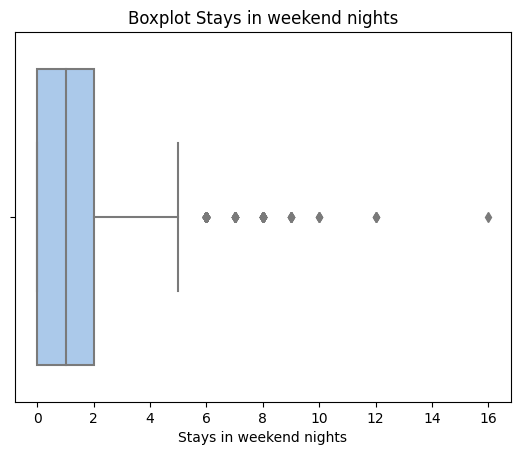

In [ ]:
sns.boxplot(x = columna_weekendNights, palette = "pastel")
plt.xlabel('Stays in weekend nights')

plt.title("Boxplot Stays in weekend nights")

In [ ]:
columna_reservas_canceladas_noches_fin_de_semana = reservas_canceladas['stays_in_weekend_nights']

columna_reservas_canceladas_noches_fin_de_semana = columna_reservas_canceladas_noches_fin_de_semana[columna_reservas_canceladas_noches_fin_de_semana != 0]

columna_reservas_canceladas_noches_fin_de_semana.value_counts()

2     8666
1     7718
4      409
3      313
6       59
5       28
8       26
7       12
9        5
10       1
16       1
12       1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
columna_reservas_canceladas_noches_fin_de_semana.describe()

count    17239.000000
mean         1.652880
std          0.785161
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

Podemos ver que :


* Hay un total de 17239 reservas canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 1  a 2 noches.

*   La desviación estándar es aproximadamente 0,78 , lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.

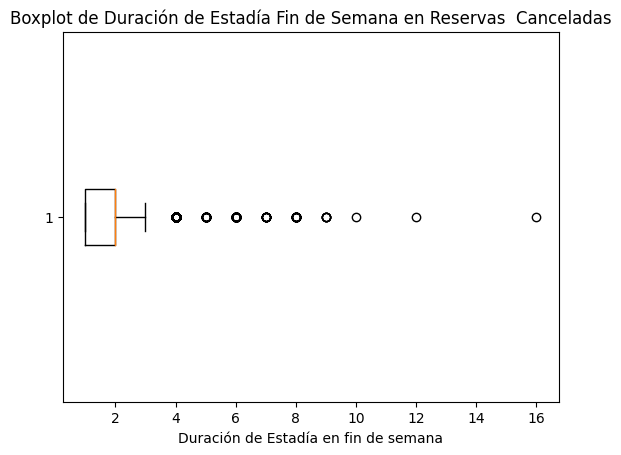

In [ ]:
plt.boxplot(columna_reservas_canceladas_noches_fin_de_semana,vert= False)

plt.xlabel('Duración de Estadía en fin de semana')
plt.title('Boxplot de Duración de Estadía Fin de Semana en Reservas  Canceladas')

plt.show()

Veamos las no canceladas

In [ ]:
columna_reservas_no_canceladas_noches_fin_de_semana = reservas_no_canceladas['stays_in_weekend_nights']
columna_reservas_no_canceladas_noches_fin_de_semana = columna_reservas_no_canceladas_noches_fin_de_semana[columna_reservas_no_canceladas_noches_fin_de_semana != 0]

columna_reservas_no_canceladas_noches_fin_de_semana.value_counts()

2     8463
1     7974
4      519
3      314
6       23
5       14
8        8
10       2
12       2
7        1
9        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
columna_reservas_no_canceladas_noches_fin_de_semana.describe()

count    17321.000000
mean         1.630968
std          0.728390
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: stays_in_weekend_nights, dtype: float64

Podemos ver que :


* Hay un total de 17322 reservas no canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 1 a 2 noches.

*   La desviación estándar es aproximadamente 0.72, lo que indica una dispersión moderada alrededor de la media.

Los datos son muy similares a los que la reserva fue cancelada

Por ultimo juntaremos las dos variables para poder ver como varia las cancelaciones con la cantidad de dias totales.La hipotesis es que a medida que las estadias,son de menores dias,hay mas probabilidad de que se cancelen,dado que pueden ser reservas por trabajo y las que tienen mas dias conllevan a una planificacion mas concreta

Juntemos las variables en una copia



### Analisis de valores atipicos

Analicemos el boxplot

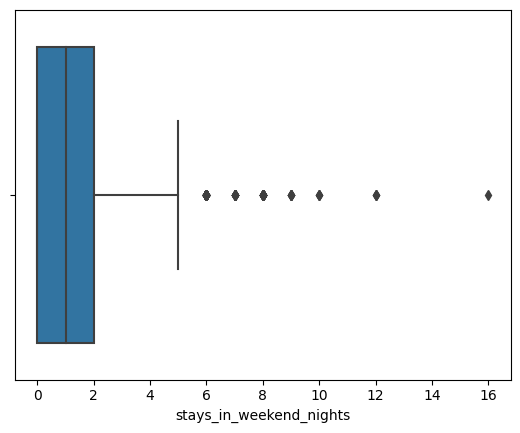

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["stays_in_weekend_nights"])
plt.show()

Analicemos en forma univariada

In [ ]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["stays_in_weekend_nights"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["stays_in_weekend_nights"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica los outliers en el DataFrame
outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["stays_in_weekend_nights"] < lower_limit) | (ds_hoteles_train_limpio["stays_in_weekend_nights"] > upper_limit)]

upper_limit


5.0

El limite superior se encuentra en 5,por lo cual aquellos valores que se encuentran por arriba de ese valor son considerados outliers

In [ ]:
outliers

hotel  lead_time  arrival_date_year arrival_date_month  \
454    Resort Hotel        181               2017              March   
1321   Resort Hotel        162               2016              March   
1433     City Hotel          9               2016            January   
1930   Resort Hotel        203               2016               July   
2963   Resort Hotel        194               2017              April   
...             ...        ...                ...                ...   
60483  Resort Hotel        192               2017            January   
60607  Resort Hotel        172               2016            January   
61043    City Hotel         65               2016           November   
61044  Resort Hotel         98               2017           February   
61210  Resort Hotel        159               2017              March   

       arrival_date_week_number  arrival_date_day_of_month  \
454                           9                          1   
1321                         10                          4   
1433                          5                         28   
1930                         29                         16   
2963                         15                         15   
...                         ...                        ...   
60483                         2                         14   
60607                         3                         12   
61043                        47                         19   
61044                         6                          8   
61210                        11                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
454                          6                    19       2       0.0  ...   
1321                         6                    15       2       0.0  ...   
1433                         6                    17       1       0.0  ...   
1930                         6                    12       2       2.0  ...   
2963                         6                    15       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
60483                       10                    25       2       0.0  ...   
60607                        8                    20       2       0.0  ...   
61043                        8                    21       2       2.0  ...   
61044                        6                    15       2       0.0  ...   
61210                        6                    15       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
454      No Deposit  440.0      -1                    0  Transient-Party   
1321     Non Refund   96.0      -1                    0        Transient   
1433     No Deposit    9.0      -1                    0        Transient   
1930     No Deposit  240.0      -1                    0        Transient   
2963     No Deposit     -1      -1                    0        Transient   
...             ...    ...     ...                  ...              ...   
60483    No Deposit    6.0      -1                    0        Transient   
60607    No Deposit  314.0      -1                    0         Contract   
61043    No Deposit    9.0      -1                    0        Transient   
61044    No Deposit   96.0      -1                    0        Transient   
61210    No Deposit   75.0      -1                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
454     58.60                            0                          0   
1321    82.00                            0                          0   
1433    68.23                            0                          1   
1930   204.44                            0                          0   
2963    47.50                            0                          2   
...       ...                          ...                        ...   
60483   34.00                  

142 valores de estadias en dias de fin de semana ,lo cual ,segun el conteto,podemos decir que ningun valor puede ser considerado 'atipico' en reservas de hotel

Veamos como se comportan los outliers mas severos del boxplot,es decir aquellos que su valor supera los 8

In [ ]:
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["stays_in_weekend_nights"] >8  )]

outliers_severos

hotel  lead_time  arrival_date_year arrival_date_month  \
3855     City Hotel        123               2017            January   
9229   Resort Hotel         13               2016              April   
14236    City Hotel         25               2015           November   
18816    City Hotel         12               2016           February   
30395  Resort Hotel         88               2017            January   
31310  Resort Hotel        322               2017            January   
31408  Resort Hotel         59               2016           November   
43667  Resort Hotel        242               2017           February   
47601    City Hotel          3               2016           November   
54391  Resort Hotel        122               2016            January   
56096    City Hotel         12               2016           February   
57428  Resort Hotel        214               2016            January   
60483  Resort Hotel        192               2017            January   

       arrival_date_week_number  arrival_date_day_of_month  \
3855                          3                         15   
9229                         18                         25   
14236                        49                         30   
18816                         6                          1   
30395                         4                         24   
31310                         2                         10   
31408                        46                         12   
43667                         7                         17   
47601                        47                         14   
54391                         3                         12   
56096                         9                         22   
57428                         5                         26   
60483                         2                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
3855                        10                    20       3       0.0  ...   
9229                         9                    24       2       0.0  ...   
14236                        9                    24       2       0.0  ...   
18816                        9                    20       1       0.0  ...   
30395                       10                    25       2       0.0  ...   
31310                       16                    40       2       0.0  ...   
31408                        9                    21       1       0.0  ...   
43667                       12                    30       2       0.0  ...   
47601                        9                    25       2       0.0  ...   
54391                       12                    30       2       0.0  ...   
56096                        9                    20       2       0.0  ...   
57428                       12                    30       2       0.0  ...   
60483                       10                    25       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
3855     No Deposit    9.0      -1                    0     Transient  140.00   
9229     No Deposit     -1   110.0                    0     Transient   77.00   
14236    No Deposit     -1      -1                    0     Transient   98.33   
18816    No Deposit    9.0      -1                    0     Transient   63.03   
30395    No Deposit     -1      -1                    0     Transient   41.47   
31310    No Deposit    8.0      -1                    0     Transient   25.50   
31408    No Deposit  240.0      -1                    0     Transient   37.70   
43667    No Deposit   75.0      -1                    0     Transient   35.70   
47601    No Deposit     -1   368.0                    0     Transient   93.00   
54391    No Deposit    8.0      -1                    0     Transient   22.11   
56096    No Deposit    9.0      -1                    0     Transient  102.81   
57428    No Deposit    8.0      -1                    0  

In [ ]:
outliers_severos['is_canceled'].value_counts()

1    8
0    5
Name: is_canceled, dtype: int64

No existe una gran relacion entre los valores y sus posibles cancelaciones,aun asi ,son posibles valores por lo cual vamos a dejarlos en nuestro analisis



---

# 28) Variable Previous Cancellations



## Analisis de datos y visualizaciones
Veamos las medidas de resumen de esta variable cuantitativa

In [ ]:
ds_hoteles_train_limpio["previous_cancellations"].describe()

count    60896.000000
mean         0.114983
std          0.999539
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

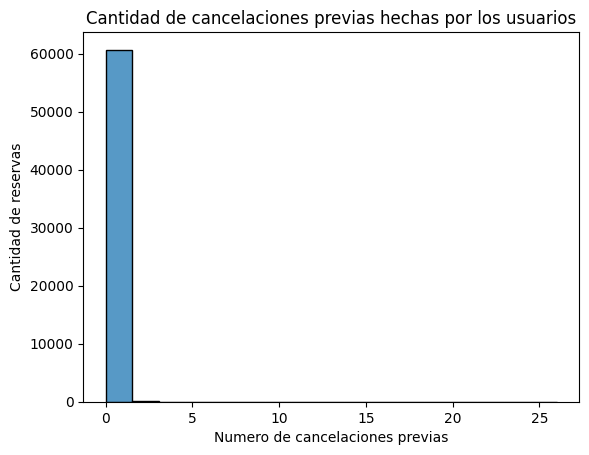

In [ ]:
sns.histplot(data = ds_hoteles_train_limpio, x = "previous_cancellations")
plt.xlabel('Numero de cancelaciones previas')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de cancelaciones previas hechas por los usuarios')
plt.show()

Podemos observar que la amplia mayoria de los usuarios registrados en el dataset no han hecho cancelaciones previas. A primera vista no parece una variable que podria llegar a determinar si una reserva va a ser cancelada o no. Observemos mas detalladamente aquellos usuarios que si han hecho cancelaciones previas

In [ ]:
ds_cancelaciones_mayores_a_0 = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio["previous_cancellations"] > 0 ]
ds_cancelaciones_mayores_a_0.shape

(4342, 31)

In [ ]:
ds_cancelaciones_mayores_a_0["Estado de la reserva"].value_counts()

Cancelada       4144
No Cancelada     198
Name: Estado de la reserva, dtype: int64

Si bien es un caso mas particular, podemos concluir que si un usuario ha hecho previas cancelaciones, es probable que cancele la reserva del hotel

La inclusión de la variable "cancelaciones previas" en nuestro análisis demuestra una importancia fundamental. Esta variable nos brinda la oportunidad de comprender la posible relación entre las cancelaciones previas por parte de los huéspedes y las cancelaciones futuras. Al examinar esta variable, podemos detectar si existe una mayor probabilidad de que los huéspedes que han cancelado en el pasado vuelvan a hacerlo.
Asimismo, podemos explorar cómo esta variable se entrelaza con otras, como la duración de la estadía o el tipo de habitación, para obtener una comprensión más profunda sobre cómo las experiencias pasadas de los huéspedes influyen en su comportamiento.

## Analisis de valores atipicos

Analicemos el boxplot,sin tener en cuenta el caso donde fueron 0

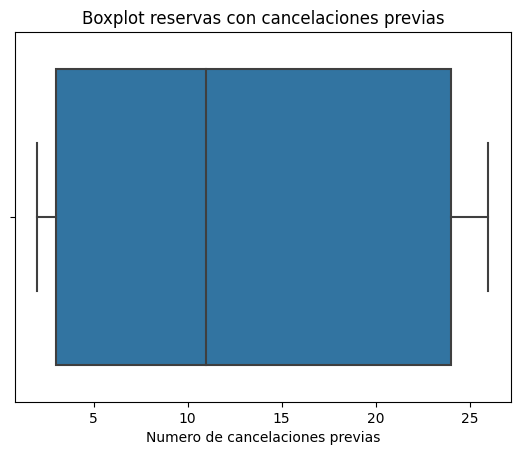

In [ ]:
ds_sin_cancelaciones= ds_hoteles_train_limpio[ds_hoteles_train_limpio["previous_cancellations"] >1]

sns.boxplot(x=ds_sin_cancelaciones["previous_cancellations"])

plt.title('Boxplot reservas con cancelaciones previas')
plt.xlabel('Numero de cancelaciones previas')
plt.show()

Analicemos en forma univariada,que sin tener en cuenta el valor 0 ,no se hallan problemas de outliers ,pero veamos como aparecen si lo incluimos

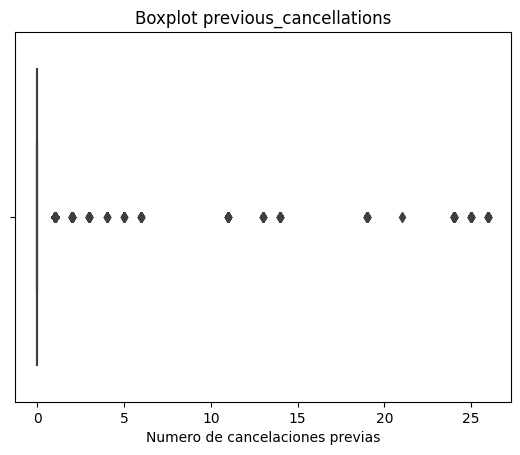

In [ ]:
sns.boxplot(x=ds_hoteles_train_limpio["previous_cancellations"])

plt.title('Boxplot previous_cancellations')
plt.xlabel('Numero de cancelaciones previas')
plt.show()

Donde se deberia comprender a los valores > 10 como outliers severos ,veamos como se comportan ellos

In [ ]:
outliers_cancelaciones = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["previous_cancellations"] > 10) ]


outliers_cancelaciones

hotel  lead_time  arrival_date_year arrival_date_month  \
152    Resort Hotel        275               2015            October   
337    Resort Hotel        244               2015          September   
802    Resort Hotel        275               2015            October   
1579     City Hotel        190               2016              April   
1640   Resort Hotel        222               2015          September   
...             ...        ...                ...                ...   
59002  Resort Hotel        244               2015          September   
59717  Resort Hotel        265               2015          September   
59761  Resort Hotel        244               2015          September   
59879    City Hotel          1               2015           December   
60138  Resort Hotel        222               2015          September   

       arrival_date_week_number  arrival_date_day_of_month  \
152                          41                          4   
337                          36                          3   
802                          41                          4   
1579                         15                          9   
1640                         38                         15   
...                         ...                        ...   
59002                        36                          3   
59717                        39                         24   
59761                        36                          2   
59879                        52                         24   
60138                        38                         15   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
152                          2                     0       2       0.0  ...   
337                          0                     3       2       0.0  ...   
802                          2                     0       2       0.0  ...   
1579                         1                     1       2       0.0  ...   
1640                         1                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
59002                        0                     3       2       0.0  ...   
59717                        1                     3       2       0.0  ...   
59761                        2                     5       2       0.0  ...   
59879                        0                     1       2       0.0  ...   
60138                        1                     5       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
152      Non Refund  208.0      -1                    0        Transient   
337      Non Refund     -1      -1                    0        Transient   
802      Non Refund  208.0      -1                    0        Transient   
1579     No Deposit     -1      -1                   31  Transient-Party   
1640     Non Refund  252.0      -1                    0        Transient   
...             ...    ...     ...                  ...              ...   
59002    Non Refund     -1      -1                    0        Transient   
59717    Non Refund  183.0      -1                    0        Transient   
59761    No Deposit   96.0      -1                    0  Transient-Party   
59879    No Deposit     -1      -1                    0        Transient   
60138    Non Refund  252.0      -1                    0        Transient   

         adr  required_car_parking_spaces  total_of_special_requests  \
152    50.00                            0                          0   
337    36.00                            0                          0   
802    50.00                            0                          0   
1579   70.00                            0                          0   
1640   49.95                            0                          0   
...      ...                          ...                        ...   
59002  36.00                          

Son 125 casos los outliers severos,pero dentro de los otros casos pasan a ser insignificantes en cantidad,por lo cual los dejaremos .



---

# 29) Variable Reserved Room Type


## Analisis de datos y visualizaciones

Veamos los valores que toma la variable

In [ ]:
columna_reserved_room_type = ds_hoteles_train_limpio['reserved_room_type']

columna_reserved_room_type.value_counts().reset_index()

index  reserved_room_type
0     A               44469
1     D                9508
2     E                3194
3     F                1413
4     G                1049
5     C                 472
6     B                 456
7     H                 334
8     L                   1

Notamos que la mayoria de las reservas esta asociada al tipo de habitacion 'A'

Busquemos ahora la relación de cada tipo de habitación con la variable target, para encontrar con qué frecuencia se suele cancelar la reserva según el tipo de habitación reservada

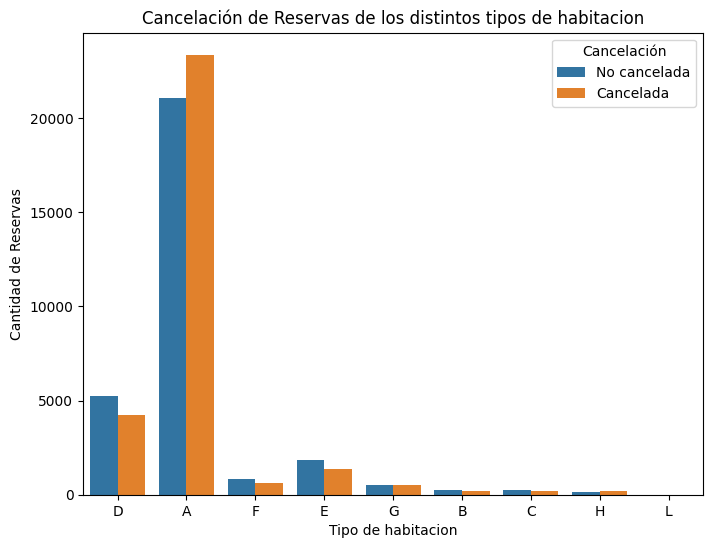

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='reserved_room_type' , hue= 'is_canceled')
plt.xlabel('Tipo de habitacion')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas de los distintos tipos de habitacion')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Dada la informacion que nos proporciona el grafico,las reservas canceladas por el tipo de hotel,tienen una varianza significativa,no se encuentra a simple vista ningun patron significativo para poder declarar una hipotesis

La variable "reserved room type" desempeña un papel fundamental en nuestro análisis debido a la posibilidad de que el hotel pueda modificar esta elección y asignar una habitación diferente a los huéspedes. Al considerar esta variable en nuestro análisis, podemos investigar cómo las decisiones del hotel para cambiar el tipo de habitación reservado pueden estar vinculadas a las cancelaciones. Esto nos permitirá comprender si los cambios realizados por el hotel en la asignación de habitaciones tienen un impacto en la probabilidad de que los huéspedes cancelen sus reservas.



---


#B) Correlación entre variables

En esta sección analizaremos correlaciones entre distintas variables, a partir del análisis que hicimos en la sección anterior.

<ipython-input-572-605d9a0b56f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ds_hoteles_train_limpio.corr(method = 'pearson')


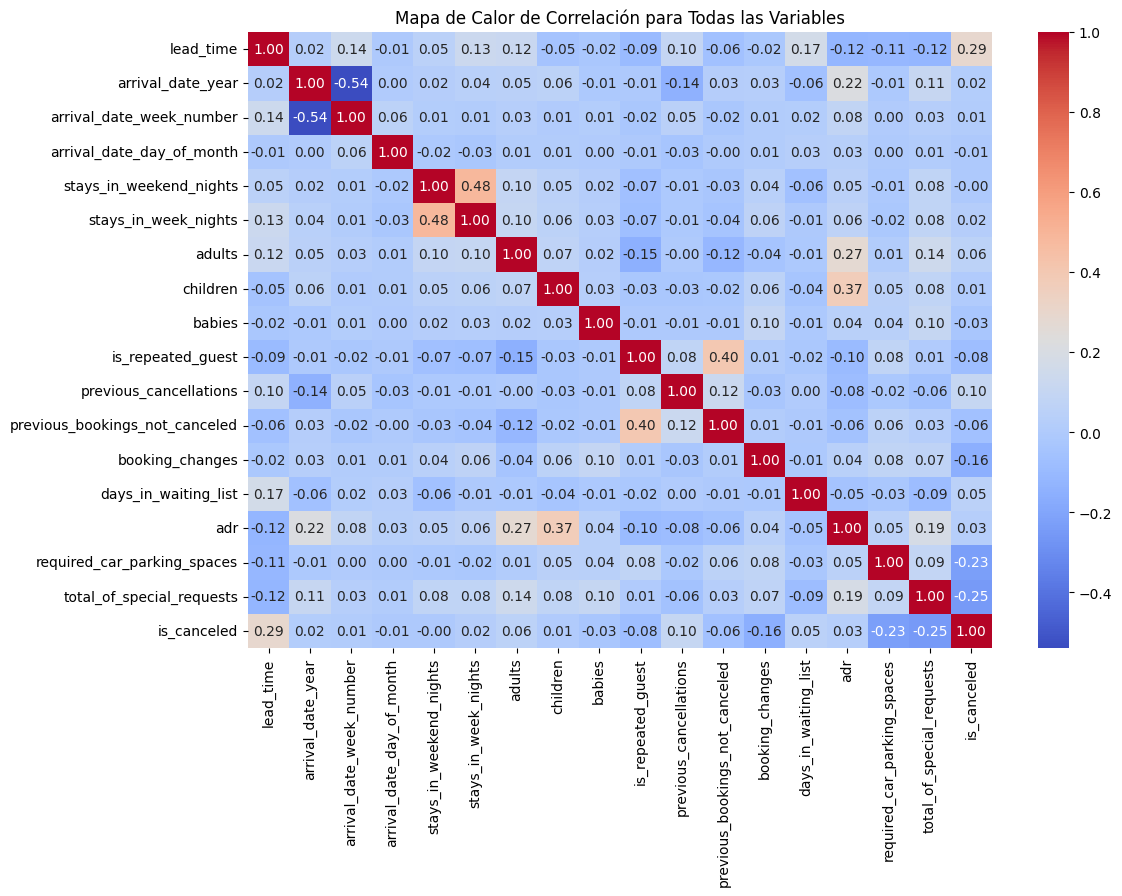

In [ ]:
# Heatmap de correlación para todas las variables
correlation_matrix = ds_hoteles_train_limpio.corr(method = 'pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación para Todas las Variables")
plt.show()

In [ ]:
correlacion = ds_hoteles_train_limpio.corr(method = 'pearson')
print(correlacion['is_canceled'].abs().sort_values(ascending=False))

is_canceled                       1.000000
lead_time                         0.290936
total_of_special_requests         0.247853
required_car_parking_spaces       0.228338
booking_changes                   0.157882
previous_cancellations            0.099920
is_repeated_guest                 0.079453
previous_bookings_not_canceled    0.063478
adults                            0.059374
days_in_waiting_list              0.050542
babies                            0.033082
adr                               0.030058
stays_in_week_nights              0.021029
arrival_date_year                 0.016863
arrival_date_week_number          0.010492
arrival_date_day_of_month         0.007594
children                          0.005979
stays_in_weekend_nights           0.004592
Name: is_canceled, dtype: float64


<ipython-input-573-fb572ca10b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = ds_hoteles_train_limpio.corr(method = 'pearson')


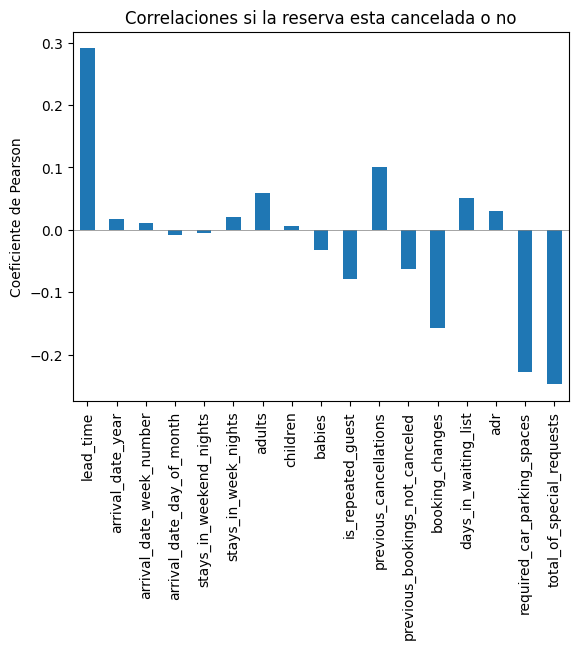

In [ ]:
cor = correlation_matrix.drop('is_canceled')
cor['is_canceled'].plot(kind = 'bar')
plt.title('Correlaciones si la reserva esta cancelada o no')
plt.ylabel('Coeficiente de Pearson')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.show()

### Relación entre 'lead_time' y 'is_canceled':

Veamos como se comporta lead time ,dado si una reserva se cancelo o no.

Analizaremos si el tiempo de anticipación con el que se realiza una reserva (lead_time) está relacionado con la probabilidad de cancelación. Es posible que las reservas de última hora tengan una mayor probabilidad de ser canceladas.



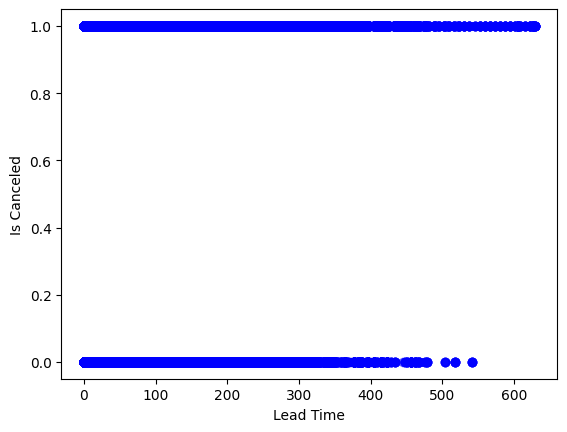

In [ ]:
plt.scatter(ds_hoteles_train_limpio['lead_time'], ds_hoteles_train_limpio['is_canceled'], color='blue', alpha=0.5)
plt.xlabel('Lead Time')
plt.ylabel('Is Canceled')
plt.show()

Veamos en otro grafico

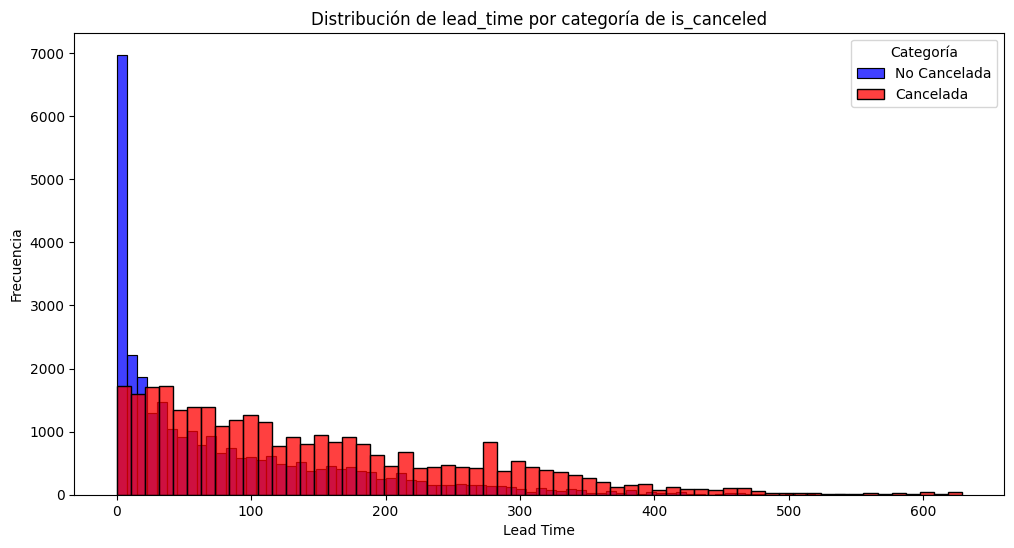

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_canceled'] == 0]['lead_time'], label='No Cancelada',  color='blue')
sns.histplot(ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_canceled'] == 1]['lead_time'], label='Cancelada',  color='red')


plt.title('Distribución de lead_time por categoría de is_canceled')
plt.xlabel('Lead Time')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría')


plt.show()

Metodo de regresion logistica:


In [ ]:
ds_hoteles_train_limpio.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

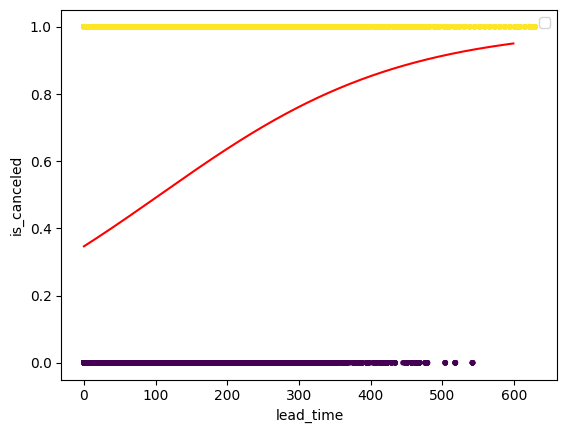

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = ds_hoteles_train_limpio[['lead_time']]
y_train = ds_hoteles_train_limpio['is_canceled']

X_test = ds_hoteles_test[['lead_time']]


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


beta_0 = model.intercept_
beta_1 = model.coef_[0, 0]


x = np.arange(0, 600, 1)
sigmoid = 1 / (1 + np.exp(-(beta_1 * x + beta_0)))

plt.plot(x, sigmoid,  color='red')


plt.scatter(X_train, y_train, c=y_train, cmap='viridis', marker='.')
plt.xlabel("lead_time")
plt.ylabel("is_canceled")
plt.legend()
plt.show()


##Correlacion entre variables assigned room type y reserved room type


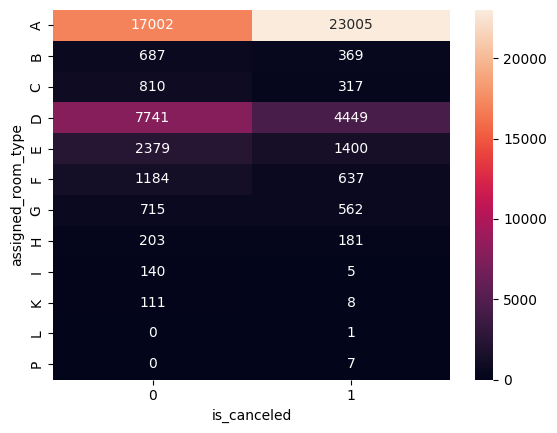

In [ ]:
tabla=pd.crosstab(ds_hoteles_train['assigned_room_type'], ds_hoteles_train['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

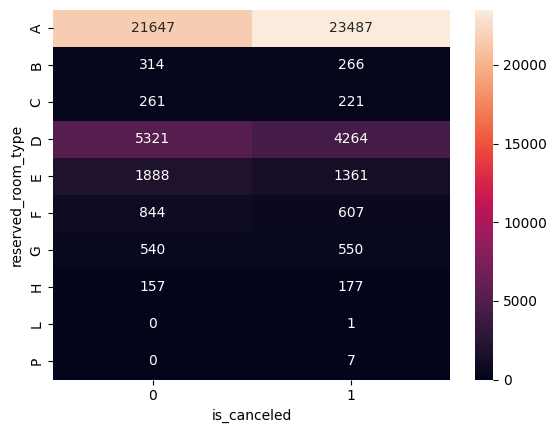

In [ ]:
tabla=pd.crosstab(ds_hoteles_train['reserved_room_type'], ds_hoteles_train['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

In [ ]:
reservas_con_misma_habitacion_asignada_y_reservada = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['assigned_room_type'] == ds_hoteles_train_limpio['reserved_room_type']]

reservas_con_misma_habitacion_asignada_y_reservada.shape

(54835, 31)

Observamos que la gran mayoria de reservas(casi 55000), tuvieron el mismo tipo de habitacion asignada y reservada. Ahora, vamos a observar en un heatmap cual es la relacion entre estas reservas y la variable target

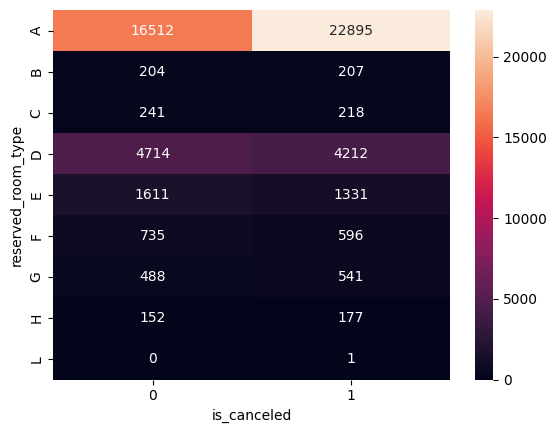

In [ ]:
tabla=pd.crosstab(reservas_con_misma_habitacion_asignada_y_reservada['reserved_room_type'], reservas_con_misma_habitacion_asignada_y_reservada['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Observamos que las habitaciones del tipo A poseen la mayor cantidad de reservas, y vemos que tambien, al tener una habitacion de este tipo, se tienden a cancelar mas las reservas.

Este grafico no nos da tanta informacion al respecto, porque, para cada tipo de habitacion, observamos que no hay tanta diferencia entre la cantidad de reservas canceladas y no canceladas, nos va a interesar mucho mas cuando las variables assigned y reserved room type difieran.

Veamos ahora el caso en el cual las reservas tienen distintos tipos de habitaciones reservados y asignados

In [ ]:
reservas_con_distinta_habitacion_asignada_y_reservada = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['assigned_room_type'] != ds_hoteles_train_limpio['reserved_room_type']]

reservas_con_distinta_habitacion_asignada_y_reservada.shape

(6061, 31)

Observamos que hubieron mas de 6000 reservas que tuvieron distintos valores en estas variables. Comparemos en un heatmap los distintos tipos de habitacion asignadas con la variable target(esto nos ayudara a encontrar la correlacion que planteamos al principio).

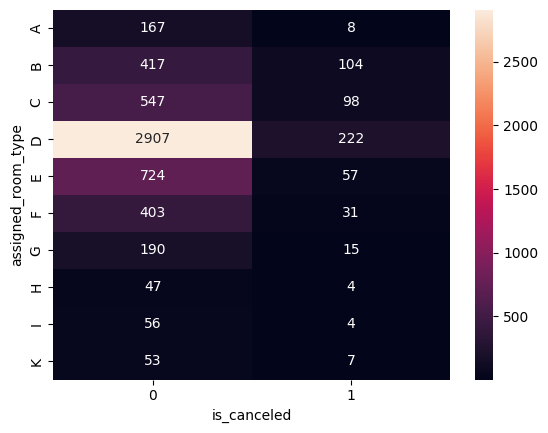

In [ ]:
tabla=pd.crosstab(reservas_con_distinta_habitacion_asignada_y_reservada['assigned_room_type'], reservas_con_distinta_habitacion_asignada_y_reservada['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Vemos que, a pesar de haber tenido cambios en el tipo de habitacion reservado y asignado, las reservas tienden a NO cancelarse. Esto es muy importante de conocer, porque a la hora de armar nuestros modelos predictivos, esta correlacion sera tomada en cuenta.

##Correlacion entre reservas de grupos familiares y variables de 'agregados'

Observamos que, la gran mayoria de reservas se hicieron con dos adultos en ellas, y ademas un porcentaje importante(alrededor de un 15% de las reservas totales), tienen niños y/o bebés. Lo que vamos a ver es que si, en estas reservas en las que encontramos grupos familiares, hay una correlación con las variables que, podemos decirles, "agregados"(por ejemplo la variable meal o required_card_parking_spaces)


**Aclaración**: Para mejorar la comprension del lector y facilitar nuestro analisis, consideramos una reserva con grupo familiar a aquellas reservas que tengan como minimo 1 niño y/o bebé en la misma.

In [ ]:
reservas_con_grupos_familiares = ds_hoteles_train_limpio.loc[(ds_hoteles_train_limpio['children'] >= 1) | (ds_hoteles_train_limpio['babies'] >= 1)]

reservas_con_grupos_familiares.shape

(4621, 31)

Observamos que hay un poco mas de 4600 reservas con grupo familiar.




Tambien antes de comenzar con el analisis,vamos a añadir una nueva variable que se encarga de contabilizar la cantidad de integrantes de la reserva

In [ ]:
ds_hoteles_train_limpio_copy = ds_hoteles_train_limpio.copy()
ds_hoteles_train_limpio_copy['total_huespedes'] = ds_hoteles_train_limpio['adults'] + ds_hoteles_train_limpio['children'] + ds_hoteles_train_limpio['babies']

###Correlacion con 'meal'

Observamos durante nuestro analisis que, la variable meal puede tomar como valor a 'Undefined', es decir, que hay reservas que no tuvieron 'pension'. Veamos si estas reservas que tuvieron o no meal afectaron a las cancelaciones de reservas con grupos familiares.

In [ ]:
grupo_familiar_sin_pension = reservas_con_grupos_familiares.loc[reservas_con_grupos_familiares['meal'] == 'Undefined']

grupo_familiar_sin_pension.shape

(25, 31)

Observamos que solamente hubieron 25 reservas sin pension(meal = 'Undefined'). Veamos su correlacion con la variable target en un grafico de barras

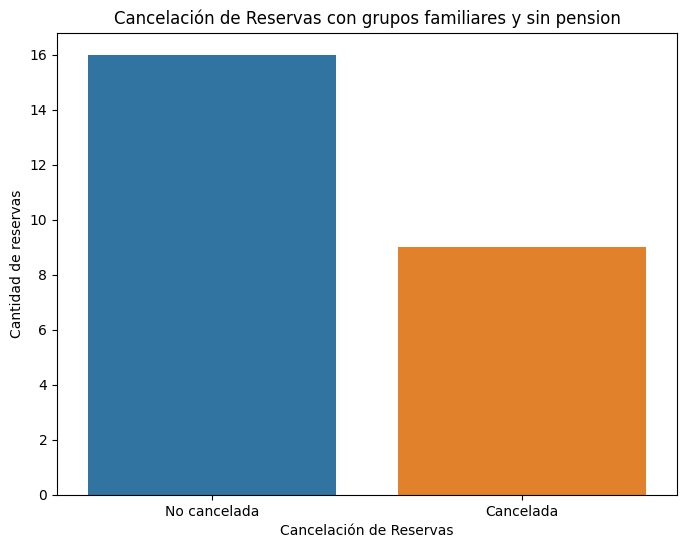

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=grupo_familiar_sin_pension, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas con grupos familiares y sin pension')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Vemos que, por una diferencia de casi el doble, las reservas de este tipo no fueron canceladas. Entonces, podemos tomar como conclusion que, para grupos familiares, el no tener pension no afecta en gran medida a la cancelacion.

Veamos ahora los casos en los que SI tenemos pension.

In [ ]:
grupo_familiar_con_pension = reservas_con_grupos_familiares.loc[reservas_con_grupos_familiares['meal'] != 'Undefined']

grupo_familiar_con_pension.shape

(4596, 31)

Vemos que hay casi 4600 reservas con grupo familiar y con pension. Veamos si, dependiendo del valor que tenga la variable meal encontramos una relacion con la variable target en un heatmap

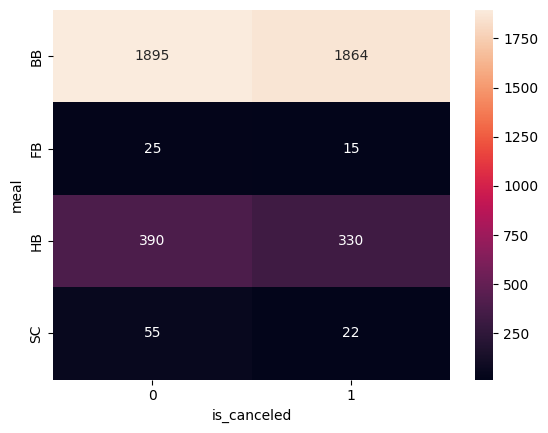

In [ ]:
tabla=pd.crosstab(grupo_familiar_con_pension['meal'], grupo_familiar_con_pension['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

###Correlacion con 'required_card_parking_spaces'

Suponiendo que disponemos de reservas con grupos familiares, tendriamos que pensar en aquellas familias que utilizan un auto para trasladarse, por lo que veremos si las reservas con grupos familiares tienden a necesitar estacionamientos para sus autos.

Veamos su correlacion con la variable target en un heatmap

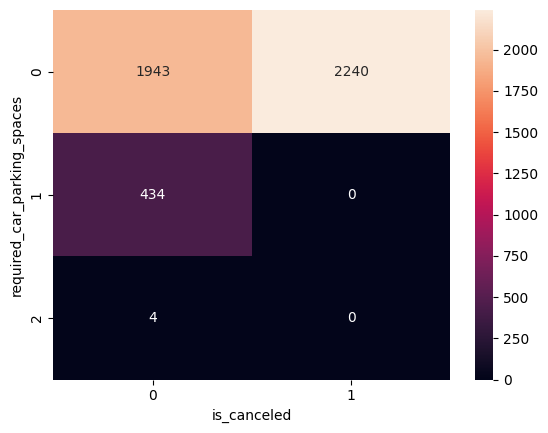

In [ ]:
tabla=pd.crosstab(reservas_con_grupos_familiares['required_car_parking_spaces'], reservas_con_grupos_familiares['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Observamos que, cuando se necesitaron 1 o 2 espacios de estacionamiento los grupos familiares nunca cancelaron sus reservas, pero cuando NO se necesito de ningun espacio, se tendio mas a cancelar la reserva.

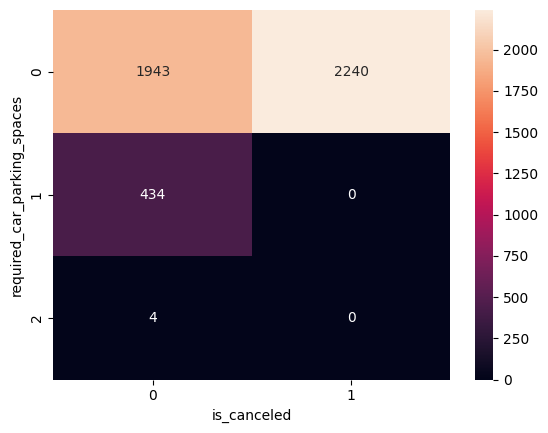

In [ ]:
tabla=pd.crosstab(reservas_con_grupos_familiares['required_car_parking_spaces'], reservas_con_grupos_familiares['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

###Correlacion con days_in_waiting_list

Quiero analizar cómo la duración de la lista de espera se relaciona con el tamaño del grupo que realiza la reserva. Esto podría revelar si las reservas de grupos más grandes tienden a tener listas de espera más largas o más cortas.

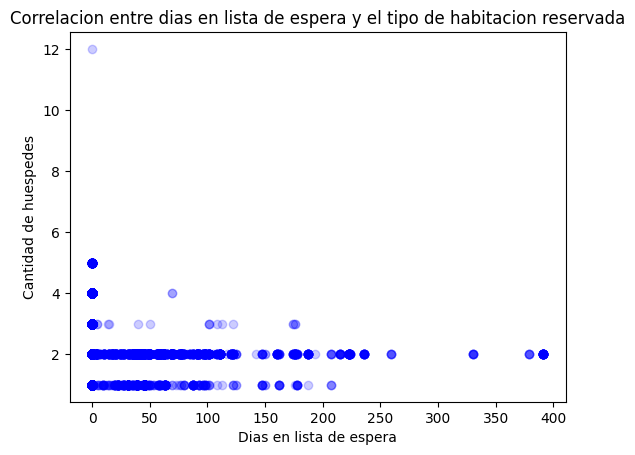

In [ ]:
plt.scatter(ds_hoteles_train_limpio_copy['days_in_waiting_list'], ds_hoteles_train_limpio_copy['total_huespedes'], color='blue', alpha=0.2)
plt.xlabel('Dias en lista de espera')
plt.ylabel('Cantidad de huespedes')
plt.title('Correlacion entre dias en lista de espera y el tipo de habitacion reservada')
plt.show()

Podemos notar que las reservas con mayor cantidad de clientes,no estuvieron o estuvieron poco tiempo en la lista de espera,mientras que a medida que disminuyen la cantidad de huespedes,la cantidad de dias en la lista de espera se convierte mas grande,sobre todo con 2 huespedes,donde la lista de espera se ha extendido a casi 400 dias


##Correlacion entre adults y required_card_parking_spaces

En este apartado queremos ver como se correlacionan estas dos variables: para nuestro analisis, consideramos que es normal que hayan reservas en las cuales se requiera de espacios de estacionamiento; antes nos enfocamos en ver como se relacionaba la cantidad de espacios de estacionamiento con los grupos familiares, pero ahora vamos a ver la correlacion de la primera con la variable adults, para ver en promedio cuantos espacios de estacionamiento necesitan las reservas.

Veamos esta relacion en un heatmap

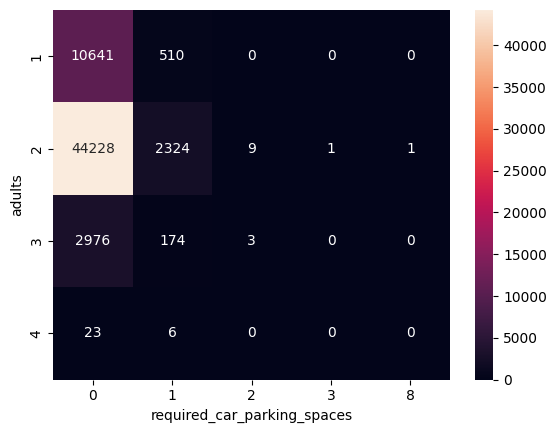

In [ ]:
tabla=pd.crosstab(ds_hoteles_train_limpio['adults'], ds_hoteles_train_limpio['required_car_parking_spaces'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Observamos que la gran mayoria de reservas NO requirieron de espacios de estacionamiento.

Nos interesaria agrupar aquellas reservas que SI requirieron de espacios de estacionamiento y ver como se correlacionan con la variable target, para ver si la cantidad de espacios de estacionamientos afectan a la cantidad de cancelaciones.

In [ ]:
reservas_con_estacionamiento = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['required_car_parking_spaces'] >= 1]

reservas_con_estacionamiento.shape

(3028, 31)

Observamos que hubieron solo 3028 reservas con adultos y espacios de estacionamiento requeridos. Veamos su correlacion con la variable target en un heatmap.

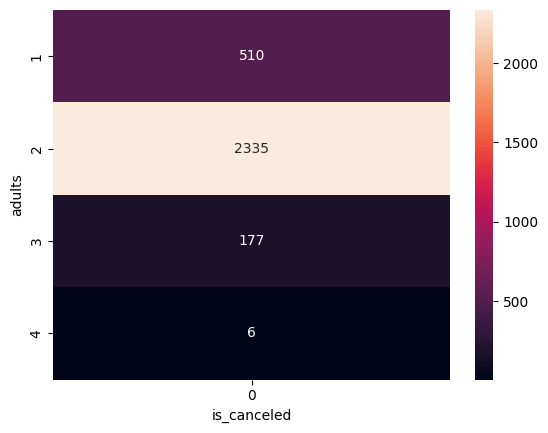

In [ ]:
tabla=pd.crosstab(reservas_con_estacionamiento['adults'], ds_hoteles_train_limpio['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Vemos que, de todas estas reservas que SI necesitaron de estacionamiento, NINGUNA fue cancelada. Esto es un dato muy importante para tener en cuenta, ya que, el tener esta variable con un valor distinto a 0, las reservas tienden a NO cancelarse.



---


##Correlacion entre ADR y Assigned Room Type

Vimos en nuestro analisis que, tenemos diferentes tipos de habitaciones asignadas a las reservas, las cuales se diferencian dependiendo del valor que tome caracter(por ejemplo, tenemos las habitaciones del tipo 'A'). Entonces, suponemos que las habitaciones deben diferenciarse en precio, por lo que procederemos a comparar la variable ADR(que nos da una idea del precio que tienen estas habitaciones), y el tipo de habitacion asignado a la reserva.

Como vimos en el analisis, la variable ADR toma muchos valores posibles, por lo que, para visualizar la correlacion, usaremos un scatter plot para verla

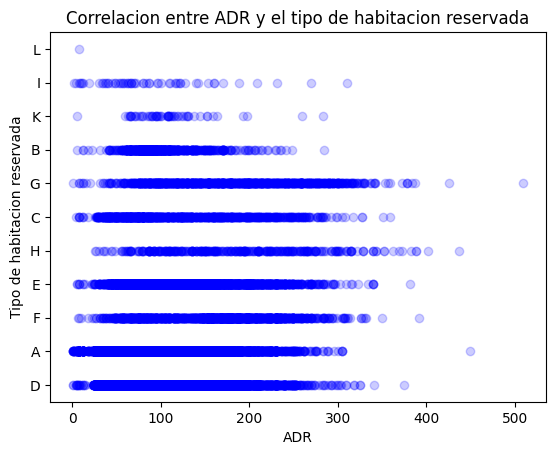

In [ ]:
plt.scatter(ds_hoteles_train_limpio['adr'], ds_hoteles_train_limpio['assigned_room_type'], color='blue', alpha=0.2)
plt.xlabel('ADR')
plt.ylabel('Tipo de habitacion reservada')
plt.title('Correlacion entre ADR y el tipo de habitacion reservada')
plt.show()

Vemos que, el precio de las habitaciones del tipo 'D', 'A', 'F', 'E', 'C' y 'G' toman valores de ADR entre 20 a 250 aproximadamente, mientras que los demas tipos de habitaciones toman valores mas pequeños en proporcion a los ya mencionados(esto lo vemos porque los puntos del scatter son mas opacos, esto quiere decir que se concentran mas reservas en estos valores, y cuando no tenemos tanta opacidad es porque no tenemos tantos registros superpuestos). Tambien, se observa los valores atipicos que toma la variable ADR, por ejemplo, la habitacion de tipo G que toma un ADR mayor a 500.

Como conclusión, como era de esperarse, el precio de las habitaciones cambia dependiendo de su tipo: vemos que las habitaciones con más cantidad de reservas toman un precio entre 20 a 200 de ADR, mientras que las demás suelen mantenerse en el mismo rango, pero con menor cantidad de reservas. Podemos tomar como conclusión final que las reservas tienden a tener una habitacion asignada del tipo A, D, E, F y G, y que todos los tipos de habitaciones se suelen mantener en el mismo ADR.



---

##Correlación entre ADR y country

Aquí lo que buscaremos es ver cómo afecta al ADR el país al que está asignada la reserva. Para esto, veremos del top 10 de países más concurridos en el dataset y el ADR promedio de estas reservas. Para ver la correlación, usaremos un scatter plot.

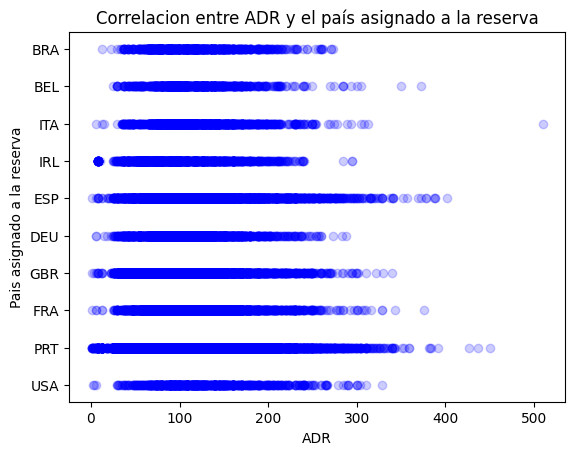

In [ ]:
reservas_en_mejores_paises = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['country'].isin(top_10_countries.index)]

plt.scatter(reservas_en_mejores_paises['adr'], reservas_en_mejores_paises['country'], color='blue', alpha=0.2)
plt.xlabel('ADR')
plt.ylabel('Pais asignado a la reserva')
plt.title('Correlacion entre ADR y el país asignado a la reserva')
plt.show()

Observamos que, los paises suelen mantenerse en un rango de 20 a 300 de ADR aproximadamente, y que paises como por ejemplo Brasil o Belgica, al tener menor cantidad de reservas que por ejemplo Portugal, tienen un rango mas limitado: de 20 a 220 aproximadamente. Tambien, vemos que aquella reserva con un ADR mayor a 500 no se dio en un pais dentro del top 5 con mas reservas, sino que se dio en Italia. Tomamos como conclusion por ejemplo que, al ser Portugal el pais con mas cantidad de reservas, tiene un gran rango de valores que toma ADR, hay reservas con un ADR bastante bajo(menor que 20), mientras que hay reservas que superan los 400 de ADR.



---


##Correlacion entre el mes de llegada y Country

Lo que vamos a ver es que, si el mes de llegada se correlaciona al pais que esta asignada la reserva. Con esta correlacion veremos en que meses hay mayor densidad de reservas, y en que meses tenemos menor cantidad de reservas en estos paises.

Usemos un heatmap para observar la correlacion

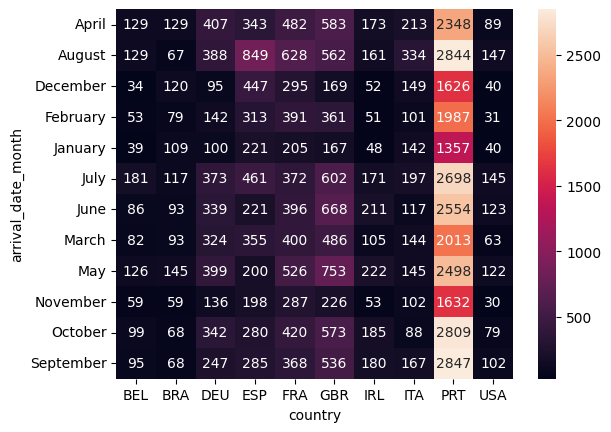

In [ ]:
tabla=pd.crosstab(reservas_en_mejores_paises['arrival_date_month'], reservas_en_mejores_paises['country'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Observamos que Portugal, al ser el pais con mayor cantidad de reservas, mantiene un gran numero de reservas durante todos los meses del año, pero vemos que los meses de enero y diciembre son los que tienen menos cantidad de reservas en este pais. Para los demás países, vemos que durante el año las reservas se reparten de una manera equitativa, pero podemos ver que los meses en los que más reservas de países europeos son junio, julio y agosto: esto tiene todo el sentido del mundo, ya que en estos meses en ese continente es verano. Luego, podemos ver que en Brasil(un país sudamericano), tiene reservas durante todo el año de una manera equitativa, con bajadas en los meses de agosto, octubre, noviembre y septiembre: también tiene sentido porque en esa época estamos en primavera, por lo que intuimos que no hay tantas reservas en esa época del año.

Como conclusión final, decimos que los países de Europa tienden a tener más reservas en sus meses de verano, y que durante el resto del año tienen las reservas distribuidas de una manera equitativa. Luego, el único país sudamericano de la lista(Brasil), tiene menos reservas durante todo el año.



---

##Correlación entre Lead time y Country

Al tener los 10 países con mayor cantidad de reservas, es normal que estos países tengan una gran demanda de gente que quiere hacer reservas, por lo que veremos ahora con cuánto tiempo de anticipación se suelen dar las reservas en estos países.

Veamos la correlación con un scatter plot

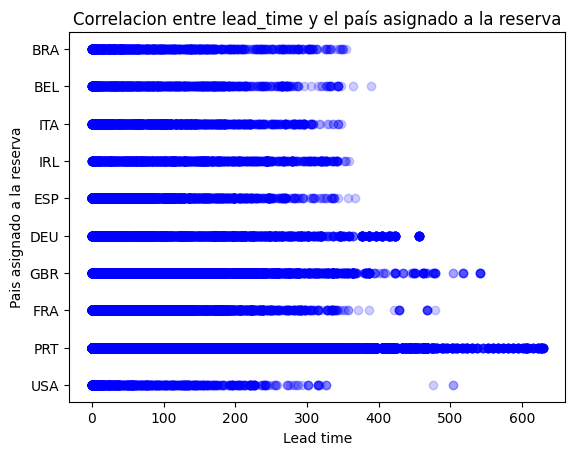

In [ ]:
plt.scatter(reservas_en_mejores_paises['lead_time'], reservas_en_mejores_paises['country'], color='blue', alpha=0.2)
plt.xlabel('Lead time')
plt.ylabel('Pais asignado a la reserva')
plt.title('Correlacion entre lead_time y el país asignado a la reserva')
plt.show()

Observamos que, tenemos una gran cantidad de reservas en estos países que no tienen tanto tiempo de anticipación, pero también vemos que hay reservas con anticipaciones de más de 365 días, para dimensionar mejor: Portugal tiene reservas que tienen casi un año y medio de anticipación.



---

## Correlacion entre Market Segment y Channel Distribution

Queremos observar la relacion entre la cantidad de reservas que se hicieron entre los segmentos del mercado que realizaron las reservas y los canales de distribucion y apartir de ahi cuales fueron cancelados y cuales no

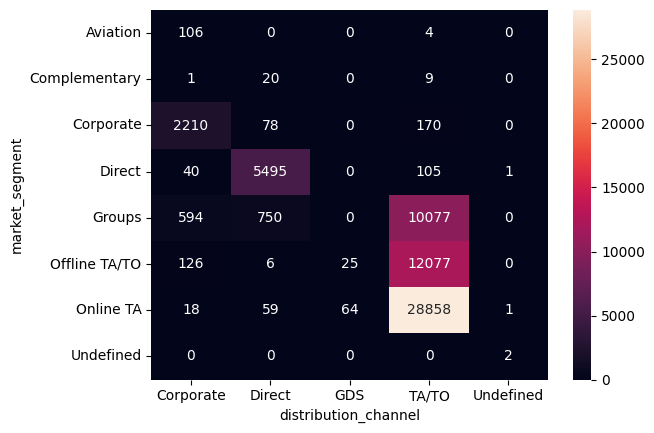

In [ ]:
tabla=pd.crosstab(ds_hoteles_train_limpio['market_segment'], ds_hoteles_train_limpio['distribution_channel'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Recordamos previamente la distribucion de la mayoria de los datos segun la columna de channel distribution es la siguiente:
* TA/TO:         51849
* Direct:        6799
* Corporate:     3172

Mientras que los valroes predominantes de los market segments son:

* Online TA	29000
* Offline TA/TO	12234
* Groups	11421
* Direct	5641

Algo que cabe destacar proveniente del analisis del market segment, es que casi el 50% de las reservas del market segment de Online TA y offline TA/TO, son canceladas; la mayoria de las reservas hechas por Groups son canceladas y la mayoria reservas hechas por Direct no son canceladas.

Algo que nos permite observar este grafico es que para los valores que se comparten en ambas columnas, como Direct y Corporate, las mayorias de las reservas se hacen por las mismas, las reservas del sector Corporate fueron distribuidas por Corporate.

Otra cosa que nos permite observar es la distribucion de los canales de distribucion para el caso de los TA/TO, donde se concentra la mayoria d elos datos y coinciden con los segmentos del mercado que poseen una gran cantidad de reservas canceladas


##Correlacion entre Days in waiting list y Reserved room type

Queremos observar el tip de relacion que tienen las habitaciones contradas con la lista de espera,para veridentificar si ciertos tipos de habitaciones tienden a tener listas de espera más largas o más cortas.

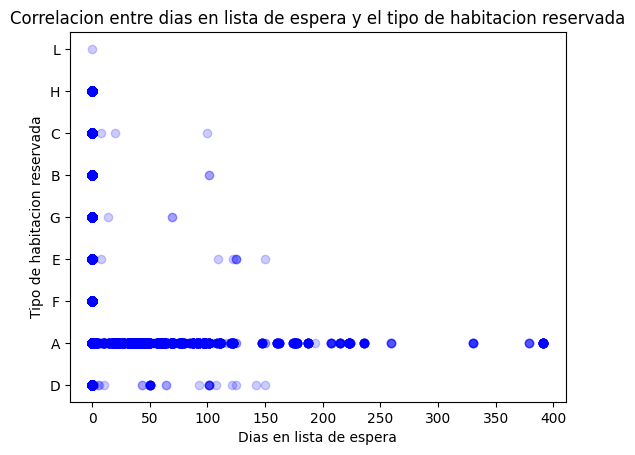

In [ ]:
plt.scatter(ds_hoteles_train_limpio['days_in_waiting_list'], ds_hoteles_train_limpio['reserved_room_type'], color='blue', alpha=0.2)
plt.xlabel('Dias en lista de espera')
plt.ylabel('Tipo de habitacion reservada')
plt.title('Correlacion entre dias en lista de espera y el tipo de habitacion reservada')
plt.show()

Veamos que,las habitaciones de tipo L, H y F tienen la listas de esperas mas cortas de las habitaciones,lo que significa que ,al contratar la habitacion ,la reserva se hace efectiva casi al instante.
Por otro lado,las habitaciones de tipo C,G,D,A y B tienen casos donde la reserva supera los 50 dias,pero son muy pocos sus casos.
Por ultimo ,el tipo de A es aquella que tiene muchos casos,pero los mas importantes es que existen muchas reservas que superan los 150 dias de estadia en la lista de espera

## Correlacion entre DaysInWaitingList y Booking Changes

Vamos a investigar si la cantidad de cambios en las reservas está relacionada con la duración de la lista de espera. Es posible que los cambios sean más frecuentes en las reservas que han estado en lista de espera durante cierto período de tiempo.Por lo cual,veamos en un grafico

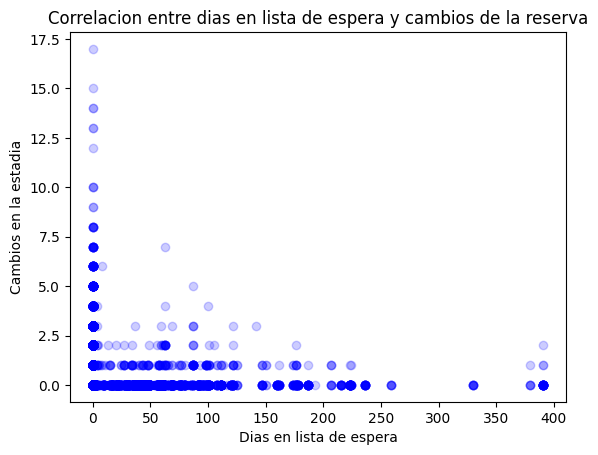

In [ ]:
plt.scatter(ds_hoteles_train_limpio['days_in_waiting_list'], ds_hoteles_train_limpio['booking_changes'], color='blue', alpha=0.2)
plt.xlabel('Dias en lista de espera')
plt.ylabel('Cambios en la estadia')
plt.title('Correlacion entre dias en lista de espera y cambios de la reserva')
plt.show()

Sorprendentemente,podemos notar que las reservas con mayor cambios en la reserva,tuvieron muy pocos dias en la lista de espera,mientras que estuvieron mucho mas tiempo en la lista de espera,no realizaron mas de 3 cambios como maximo por reserva.
Este analisis es muy importante porque el resulado dado es el que no se esperaba de manera intuitiva

---

## Correlacion entre ADR y Requiered Parking Space

Vamos a ver si existe una relacion entre ADR y la cantidad de espacios de parking requeridos.Podemos declinarlos a que a mayor cantidad de lugar nesecarios para el parking,el valor del ADR deberia de ser mayor,pero veamos como se comporta en este conjunto de datos

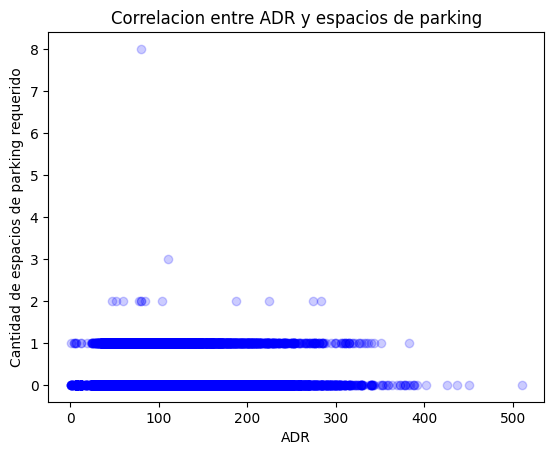

In [ ]:
plt.scatter(ds_hoteles_train_limpio['adr'],ds_hoteles_train_limpio['required_car_parking_spaces'], color='blue', alpha=0.2)
plt.xlabel('ADR')
plt.ylabel('Cantidad de espacios de parking requerido')
plt.title('Correlacion entre ADR y espacios de parking')
plt.show()

Podemos notar que aquellas reservas que no nesecitan lugar para estacionar autos,tienen una reserva (la reserva con mayor ADR) que esta muy alejada de las mas usuales,lo que va en contra lo que habiamos esperado,que a mas lugares de parking,mayor ADR.
Por otro lado los casos 3 y 8,el ADR no pareciera estar afectado por ello,ya que sus valores se encuentran en valores promedios de ADR.
Podemos concluir que los lugares de parking ,no condicionan el valor de ADR.


---

## Correlacion entre ADR y Cantidad de huespedes

Desarrollaremos a continuacion la correlacion de ADR con la cantidad de huespedes de una reserva,para notar si el ADR varia de forma tal que si existe una relacion de valor de ADR ,a cantidad de personas de la reserva

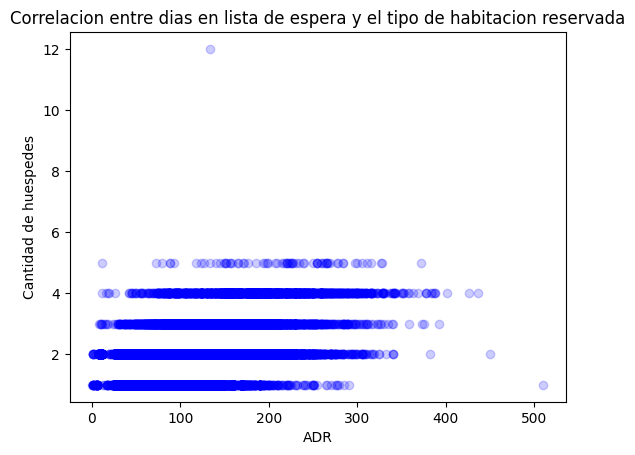

In [ ]:
plt.scatter(ds_hoteles_train_limpio_copy['adr'], ds_hoteles_train_limpio_copy['total_huespedes'], color='blue', alpha=0.2)
plt.xlabel('ADR')
plt.ylabel('Cantidad de huespedes')
plt.title('Correlacion entre dias en lista de espera y el tipo de habitacion reservada')
plt.show()

Podemos notar que en los casos de 1 y 2 personas,tenemos casos esperados donde el ADR es proporcional a lo que podria ser gastado por 1 o 2 huespedes,pero notamos que el valor de ADR esta relacionado con una reserva de una persona,lo cual nos resulta atipico,dado que esperamos que estaria relacionado a mayor cantidad de personas.
A su vez,notamos que a medida que incrementan la cantidad de huespedes,se distribuye las reservas de forma tal que se extienden a mayor valor de ADR.
Por ultimo,el caso de mayor cantidad de huespedes,tiene un valor de ADR que no es el esperado ,ya que esperabamos que sea un valor mas grande

---

## Correlacion entre ADR y Tipo de hotel

Notemos la relacion entre ADR y Tipo de hotel,donde queremos ver si el valor de ADR depende del tipo de hotel al que se reserva,ya que puede ser un tipo de hotel mas caro.

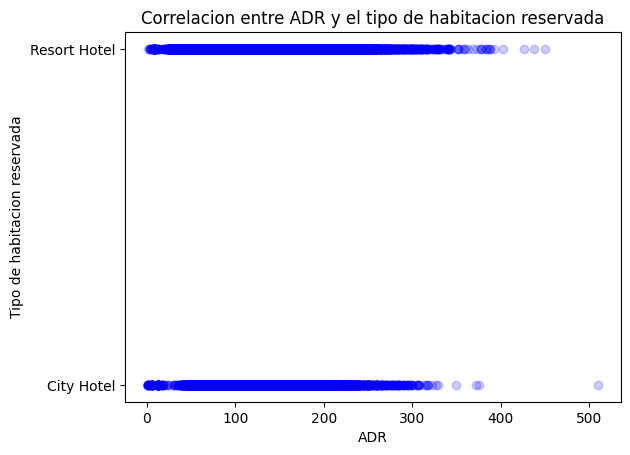

In [ ]:
plt.scatter(ds_hoteles_train_limpio['adr'], ds_hoteles_train_limpio['hotel'], color='blue', alpha=0.2)
plt.xlabel('ADR')
plt.ylabel('Tipo de habitacion reservada')
plt.title('Correlacion entre ADR y el tipo de habitacion reservada')
plt.show()

Podemos notar que no existe una relacion directa entre el valor de ADR y el tipo de hotel,pero podemos concluir muchas cosas del grafico.
Notamos que City Hotel tiende a tener valor de ADR hasta 300,donde hallan su mayor cantidad de reserva aglomerada entre los valores 1 y 300,pero a su vez tiene la reserva con mayor ADR ;pero luego del valor 300,la reservas son muy pocas

Con respecto a Resort Hotel,podemos notar que se distribuyen de similar manera que las reservas de City Hotel,pero notamos que se cuenta con mayor cantidad de reservas con ADR mayor a 300 que las reservas correspondientes a Citi

In [ ]:
ds_hoteles_train_limpio.to_csv('hoteles_train_final.csv')